<a id='top'></a>

# Metrica Sports Tracking and Event Data
##### Notebook to explore two sample matches of Event and Tracking data from [Metrica Sports](https://metrica-sports.com/).

### By [Edd Webster](https://www.twitter.com/eddwebster)
Notebook first written: 08/03/2021<br>
Notebook last updated: 11/04/2021

![title](../../../../../img/metrica_sports_shots_screenshot.png)

---

## <a id='import_libraries'>Introduction</a>
This notebook is a short Exploratory Data Analysis (EDA) of [Metrica Sports](https://metrica-sports.com/) Spatiotemporal Tracking and corresponding Event data with [Python](https://www.python.org/) using [pandas](http://pandas.pydata.org/) DataFrames and [matplotlib](https://matplotlib.org/contents.html?v=20200411155018) visualisations.

For more information about this notebook and the author, I am available through all the following channels:
*    [eddwebster.com](https://www.eddwebster.com/);
*    edd.j.webster@gmail.com;
*    [@eddwebster](https://www.twitter.com/eddwebster);
*    [linkedin.com/in/eddwebster](https://www.linkedin.com/in/eddwebster/);
*    [github/eddwebster](https://github.com/eddwebster/); and
*    [public.tableau.com/profile/edd.webster](https://public.tableau.com/profile/edd.webster).

![title](../../../../../img/edd_webster/fifa21eddwebsterbanner.png)

The accompanying GitHub repository for this notebook can be found [here](https://github.com/eddwebster/mcfc_submission/) and a static version of this notebook can be found [here](https://nbviewer.jupyter.org/github/eddwebster/mcfc_submission/blob/main/notebooks/metrica-sports/Metrica%20Sports.ipynb).

___

## <a id='notebook_contents'>Notebook Contents</a>
1.    [Notebook Dependencies](#section1)<br>
2.    [Project Brief](#section2)<br>
3.    [Data Source](#section3)<br>      
4.    [Data Engineering](#section4)<br>
5.    [Subset DataFrames](#section5)<br>
6.    [Exploratory Data Analysis (EDA)](#section6)<br>
7.    [Engineer Shot Specific DataFrame](#sectio7)<br>
8.    [Summary](#section8)<br>
9.    [Next Steps](#section9)<br>
10.    [References](#section10)<br>

---

## <a id='#section1'>1. Notebook Dependencies</a>
This notebook was written using [Python 3](https://docs.python.org/3.7/) and requires the following libraries:
*    [`Jupyter notebooks`](https://jupyter.org/) for this notebook environment with which this project is presented;
*    [`NumPy`](http://www.numpy.org/) for multidimensional array computing;
*    [`pandas`](http://pandas.pydata.org/) for data analysis and manipulation;
*    [`Beautifulsoup`](https://pypi.org/project/beautifulsoup4/) for web scraping; and
*    [`matplotlib`](https://matplotlib.org/contents.html?v=20200411155018) for data visualisations;

All packages used for this notebook except for BeautifulSoup can be obtained by downloading and installing the [Conda](https://anaconda.org/anaconda/conda) distribution, available on all platforms (Windows, Linux and Mac OSX). Step-by-step guides on how to install Anaconda can be found for Windows [here](https://medium.com/@GalarnykMichael/install-python-on-windows-anaconda-c63c7c3d1444) and Mac [here](https://medium.com/@GalarnykMichael/install-python-on-mac-anaconda-ccd9f2014072), as well as in the Anaconda documentation itself [here](https://docs.anaconda.com/anaconda/install/).

### Import Libraries and Modules

In [2]:
# Python ≥3.5 (ideally)
import platform
import sys, getopt
assert sys.version_info >= (3, 5)
import csv

# Import Dependencies
%matplotlib inline

# Math Operations
import numpy as np
import math
from math import pi

# Datetime
import datetime
from datetime import date
import time

# Data Preprocessing
import pandas as pd
import os
import re
import random
from io import BytesIO
from pathlib import Path

# Reading directories
import glob
import os
from os.path import basename

# Working with JSON
import json
from pandas.io.json import json_normalize

# Data Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import patches
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import missingno as msno

# Progress Bar
from tqdm import tqdm

# Football libraries
from FCPython import createPitch

# Display in Jupyter
from IPython.display import Image, Video, YouTubeVideo
from IPython.core.display import HTML

# Ignore Warnings
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

print('Setup Complete')

Setup Complete


In [3]:
# Python / module versions used here for reference
print('Python: {}'.format(platform.python_version()))
print('NumPy: {}'.format(np.__version__))
print('pandas: {}'.format(pd.__version__))
print('matplotlib: {}'.format(mpl.__version__))
print('Seaborn: {}'.format(sns.__version__))

Python: 3.7.6
NumPy: 1.18.0
pandas: 1.2.0
matplotlib: 3.3.2
Seaborn: 0.11.1


### Defined Variables

In [4]:
# Define today's date
today = datetime.datetime.now().strftime('%d/%m/%Y').replace('/', '')

### Defined Filepaths

In [5]:
# Set up initial paths to subfolders
base_dir = os.path.join('..', '..', '..', '..', '..')
data_dir = os.path.join(base_dir, 'data')
data_dir_metrica = os.path.join(base_dir, 'data', 'metrica-sports')
scripts_dir = os.path.join(base_dir, 'scripts')
scripts_dir_metrica = os.path.join(base_dir, 'scripts', 'metrica-sports')
img_dir = os.path.join(base_dir, 'img')
fig_dir = os.path.join(base_dir, 'img', 'fig')
fig_dir_metrica = os.path.join(base_dir, 'img', 'fig', 'metrica-sports')
video_dir = os.path.join(base_dir, 'video')
video_dir_metrica = os.path.join(base_dir, 'video', 'fig', 'metrica-sports')

### Custom Libraries for Tracking Data
Laurie Shaw's custom libraries for working with Metrica Sports data [[link](https://github.com/Friends-of-Tracking-Data-FoTD/LaurieOnTracking)].

In [88]:
# Custom libraries for working with Metrica data based by Laurie Shaw

## Define path of scripts
sys.path.insert(0, os.path.abspath(scripts_dir))

# Laurie Shaw's custom libraries for working with Metrica Sports data. See: https://github.com/Friends-of-Tracking-Data-FoTD/LaurieOnTracking
import Metrica_IO as mio
import Metrica_Viz as mviz
import Metrica_Velocities as mvel
import Metrica_PitchControl as mpc
import Metrica_EPV as mepv

### Notebook Settings

In [89]:
pd.set_option('display.max_columns', None)

---

## <a id='#section2'>2. Project Brief</a>
This Jupyter notebook engineered scraped football data from [Metrica Sports](https://metrica-sports.com/) using [pandas](http://pandas.pydata.org/) for data manipulation through DataFrames.

The data of player values produced in this notebook is exported to CSV. This data is then read into the Chance Quality model notebook, to predict the quality of the chances using a trained Logistic Regression xG model.

---

## <a id='#section3'>3. Data Sources</a>

### <a id='#section3.1'>3.1. Introduction</a>
The Tracking data analysis is from game 2 of the sample data by [Metrica Sports](https://metrica-sports.com/).

![title](../../../../../img/logos/metrica-sports.png)

The Event data comprises of the on-ball actions that were performed during the match. For each event, the following information is known:
1.    the match time at which the event occurred
2.    the onball player
3.    the type of event (e.g. pass, shot, goal, etc.).

The Tracking data represents the location of every player on the pitch with a temporal frequency of 25 Hz and the corresponding match time for each tracking frame is specified.

Before conducting our EDA, the data needs to be imported as a DataFrame in the Data Sources section [Section 3](#section3) and cleaned in the Data Engineering section [Section 4](#section4).


We'll be using the [pandas](http://pandas.pydata.org/) library to import our data to this workbook as a DataFrame.

### <a id='#section3.2'>3.2. Import Data</a>

#### <a id='#section3.2.1'>3.2.1. Event Data</a>

##### <a id='#section3.2.1.1'>3.2.1.1. Data Dictionaries</a>
The [Metrica Sports](https://metrica-sports.com/) Events dataset has fourteen features (columns) with the following definitions and data types:

| Feature     | Data type    |
|------|-----|
| `Team`    | object     |
| `Type`    | object     |
| `Subtype`    | object     |
| `Period`    | int64     |
| `Start Frame `    | int64     |
| `Start Time [s]`    | float64     |
| `End Frame`    | int64     |
| `End Time [s]`    | float64     |
| `From`    | object     |
| `To`    | object     |
| `Start X`    | float64     |
| `Start Y`    | float64     |
| `End X`    | float64     |
| `End Y`    | float64     |

For a full list of definitions, see the Metrica Sports documentation [[link](https://github.com/metrica-sports/sample-data/blob/master/documentation/events-definitions.pdf).

##### <a id='#section3.2.1.2'>3.2.1.2. Import CSV as a pandas DataFrame</a>

In [90]:
# Define match to import (2 matches available)
game_id = 2     # sample match 2

# Read in the Event data - uses a function from the Metrica_IO library
df_events_raw = mio.read_event_data(data_dir_metrica, game_id)    # reads in data into the DataFrame and returns events

##### <a id='#section3.2.1.3'>3.2.1.3.  Preliminary Data Handling</a>
Let's quality of the dataset by looking first and last rows in pandas using the [head()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) and [tail()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html) methods.

In [91]:
# Display the first 5 rows of the raw DataFrame, df_events_raw
df_events_raw.head()

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
0,Away,SET PIECE,KICK OFF,1,51,2.04,51,2.04,Player23,NaN,NaN,NaN,NaN,NaN
1,Away,PASS,NaN,1,51,2.04,87,3.48,Player23,Player20,0.50,0.50,0.40,0.51
2,Away,PASS,NaN,1,146,5.84,186,7.44,Player20,Player18,0.43,0.50,0.44,0.22
3,Away,PASS,NaN,1,248,9.92,283,11.32,Player18,Player17,0.47,0.19,0.31,0.28
4,Away,PASS,NaN,1,316,12.64,346,13.84,Player17,Player16,0.29,0.32,0.26,0.58


In [92]:
# Display the last 5 rows of the raw DataFrame, df_events_raw
df_events_raw.tail()

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
1930,Away,BALL LOST,INTERCEPTION,2,140122,5604.88,140183,5607.32,Player21,NaN,0.54,0.77,0.29,0.24
1931,Home,CHALLENGE,AERIAL-LOST,2,140180,5607.20,140180,5607.20,Player1,NaN,0.31,0.30,NaN,NaN
1932,Away,CHALLENGE,AERIAL-LOST,2,140183,5607.32,140183,5607.32,Player24,NaN,0.32,0.30,NaN,NaN
1933,Home,RECOVERY,NaN,2,140211,5608.44,140211,5608.44,Player12,NaN,0.34,0.32,NaN,NaN
1934,Home,BALL OUT,CLEARANCE,2,140265,5610.60,140298,5611.92,Player12,NaN,0.33,0.16,0.41,-0.04


In [93]:
# Print the shape of the raw DataFrame, df_events_raw
print(df_events_raw.shape)

(1935, 14)


In [94]:
# Print the column names of the raw DataFrame, df_events_raw
print(df_events_raw.columns)

Index(['Team', 'Type', 'Subtype', 'Period', 'Start Frame', 'Start Time [s]',
       'End Frame', 'End Time [s]', 'From', 'To', 'Start X', 'Start Y',
       'End X', 'End Y'],
      dtype='object')


The dataset has fourteen features (columns). Full details of these attributes can be found in the [Data Dictionary](section3.3.1).

In [95]:
# Data types of the features of the raw DataFrame, df_events_raw
df_events_raw.dtypes

Team               object
Type               object
Subtype            object
Period              int64
Start Frame         int64
Start Time [s]    float64
End Frame           int64
End Time [s]      float64
From               object
To                 object
Start X           float64
Start Y           float64
End X             float64
End Y             float64
dtype: object

In [96]:
# See all the types and quantities of each event
df_events_raw['Type'].value_counts()

PASS              964
CHALLENGE         311
RECOVERY          248
BALL LOST         233
SET PIECE          80
BALL OUT           49
SHOT               24
FAULT RECEIVED     20
CARD                6
Name: Type, dtype: int64

Full details of the fourteen features in this dataset and their data types can be found in the [Data Dictionary](section3.2.1.1).

In [97]:
# Info for the raw DataFrame, df_events_raw
df_events_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1935 entries, 0 to 1934
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Team            1935 non-null   object 
 1   Type            1935 non-null   object 
 2   Subtype         868 non-null    object 
 3   Period          1935 non-null   int64  
 4   Start Frame     1935 non-null   int64  
 5   Start Time [s]  1935 non-null   float64
 6   End Frame       1935 non-null   int64  
 7   End Time [s]    1935 non-null   float64
 8   From            1935 non-null   object 
 9   To              964 non-null    object 
 10  Start X         1849 non-null   float64
 11  Start Y         1849 non-null   float64
 12  End X           1221 non-null   float64
 13  End Y           1221 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 211.8+ KB


In [98]:
# Description of the raw DataFrame, df_events_raw, showing some summary statistics for each numberical column in the DataFrame
df_events_raw.describe()

,Period,Start Frame,Start Time [s],End Frame,End Time [s],Start X,Start Y,End X,End Y
count,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1849.000000,1849.000000,1221.000000,1221.000000
mean,1.468217,65422.160207,2616.886408,65444.214470,2617.768579,0.494446,0.518096,0.499476,0.512776
std,0.499118,39412.118805,1576.484752,39410.201977,1576.408079,0.238115,0.297417,0.229955,0.306112
min,1.000000,51.000000,2.040000,51.000000,2.040000,-0.010000,-0.030000,-0.080000,-0.040000
25%,1.000000,30974.500000,1238.980000,30978.000000,1239.120000,0.320000,0.250000,0.340000,0.240000
50%,1.000000,64182.000000,2567.280000,64239.000000,2569.560000,0.500000,0.520000,0.510000,0.520000
75%,2.000000,96722.000000,3868.880000,96756.000000,3870.240000,0.680000,0.790000,0.660000,0.780000
max,2.000000,140265.000000,5610.600000,140298.000000,5611.920000,1.030000,1.020000,1.020000,1.040000


<AxesSubplot:>

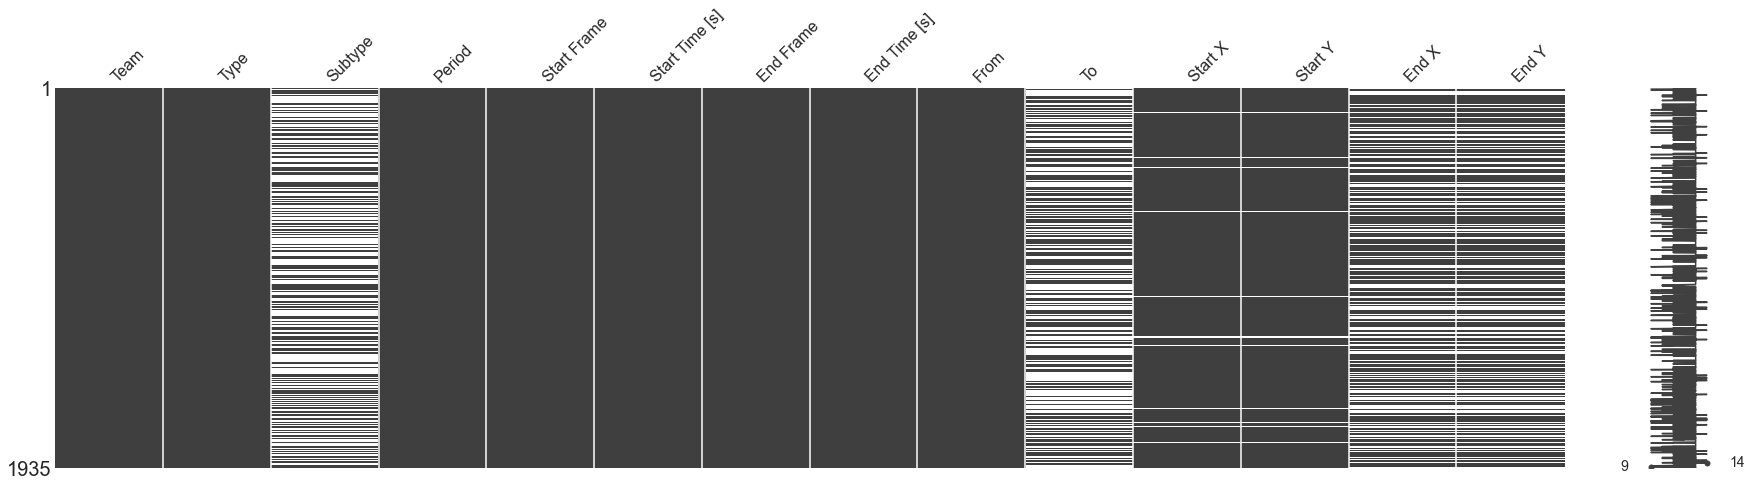

In [99]:
# Plot visualisation of the missing values for each feature of the raw DataFrame, df_events_raw
msno.matrix(df_events_raw, figsize = (30, 7))

In [100]:
# Counts of missing values
event_null_value_stats = df_events_raw.isnull().sum(axis=0)
event_null_value_stats[event_null_value_stats != 0]

Subtype    1067
To          971
Start X      86
Start Y      86
End X       714
End Y       714
dtype: int64

The visualisation shows us very quickly that there a few missing values in the `Subtype`, `To`, `Start X`, `Start Y`, `End X`, and `End Y columns.

#### <a id='#section3.2.2'>3.2.2. Tracking Data</a>

The Spatiotemporal Tracking data for each of the two sample matches available consists of the positions of all 22 players and the ball, sampled at a frequency of 25Hz. Individual player identities are tagged in the data, enabling tracking of each player over time. 

##### <a id='#section3.2.2.1'>3.2.2.1.  Data Dictionaries</a>
The [Metrica Sports](https://metrica-sports.com/) Tracking datasets each have thirty two features (columns) with the following definitions and data types:

| Feature                                   | Data Type     | Examples column names       |
|-------------------------------------------|---------------|-----------------------------|
| `Period`                                  | int64         |                             |
| `Time [s]`                                | float64       |                             |
| `Home/Away_No._x` (repeated 14 times)     | float64       | `Home_1_x`, `Away_14_x`     |
| `Home/Away_No._y` (repeated 14 times)     | float64       | `Home_1_y`, `Away_14_y`     |
| `ball_x`                                  | float64       |                             |
| `ball_y`                                  | float64       |                             |

For a full list of definitions, see the Metrica Sports documentation [[link](https://github.com/metrica-sports/sample-data/blob/master/documentation/events-definitions.pdf)].

##### <a id='#section3.2.2.2'>3.2.2.2. Import CSV as a pandas DataFrame</a>

In [101]:
# Read in the Tracking data - uses a function from the Metrica_IO library

## Home team
df_tracking_home_raw = mio.tracking_data(data_dir_metrica, game_id, 'Home')

## Away team
df_tracking_away_raw = mio.tracking_data(data_dir_metrica, game_id, 'Away')

Reading team: home
Reading team: away


##### <a id='#section3.2.2.3'>3.2.2.3.  Preliminary Data Handling</a>
For the data quality check, we will just look at the tracking data for the Home team.

Let's quality of the dataset by looking first and last rows in pandas using the [head()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) and [tail()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html) methods.

In [102]:
# Display the first 5 rows of the raw DataFrame, df_tracking_home_raw
df_tracking_home_raw.head()

,Period,Time [s],Home_11_x,Home_11_y,Home_1_x,Home_1_y,Home_2_x,Home_2_y,Home_3_x,Home_3_y,Home_4_x,Home_4_y,Home_5_x,Home_5_y,Home_6_x,Home_6_y,Home_7_x,Home_7_y,Home_8_x,Home_8_y,Home_9_x,Home_9_y,Home_10_x,Home_10_y,Home_12_x,Home_12_y,Home_13_x,Home_13_y,Home_14_x,Home_14_y,ball_x,ball_y
Frame,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,0.04,0.94275,0.50413,0.64812,0.28605,0.67752,0.42803,0.69882,0.55606,0.64348,0.76253,0.23339,0.25869,0.60269,0.47397,0.58508,0.53017,0.53163,0.75084,0.50637,0.30137,0.50194,0.61123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0.08,0.94275,0.50413,0.64812,0.28605,0.67752,0.42803,0.69882,0.55606,0.64348,0.76253,0.23339,0.25869,0.60269,0.47397,0.58508,0.53017,0.53163,0.75084,0.50637,0.30137,0.50194,0.61123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,0.12,0.94275,0.50413,0.64812,0.28605,0.67752,0.42803,0.69882,0.55606,0.64348,0.76253,0.23339,0.25869,0.60269,0.47397,0.58508,0.53017,0.53163,0.75084,0.50637,0.30137,0.50194,0.61123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,0.16,0.94275,0.50413,0.64812,0.28605,0.67752,0.42803,0.69882,0.55606,0.64348,0.76253,0.23254,0.25870,0.60269,0.47397,0.58508,0.53017,0.53163,0.75084,0.50637,0.30137,0.50194,0.61123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1,0.20,0.94275,0.50413,0.64812,0.28605,0.67752,0.42803,0.69882,0.55606,0.64348,0.76253,0.23170,0.25871,0.60269,0.47397,0.58508,0.53017,0.53163,0.75084,0.50637,0.30137,0.50194,0.61123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
# Display the last 5 rows of the raw DataFrame, df_tracking_home_raw
df_tracking_home_raw.tail()

,Period,Time [s],Home_11_x,Home_11_y,Home_1_x,Home_1_y,Home_2_x,Home_2_y,Home_3_x,Home_3_y,Home_4_x,Home_4_y,Home_5_x,Home_5_y,Home_6_x,Home_6_y,Home_7_x,Home_7_y,Home_8_x,Home_8_y,Home_9_x,Home_9_y,Home_10_x,Home_10_y,Home_12_x,Home_12_y,Home_13_x,Home_13_y,Home_14_x,Home_14_y,ball_x,ball_y
Frame,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
141152,2,5646.08,0.06285,0.51243,0.38499,0.15356,0.22558,0.41355,0.27142,0.32209,NaN,NaN,0.40592,0.08002,0.38915,0.56413,0.36216,0.56218,NaN,NaN,0.28426,0.35845,NaN,NaN,0.40837,0.14449,0.51032,0.94554,0.27962,0.36700,NaN,NaN
141153,2,5646.12,0.06285,0.51243,0.38499,0.15356,0.22558,0.41355,0.27142,0.32209,NaN,NaN,0.40592,0.08002,0.38965,0.56395,0.36216,0.56218,NaN,NaN,0.28365,0.35933,NaN,NaN,0.40837,0.14449,0.51031,0.94626,0.28009,0.36718,NaN,NaN
141154,2,5646.16,0.06285,0.51243,0.38499,0.15356,0.22558,0.41355,0.27142,0.32209,NaN,NaN,0.40592,0.08002,0.38986,0.56329,0.36216,0.56218,NaN,NaN,0.28322,0.36067,NaN,NaN,0.40837,0.14449,0.51029,0.94711,0.28031,0.36726,NaN,NaN
141155,2,5646.20,0.06285,0.51243,0.38499,0.15356,0.22558,0.41355,0.27142,0.32209,NaN,NaN,0.40592,0.08002,0.39001,0.56208,0.36216,0.56218,NaN,NaN,0.28266,0.36095,NaN,NaN,0.40837,0.14449,0.51028,0.94792,0.28059,0.36706,NaN,NaN
141156,2,5646.24,0.06285,0.51243,0.38499,0.15356,0.22558,0.41355,0.27142,0.32209,NaN,NaN,0.40592,0.08002,0.39007,0.56250,0.36216,0.56218,NaN,NaN,0.28201,0.36123,NaN,NaN,0.40837,0.14449,0.51029,0.94846,0.28065,0.36491,NaN,NaN


In [104]:
# Print the shape of the raw DataFrame, df_tracking_home_raw
print(df_tracking_home_raw.shape)    # 141,156 rows i.e. frames

(141156, 32)


In [105]:
# i.e 25 frames per second, in 90 minutes
25 * 60 * 90

135000

In [106]:
# Print the column names of the raw DataFrame, df_tracking_home_raw
print(df_tracking_home_raw.columns)

Index(['Period', 'Time [s]', 'Home_11_x', 'Home_11_y', 'Home_1_x', 'Home_1_y',
       'Home_2_x', 'Home_2_y', 'Home_3_x', 'Home_3_y', 'Home_4_x', 'Home_4_y',
       'Home_5_x', 'Home_5_y', 'Home_6_x', 'Home_6_y', 'Home_7_x', 'Home_7_y',
       'Home_8_x', 'Home_8_y', 'Home_9_x', 'Home_9_y', 'Home_10_x',
       'Home_10_y', 'Home_12_x', 'Home_12_y', 'Home_13_x', 'Home_13_y',
       'Home_14_x', 'Home_14_y', 'ball_x', 'ball_y'],
      dtype='object')


The dataset has fourteen features (columns). Full details of these attributes can be found in the [Data Dictionary](section3.3.1).

In [107]:
# Data types of the features of the raw DataFrame, df_tracking_home_raw
df_tracking_home_raw.dtypes

Period         int64
Time [s]     float64
Home_11_x    float64
Home_11_y    float64
Home_1_x     float64
Home_1_y     float64
Home_2_x     float64
Home_2_y     float64
Home_3_x     float64
Home_3_y     float64
Home_4_x     float64
Home_4_y     float64
Home_5_x     float64
Home_5_y     float64
Home_6_x     float64
Home_6_y     float64
Home_7_x     float64
Home_7_y     float64
Home_8_x     float64
Home_8_y     float64
Home_9_x     float64
Home_9_y     float64
Home_10_x    float64
Home_10_y    float64
Home_12_x    float64
Home_12_y    float64
Home_13_x    float64
Home_13_y    float64
Home_14_x    float64
Home_14_y    float64
ball_x       float64
ball_y       float64
dtype: object

Full details of the thirty-two features in this dataset and their data types can be found in the [Data Dictionary](section3.2.2.1).

In [108]:
# Info for the raw DataFrame, df_tracking_home_raw
df_tracking_home_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141156 entries, 1 to 141156
Data columns (total 32 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Period     141156 non-null  int64  
 1   Time [s]   141156 non-null  float64
 2   Home_11_x  141156 non-null  float64
 3   Home_11_y  141156 non-null  float64
 4   Home_1_x   141156 non-null  float64
 5   Home_1_y   141156 non-null  float64
 6   Home_2_x   141156 non-null  float64
 7   Home_2_y   141156 non-null  float64
 8   Home_3_x   141156 non-null  float64
 9   Home_3_y   141156 non-null  float64
 10  Home_4_x   95703 non-null   float64
 11  Home_4_y   95703 non-null   float64
 12  Home_5_x   141156 non-null  float64
 13  Home_5_y   141156 non-null  float64
 14  Home_6_x   141156 non-null  float64
 15  Home_6_y   141156 non-null  float64
 16  Home_7_x   141156 non-null  float64
 17  Home_7_y   141156 non-null  float64
 18  Home_8_x   106111 non-null  float64
 19  Home_8_y   106111 non-n

In [109]:
# Description of the raw DataFrame, df_tracking_home_raw, showing some summary statistics for each numberical column in the DataFrame
df_tracking_home_raw.describe()

,Period,Time [s],Home_11_x,Home_11_y,Home_1_x,Home_1_y,Home_2_x,Home_2_y,Home_3_x,Home_3_y,Home_4_x,Home_4_y,Home_5_x,Home_5_y,Home_6_x,Home_6_y,Home_7_x,Home_7_y,Home_8_x,Home_8_y,Home_9_x,Home_9_y,Home_10_x,Home_10_y,Home_12_x,Home_12_y,Home_13_x,Home_13_y,Home_14_x,Home_14_y,ball_x,ball_y
count,141156.000000,141156.000000,141156.000000,141156.000000,141156.000000,141156.000000,141156.000000,141156.000000,141156.000000,141156.000000,95703.000000,95703.000000,141156.000000,141156.000000,141156.000000,141156.000000,141156.000000,141156.000000,106111.000000,106111.000000,141156.000000,141156.000000,125738.000000,125738.000000,45454.000000,45454.000000,35046.000000,35046.000000,15419.000000,15419.000000,83272.000000,83272.000000
mean,1.518681,2823.140000,0.483456,0.493215,0.484626,0.446740,0.490693,0.499250,0.499506,0.501433,0.531981,0.608209,0.488752,0.455655,0.489999,0.498807,0.454687,0.544343,0.488104,0.538962,0.485858,0.486522,0.475212,0.507361,0.506398,0.625909,0.438297,0.572001,0.377159,0.726150,0.485429,0.508834
std,0.499653,1629.934865,0.383120,0.047881,0.237552,0.281024,0.231540,0.161655,0.247917,0.160537,0.211619,0.231428,0.217559,0.229958,0.198856,0.159156,0.221069,0.218539,0.211192,0.299830,0.212117,0.196957,0.234297,0.173257,0.238345,0.183305,0.224361,0.139946,0.199035,0.166102,0.219110,0.290864
min,1.000000,0.040000,-0.024210,0.146320,-0.033390,-0.049660,0.005540,0.040410,-0.023120,-0.030750,0.004450,-0.018030,-0.025520,-0.015540,-0.026460,0.052650,-0.008350,-0.021020,0.017890,-0.015410,-0.015100,-0.044780,-0.009370,-0.031320,0.074030,0.027400,0.049360,0.264980,0.054410,0.364910,-0.035680,-0.038910
25%,1.000000,1411.590000,0.100277,0.466720,0.304270,0.213388,0.317887,0.387140,0.300118,0.413430,0.374940,0.458940,0.337210,0.291910,0.359130,0.389860,0.289587,0.392608,0.328290,0.270265,0.325960,0.365028,0.302950,0.400560,0.305910,0.507293,0.249007,0.458945,0.235385,0.578380,0.330067,0.251497
50%,2.000000,2823.140000,0.281625,0.493190,0.480950,0.392065,0.496610,0.496130,0.503810,0.498670,0.547380,0.655220,0.499870,0.452220,0.487595,0.497640,0.455040,0.530910,0.493140,0.553470,0.482380,0.498150,0.467515,0.505930,0.524310,0.636210,0.424970,0.559545,0.336940,0.739200,0.491640,0.496750
75%,2.000000,4234.690000,0.865443,0.521143,0.660513,0.694670,0.669000,0.605912,0.700340,0.589890,0.687880,0.780770,0.647602,0.586670,0.628350,0.603110,0.615715,0.724150,0.642315,0.821060,0.643933,0.602760,0.627170,0.612247,0.711418,0.768470,0.626290,0.662850,0.501090,0.852490,0.647083,0.773545
max,2.000000,5646.240000,1.036150,0.731240,1.050000,1.017510,1.024580,1.043930,1.020620,1.022940,0.983440,1.014140,1.049250,1.034800,0.989040,0.999780,0.983220,1.017130,0.988840,1.002180,1.026420,1.022830,1.048230,1.002570,0.957700,1.003960,0.974310,1.001650,0.829880,1.009150,1.025860,1.031020


<AxesSubplot:>

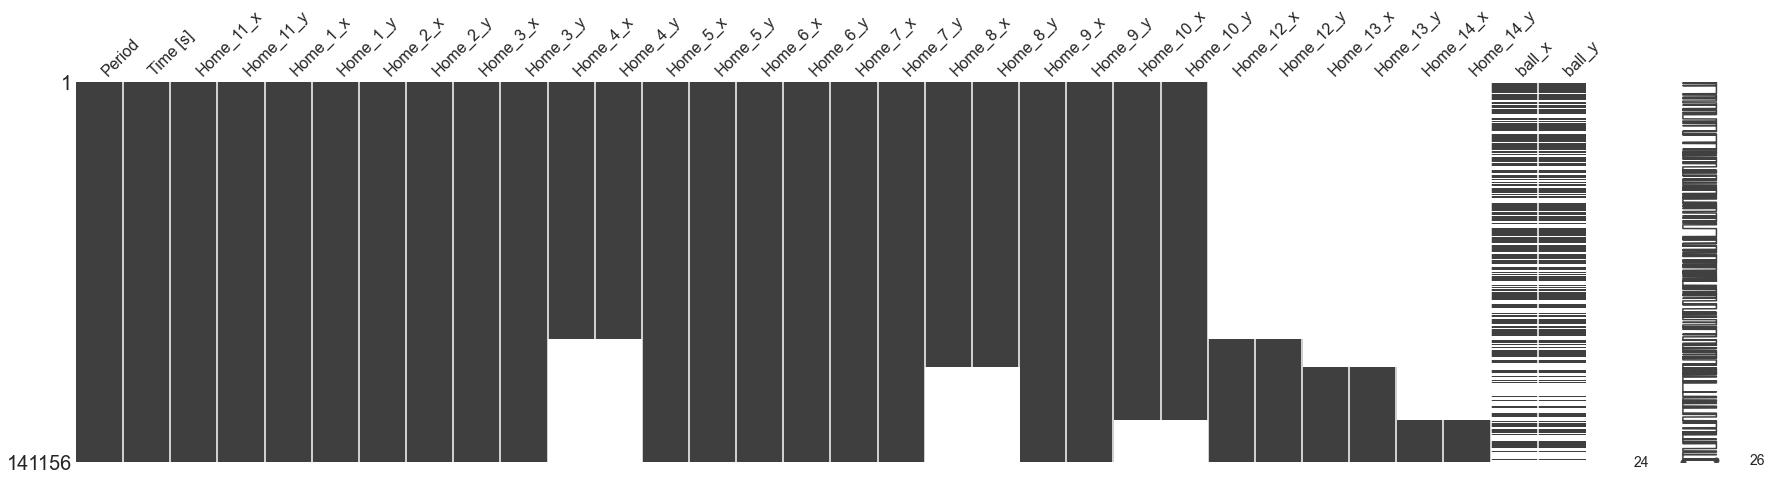

In [110]:
# Plot visualisation of the missing values for each feature of the raw DataFrame, df_tracking_home_raw
msno.matrix(df_tracking_home_raw, figsize = (30, 7))

In [111]:
# Counts of missing values
tracking_null_value_stats = df_tracking_home_raw.isnull().sum(axis=0)
tracking_null_value_stats[tracking_null_value_stats != 0]

Home_4_x      45453
Home_4_y      45453
Home_8_x      35045
Home_8_y      35045
Home_10_x     15418
Home_10_y     15418
Home_12_x     95702
Home_12_y     95702
Home_13_x    106110
Home_13_y    106110
Home_14_x    125737
Home_14_y    125737
ball_x        57884
ball_y        57884
dtype: int64

The visualisation shows us very quickly that there a few missing values in x and y coordinates for some players. These indicate player that were subbed on and off the pitch during the match. There are also some null values for the x and y coordinates of the ball, `ball_x` and `ball_y`.

---

## <a id='#section4'>4. Data Engineering</a>
Before we answer the questions in the brief through [Exploratory Data Analysis (EDA)](#section5), we'll first need to clean and wrangle the datasets to a form that meet our needs.

### <a id='#section4.1'>4.1. Events Data</a>

#### <a id='#section4.1.1'>4.1.1. Assign Raw DataFrame to new Engineered DataFrame</a>

In [112]:
df_tracking_home = df_tracking_home_raw.copy()
df_tracking_away = df_tracking_away_raw.copy()

#### <a id='#section4.1.1'>4.1.1. Convert coordinates</a>
Convert Metrica's 0-1 coordinate system to a 106 by 86 coordinate system using the `to_metric_coordinates` function from the Metrica IO (`mio`) library.

##### Original coordinates 

![title](../../img/metrica_pitch_dimensions_original.png)

Diagram credit to Laurie Shaw ([@Soccermatics](https://twitter.com/EightyFivePoint)).


##### Converted coordinates

![title](../../img/metrica_pitch_dimensions_converted.png)

Diagram credit to Laurie Shaw ([@EightyFivePoint](https://twitter.com/EightyFivePoint)).

In [113]:
df_events = df_events_raw.copy()

In [114]:
# Unit conversion from metric data units to meters
df_events = mio.to_metric_coordinates(df_events)

### <a id='#section4.2'>4.2. Tracking Data</a>

#### <a id='#section4.2.1'>4.2.1. Convert coordinates</a>
As per the Event data, convert Metrica's 0-1 coordinate system to a 106 by 86 coordinate system.

In [115]:
# Convert to pitch coordinates
df_tracking_home = mio.to_metric_coordinates(df_tracking_home)
df_tracking_away = mio.to_metric_coordinates(df_tracking_away)

In [116]:
# Display DataFrame
df_tracking_home.head()

,Period,Time [s],Home_11_x,Home_11_y,Home_1_x,Home_1_y,Home_2_x,Home_2_y,Home_3_x,Home_3_y,Home_4_x,Home_4_y,Home_5_x,Home_5_y,Home_6_x,Home_6_y,Home_7_x,Home_7_y,Home_8_x,Home_8_y,Home_9_x,Home_9_y,Home_10_x,Home_10_y,Home_12_x,Home_12_y,Home_13_x,Home_13_y,Home_14_x,Home_14_y,ball_x,ball_y
Frame,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,0.04,46.9315,-0.28084,15.70072,14.5486,18.81712,4.89396,21.07492,-3.81208,15.20888,-17.85204,-28.26066,16.40908,10.88514,1.77004,9.01848,-2.05156,3.35278,-17.05712,0.67522,13.50684,0.20564,-7.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0.08,46.9315,-0.28084,15.70072,14.5486,18.81712,4.89396,21.07492,-3.81208,15.20888,-17.85204,-28.26066,16.40908,10.88514,1.77004,9.01848,-2.05156,3.35278,-17.05712,0.67522,13.50684,0.20564,-7.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,0.12,46.9315,-0.28084,15.70072,14.5486,18.81712,4.89396,21.07492,-3.81208,15.20888,-17.85204,-28.26066,16.40908,10.88514,1.77004,9.01848,-2.05156,3.35278,-17.05712,0.67522,13.50684,0.20564,-7.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,0.16,46.9315,-0.28084,15.70072,14.5486,18.81712,4.89396,21.07492,-3.81208,15.20888,-17.85204,-28.35076,16.40840,10.88514,1.77004,9.01848,-2.05156,3.35278,-17.05712,0.67522,13.50684,0.20564,-7.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1,0.20,46.9315,-0.28084,15.70072,14.5486,18.81712,4.89396,21.07492,-3.81208,15.20888,-17.85204,-28.43980,16.40772,10.88514,1.77004,9.01848,-2.05156,3.35278,-17.05712,0.67522,13.50684,0.20564,-7.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [117]:
# Display DataFrame
df_tracking_away.head()

,Period,Time [s],Away_25_x,Away_25_y,Away_15_x,Away_15_y,Away_16_x,Away_16_y,Away_17_x,Away_17_y,Away_18_x,Away_18_y,Away_19_x,Away_19_y,Away_20_x,Away_20_y,Away_21_x,Away_21_y,Away_22_x,Away_22_y,Away_23_x,Away_23_y,Away_24_x,Away_24_y,Away_26_x,Away_26_y,ball_x,ball_y
Frame,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,0.04,-51.70892,-1.19884,-18.13554,-21.65528,-20.42196,-3.52376,-18.8309,7.51128,-14.3047,12.88668,-0.46216,-28.12752,-10.79928,1.89176,-7.08822,12.67928,-0.11766,35.53884,0.18762,-0.0986,-0.51198,9.36088,NaN,NaN,NaN,NaN
2,1,0.08,-51.70892,-1.19884,-18.13554,-21.65528,-20.42196,-3.52376,-18.8309,7.51128,-14.3047,12.88668,-0.46216,-28.12752,-10.79928,1.89176,-7.08822,12.67928,-0.11766,35.53884,0.18762,-0.0986,-0.51198,9.36088,NaN,NaN,NaN,NaN
3,1,0.12,-51.70892,-1.19884,-18.13554,-21.65528,-20.42196,-3.52376,-18.8309,7.51128,-14.3047,12.88668,-0.46216,-28.12752,-10.79928,1.89176,-7.08822,12.67928,-0.11766,35.53884,0.18762,-0.0986,-0.51198,9.36088,NaN,NaN,NaN,NaN
4,1,0.16,-51.70892,-1.19884,-18.19384,-21.65596,-20.42196,-3.52376,-18.8309,7.51128,-14.3047,12.88668,-0.46216,-28.12752,-10.79928,1.89176,-7.08822,12.67928,-0.11766,35.53884,0.18762,-0.0986,-0.51198,9.36088,NaN,NaN,NaN,NaN
5,1,0.20,-51.70892,-1.19884,-18.25002,-21.65596,-20.42196,-3.52376,-18.8309,7.51128,-14.3047,12.88668,-0.46216,-28.12752,-10.79928,1.89176,-7.08822,12.67928,-0.11766,35.53884,0.18762,-0.0986,-0.51198,9.36088,NaN,NaN,NaN,NaN


In [118]:
# Description of the DataFrame, df_tracking_home, showing some summary statistics for each numerical column in the DataFrame
df_tracking_home.describe()

,Period,Time [s],Home_11_x,Home_11_y,Home_1_x,Home_1_y,Home_2_x,Home_2_y,Home_3_x,Home_3_y,Home_4_x,Home_4_y,Home_5_x,Home_5_y,Home_6_x,Home_6_y,Home_7_x,Home_7_y,Home_8_x,Home_8_y,Home_9_x,Home_9_y,Home_10_x,Home_10_y,Home_12_x,Home_12_y,Home_13_x,Home_13_y,Home_14_x,Home_14_y,ball_x,ball_y
count,141156.000000,141156.000000,141156.000000,141156.000000,141156.000000,141156.000000,141156.000000,141156.000000,141156.000000,141156.000000,95703.000000,95703.000000,141156.000000,141156.000000,141156.000000,141156.000000,141156.000000,141156.000000,106111.000000,106111.000000,141156.000000,141156.000000,125738.000000,125738.000000,45454.000000,45454.000000,35046.000000,35046.000000,15419.000000,15419.000000,83272.000000,83272.000000
mean,1.518681,2823.140000,-1.753700,0.461359,-1.629686,3.621711,-0.986539,0.051011,-0.052375,-0.097436,3.390000,-7.358219,-1.192262,3.015486,-1.060156,0.081158,-4.803228,-3.015349,-1.260950,-2.649404,-1.499021,0.916524,-2.627557,-0.500521,0.678142,-8.561785,-6.540521,-4.896060,-13.021101,-15.378184,-1.544530,-0.600702
std,0.499653,1629.934865,40.610707,3.255940,25.180540,19.109612,24.543252,10.992521,26.279234,10.916489,22.431662,15.737099,23.061306,15.637122,21.078695,10.822600,23.433278,14.860635,22.386358,20.388425,22.484384,13.393083,24.835471,11.781505,25.264571,12.464735,23.782218,9.516354,21.097711,11.294934,23.225652,19.778785
min,1.000000,0.040000,-55.566260,-15.724320,-56.539340,-35.190680,-52.412760,-36.987240,-55.450720,-35.559920,-52.528300,-34.961520,-55.705120,-36.366400,-55.804760,-33.985040,-53.885100,-35.164840,-51.103660,-34.148240,-54.600600,-35.552440,-53.993220,-34.174760,-45.152820,-34.269280,-47.767840,-34.112200,-47.232540,-34.622200,-56.782080,-36.109360
25%,1.000000,1411.590000,-42.370585,-1.437690,-20.747380,-13.237560,-19.303925,-7.202050,-21.187545,-6.112520,-13.256360,-19.092360,-17.255740,-5.893560,-14.932220,-7.011480,-22.303725,-15.242200,-18.201260,-21.832080,-18.448240,-6.987680,-20.887300,-7.632830,-20.573540,-18.255960,-26.605205,-11.073800,-28.049190,-23.969320,-18.012845,-18.601060
50%,2.000000,2823.140000,-23.147750,0.463080,-2.019300,7.339580,-0.359340,0.263160,0.403860,0.090440,5.022280,-10.554960,-0.013780,3.249040,-1.314930,0.160480,-4.765760,-2.101880,-0.727160,-3.635960,-1.867720,0.125800,-3.443410,-0.403240,2.576860,-9.262280,-7.953180,-4.049060,-17.284360,-16.265600,-0.886160,0.221000
75%,2.000000,4234.690000,38.736905,2.263040,17.014325,19.489650,17.914000,7.674480,21.236040,5.886760,19.915280,2.792080,15.645865,14.150120,13.605100,7.489520,12.265790,7.302690,15.085390,15.621980,15.256845,9.178130,13.480020,6.761920,22.410255,-0.495890,13.386740,2.791740,0.115540,-5.329840,15.590745,16.898170
max,2.000000,5646.240000,56.831900,24.050240,58.300000,37.376880,55.605480,31.252120,55.185720,36.091000,51.244640,35.226040,58.220500,35.056720,51.838240,30.419800,51.221320,35.429360,51.817040,35.047880,55.800520,37.045040,58.112380,36.129760,48.516200,32.136800,50.276860,15.981360,34.967280,9.186120,55.741160,36.645880


#### <a id='#section4.2.2'>4.2.2. Calculate player velocities</a>
Determine the velocity of each player at a given timestep using the `calc_player_velocities` function from the `mvel` library.

In [119]:
# Calculate player velocities
df_tracking_home = mvel.calc_player_velocities(df_tracking_home, smoothing=True, filter_='moving_average')
df_tracking_away = mvel.calc_player_velocities(df_tracking_away, smoothing=True, filter_='moving_average')

# Note: if the lines above produce an error (happens for one version of NumPy) chane the code in the mvel library to the following lines below:
"""
tracking_home = mvel.calc_player_velocities(df_tracking_home, smoothing=True, filter_='moving_average')
tracking_away = mvel.calc_player_velocities(df_tracking_away, smoothing=True, filter_='moving_average')
"""

"\ntracking_home = mvel.calc_player_velocities(df_tracking_home, smoothing=True, filter_='moving_average')\ntracking_away = mvel.calc_player_velocities(df_tracking_away, smoothing=True, filter_='moving_average')\n"

In [120]:
# Display DataFrame
df_tracking_home.head()

,Period,Time [s],Home_11_x,Home_11_y,Home_1_x,Home_1_y,Home_2_x,Home_2_y,Home_3_x,Home_3_y,Home_4_x,Home_4_y,Home_5_x,Home_5_y,Home_6_x,Home_6_y,Home_7_x,Home_7_y,Home_8_x,Home_8_y,Home_9_x,Home_9_y,Home_10_x,Home_10_y,Home_12_x,Home_12_y,Home_13_x,Home_13_y,Home_14_x,Home_14_y,ball_x,ball_y,Home_1_vx,Home_1_vy,Home_1_speed,Home_10_vx,Home_10_vy,Home_10_speed,Home_11_vx,Home_11_vy,Home_11_speed,Home_12_vx,Home_12_vy,Home_12_speed,Home_13_vx,Home_13_vy,Home_13_speed,Home_14_vx,Home_14_vy,Home_14_speed,Home_2_vx,Home_2_vy,Home_2_speed,Home_3_vx,Home_3_vy,Home_3_speed,Home_4_vx,Home_4_vy,Home_4_speed,Home_5_vx,Home_5_vy,Home_5_speed,Home_6_vx,Home_6_vy,Home_6_speed,Home_7_vx,Home_7_vy,Home_7_speed,Home_8_vx,Home_8_vy,Home_8_speed,Home_9_vx,Home_9_vy,Home_9_speed
Frame,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,0.04,46.9315,-0.28084,15.70072,14.5486,18.81712,4.89396,21.07492,-3.81208,15.20888,-17.85204,-28.26066,16.40908,10.88514,1.77004,9.01848,-2.05156,3.35278,-17.05712,0.67522,13.50684,0.20564,-7.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0.08,46.9315,-0.28084,15.70072,14.5486,18.81712,4.89396,21.07492,-3.81208,15.20888,-17.85204,-28.26066,16.40908,10.88514,1.77004,9.01848,-2.05156,3.35278,-17.05712,0.67522,13.50684,0.20564,-7.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0.12,46.9315,-0.28084,15.70072,14.5486,18.81712,4.89396,21.07492,-3.81208,15.20888,-17.85204,-28.26066,16.40908,10.88514,1.77004,9.01848,-2.05156,3.35278,-17.05712,0.67522,13.50684,0.20564,-7.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0.16,46.9315,-0.28084,15.70072,14.5486,18.81712,4.89396,21.07492,-3.81208,15.20888,-17.85204,-28.35076,16.40840,10.88514,1.77004,9.01848,-2.05156,3.35278,-17.05712,0.67522,13.50684,0.20564,-7.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.2525,-0.017,2.252564,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1,0.20,46.9315,-0.28084,15.70072,14.5486,18.81712,4.89396,21.07492,-3.81208,15.20888,-17.85204,-28.43980,16.40772,10.88514,1.77004,9.01848,-2.05156,3.35278,-17.05712,0.67522,13.50684,0.20564,-7.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.2260,-0.017,2.226065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [121]:
# Display DataFrame
df_tracking_away.head()

,Period,Time [s],Away_25_x,Away_25_y,Away_15_x,Away_15_y,Away_16_x,Away_16_y,Away_17_x,Away_17_y,Away_18_x,Away_18_y,Away_19_x,Away_19_y,Away_20_x,Away_20_y,Away_21_x,Away_21_y,Away_22_x,Away_22_y,Away_23_x,Away_23_y,Away_24_x,Away_24_y,Away_26_x,Away_26_y,ball_x,ball_y,Away_15_vx,Away_15_vy,Away_15_speed,Away_16_vx,Away_16_vy,Away_16_speed,Away_17_vx,Away_17_vy,Away_17_speed,Away_18_vx,Away_18_vy,Away_18_speed,Away_19_vx,Away_19_vy,Away_19_speed,Away_20_vx,Away_20_vy,Away_20_speed,Away_21_vx,Away_21_vy,Away_21_speed,Away_22_vx,Away_22_vy,Away_22_speed,Away_23_vx,Away_23_vy,Away_23_speed,Away_24_vx,Away_24_vy,Away_24_speed,Away_25_vx,Away_25_vy,Away_25_speed,Away_26_vx,Away_26_vy,Away_26_speed
Frame,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,0.04,-51.70892,-1.19884,-18.13554,-21.65528,-20.42196,-3.52376,-18.8309,7.51128,-14.3047,12.88668,-0.46216,-28.12752,-10.79928,1.89176,-7.08822,12.67928,-0.11766,35.53884,0.18762,-0.0986,-0.51198,9.36088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0.08,-51.70892,-1.19884,-18.13554,-21.65528,-20.42196,-3.52376,-18.8309,7.51128,-14.3047,12.88668,-0.46216,-28.12752,-10.79928,1.89176,-7.08822,12.67928,-0.11766,35.53884,0.18762,-0.0986,-0.51198,9.36088,NaN,NaN,NaN,NaN,0.0000,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
3,1,0.12,-51.70892,-1.19884,-18.13554,-21.65528,-20.42196,-3.52376,-18.8309,7.51128,-14.3047,12.88668,-0.46216,-28.12752,-10.79928,1.89176,-7.08822,12.67928,-0.11766,35.53884,0.18762,-0.0986,-0.51198,9.36088,NaN,NaN,NaN,NaN,0.0000,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,1,0.16,-51.70892,-1.19884,-18.19384,-21.65596,-20.42196,-3.52376,-18.8309,7.51128,-14.3047,12.88668,-0.46216,-28.12752,-10.79928,1.89176,-7.08822,12.67928,-0.11766,35.53884,0.18762,-0.0986,-0.51198,9.36088,NaN,NaN,NaN,NaN,-1.4575,-0.017,1.457599,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
5,1,0.20,-51.70892,-1.19884,-18.25002,-21.65596,-20.42196,-3.52376,-18.8309,7.51128,-14.3047,12.88668,-0.46216,-28.12752,-10.79928,1.89176,-7.08822,12.67928,-0.11766,35.53884,0.18762,-0.0986,-0.51198,9.36088,NaN,NaN,NaN,NaN,-1.4045,0.000,1.404500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN


Explored the `df_tracking_home` and `df_tracking_away` DataFrames, we can see the additional columns for velocity have been added to the DataFrame. These columns are of the following, but for all the players:
*    `Away_15_vx`
*    `Away_15_vy`
*    `Away_15_speed` i.e. total speed

These new metrics are all measured in meters per second.

#### <a id='#section4.2.3'>4.2.3. Determine Interfering players within ball radius</a>
The Interference on the shooter in the Shots data is defined as:
*    Low - no or minimal interference;
*    Medium - a single defender was in close proximity to the shot-taker; or
*    High - multiple defenders in close proximity and interfering with the shot.

In the example below, this definition would say there are two opponents interfering with the player in possession:

![title](../../img/interference3.png)

To determine the interference level, the following cells calculate the number of players within a defined radius of the ball, at each frame. The output can then be summated to determine the number of players within the radius of the ball, at the time of the shot, and subsequently, the interference level the shooter experiences.

StatsBomb defined pressure events as when a player enters within a 5-yard (4.572m) radius of the player in possession [[link](https://statsbomb.com/2018/05/how-statsbomb-data-helps-measure-counter-pressing/)]. This project will also use this value.

To determine whether the player is within the radius of the ball, this can be determined by calculating the distance between ⟨𝑥𝑐,𝑦𝑐⟩ and ⟨𝑥𝑝,𝑦𝑝⟩, as given by the Pythagorean theorem:
𝑑 = √((𝑥𝑝−𝑥𝑐)2+(𝑦𝑝−𝑦𝑐)2)

The point ⟨𝑥𝑝,𝑦𝑝⟩ is inside the circle if 𝑑<𝑟, on the circle if 𝑑=𝑟, and outside the circle if 𝑑>𝑟. You can save yourself a little work by comparing 𝑑2 with 𝑟2 instead: the point is inside the circle if 𝑑2<𝑟2, on the circle if 𝑑2=𝑟2, and outside the circle if 𝑑2>𝑟2. Thus, you want to compare the number (𝑥𝑝−𝑥𝑐)2+(𝑦𝑝−𝑦𝑐)2 with 𝑟2.

An example explanation can be found at the following [[link](https://math.stackexchange.com/questions/198764/how-to-know-if-a-point-is-inside-a-circle)].

In [122]:
# Define list of IDs of the home and away players
home_player_ids = np.unique( [ c[:-2] for c in df_tracking_home_raw.columns if c[:4] in ['Home', 'Away'] ] )
away_player_ids = np.unique( [ c[:-2] for c in df_tracking_away_raw.columns if c[:4] in ['Home', 'Away'] ] )

In [123]:
# Remove the previously calculated player radius that are already in the 'team' DataFrame
def remove_player_interference(team):
    columns = [c for c in team.columns if c.split('_')[-1] in ['_bx', '_by', '_px', '_py', '_pxbx', '_pyby', '_apb', '_isInterference', '_Interference']]
    team = team.drop(columns=columns)
    return team

# Calculate the number of players within the defined radius of the ball
def calc_player_interference(team, rad, lst_ids):
    
    ## Remove any radius calculations in the DataFrame
    team = remove_player_interference(team)
    
    ## Get the player ids
    player_ids = lst_ids
    
    ## Calculate whether a player is within the defined radius of the ball i.e. pressuring the ball
    for player in player_ids:    # cycle through players individually

        ### Determine ball locations
        team[player + "_bx"] = team['ball_x']
        team[player + "_by"] = team['ball_y']

        ### Determine the player locations
        team[player + "_px"] = team[player + "_x"]
        team[player + "_py"]= team[player + "_y"]

        ### Determine the square distance between the ball and player along the x-axis
        team[player + "_pxbx"] = (team[player + "_px"] - team[player + "_bx"])**2
        team[player + "_pyby"] = (team[player + "_py"] - team[player + "_by"])**2

        ### Determine the square distance between the ball and player along the y-axis
        team[player + "_apb"] = np.sqrt(np.abs(team[player + "_pxbx"] - team[player + "_pyby"]))
        
        ### Determine whether the player is within the defined radius of the ball
        team[player + "_isInterference"] = np.where(team[player + "_apb"] <= rad, 1, 0)
    
    ## Drop unnessary columns used in calculation
    columns = [c for c in team.columns if c.split('_')[-1] in ['bx', 'by', 'px', 'py', 'pxbx', 'pyby', 'apb']] # Get the player ids
    team = team.drop(columns=columns)
    
    ## Summate the number of inference players
    team['Total_Interference'] = team[[col for col in team.columns if col.endswith('_isInterference')]].sum(axis=1)
    
    ## Return DataFrame
    return team

In [124]:
# Calculate player interference using 2m - consider using 4.572m (5 yards, as used by StatsBomb)
df_tracking_home = calc_player_interference(df_tracking_home, rad=4.572, lst_ids=home_player_ids).rename(columns={'Total_Interference': 'Home_Total_Interference'})
df_tracking_away = calc_player_interference(df_tracking_away, rad=4.572, lst_ids=away_player_ids).rename(columns={'Total_Interference': 'Away_Total_Interference'})

##### Check the 2nd goal (frame: 12,201, index: 198)

In [125]:
# Look at goal 2 of Home Tracking data - frame == 12,201
df_tracking_home[df_tracking_home.index==12_201]

,Period,Time [s],Home_11_x,Home_11_y,Home_1_x,Home_1_y,Home_2_x,Home_2_y,Home_3_x,Home_3_y,Home_4_x,Home_4_y,Home_5_x,Home_5_y,Home_6_x,Home_6_y,Home_7_x,Home_7_y,Home_8_x,Home_8_y,Home_9_x,Home_9_y,Home_10_x,Home_10_y,Home_12_x,Home_12_y,Home_13_x,Home_13_y,Home_14_x,Home_14_y,ball_x,ball_y,Home_1_vx,Home_1_vy,Home_1_speed,Home_10_vx,Home_10_vy,Home_10_speed,Home_11_vx,Home_11_vy,Home_11_speed,Home_12_vx,Home_12_vy,Home_12_speed,Home_13_vx,Home_13_vy,Home_13_speed,Home_14_vx,Home_14_vy,Home_14_speed,Home_2_vx,Home_2_vy,Home_2_speed,Home_3_vx,Home_3_vy,Home_3_speed,Home_4_vx,Home_4_vy,Home_4_speed,Home_5_vx,Home_5_vy,Home_5_speed,Home_6_vx,Home_6_vy,Home_6_speed,Home_7_vx,Home_7_vy,Home_7_speed,Home_8_vx,Home_8_vy,Home_8_speed,Home_9_vx,Home_9_vy,Home_9_speed,Home_1_isInterference,Home_10_isInterference,Home_11_isInterference,Home_12_isInterference,Home_13_isInterference,Home_14_isInterference,Home_2_isInterference,Home_3_isInterference,Home_4_isInterference,Home_5_isInterference,Home_6_isInterference,Home_7_isInterference,Home_8_isInterference,Home_9_isInterference,Home_Total_Interference
Frame,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12201,1,488.04,26.02512,1.78568,-39.9249,17.10064,-18.66024,15.88616,-6.75856,-0.71128,-27.55682,-9.98716,-45.78458,6.8306,-19.91846,3.83316,-45.80154,6.92036,-44.06102,-1.92168,-38.47588,-19.26916,-47.21028,-3.46664,NaN,NaN,NaN,NaN,NaN,NaN,-46.89334,-1.92712,1.696,-2.278,2.840018,-5.406,-5.491,7.705577,-0.6095,0.34,0.697919,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.8745,0.238,0.906308,-0.053,0.969,0.970448,-1.06,1.326,1.697609,-2.0405,1.037,2.288888,-1.325,0.442,1.396778,-1.802,0.255,1.819953,-3.6305,2.176,4.232671,-0.795,0.561,0.973009,0,1,0,0,0,0,0,0,0,0,0,0,1,0,2


In [126]:
# Look at goal 2 of Away Tracking data - frame == 12,201
df_tracking_away[df_tracking_away.index==12_201]

,Period,Time [s],Away_25_x,Away_25_y,Away_15_x,Away_15_y,Away_16_x,Away_16_y,Away_17_x,Away_17_y,Away_18_x,Away_18_y,Away_19_x,Away_19_y,Away_20_x,Away_20_y,Away_21_x,Away_21_y,Away_22_x,Away_22_y,Away_23_x,Away_23_y,Away_24_x,Away_24_y,Away_26_x,Away_26_y,ball_x,ball_y,Away_15_vx,Away_15_vy,Away_15_speed,Away_16_vx,Away_16_vy,Away_16_speed,Away_17_vx,Away_17_vy,Away_17_speed,Away_18_vx,Away_18_vy,Away_18_speed,Away_19_vx,Away_19_vy,Away_19_speed,Away_20_vx,Away_20_vy,Away_20_speed,Away_21_vx,Away_21_vy,Away_21_speed,Away_22_vx,Away_22_vy,Away_22_speed,Away_23_vx,Away_23_vy,Away_23_speed,Away_24_vx,Away_24_vy,Away_24_speed,Away_25_vx,Away_25_vy,Away_25_speed,Away_26_vx,Away_26_vy,Away_26_speed,Away_15_isInterference,Away_16_isInterference,Away_17_isInterference,Away_18_isInterference,Away_19_isInterference,Away_20_isInterference,Away_21_isInterference,Away_22_isInterference,Away_23_isInterference,Away_24_isInterference,Away_25_isInterference,Away_26_isInterference,Away_Total_Interference
Frame,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12201,1,488.04,-50.92346,0.32232,-45.59272,-5.28088,-47.07884,-3.65976,-47.2495,5.4502,-43.30206,15.3204,-41.02942,-4.26768,-41.5096,7.40724,-39.66202,0.59908,-36.04212,9.88108,-18.98036,15.89704,-28.18964,-8.8196,NaN,NaN,-46.89334,-1.92712,-0.8215,0.153,0.835626,-2.279,0.408,2.315233,-1.749,1.207,2.125053,-1.325,-1.462,1.973086,-1.643,-0.578,1.741704,-0.3445,-0.238,0.418717,-0.0795,0.238,0.250927,-0.6095,0.136,0.624489,0.0,0.153,0.153,-0.053,0.051,0.073553,-0.371,-1.377,1.426103,NaN,NaN,NaN,1,1,0,0,0,0,0,0,0,0,1,0,3


/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:145: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:145: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:153: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot( hometeam['ball_x'], hometeam['ball_y'], 'ko', MarkerSize=6, al

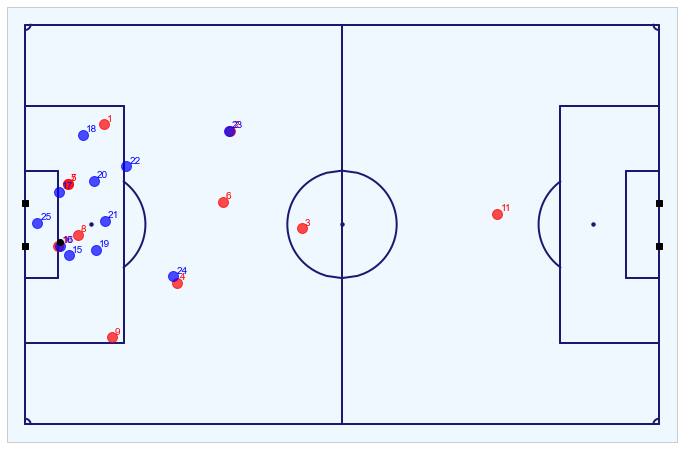

In [127]:
# Visualise the shot and the positions of the players

## Define index of Event data and frame of Tracking data
index = 198    # frame 12,201
frame = df_events.loc[index]['Start Frame']

## Visualise player positions using plot_events function from mviz library
fig, ax = mviz.plot_frame(df_tracking_home.loc[frame], df_tracking_away.loc[frame], annotate=True)

When using a distance of 5 yards (4.572m), the following players are identified in the dataset as interfering with play (`isInterference` == 1):
*    Home:
     +    Player 10 (the shot taker)
     +    Player 8
*    Away:
     +    Player 15
     +    Player 16 (closest opponent making a challenge)
     +    Player 25 (the goalkeeper)
     
Looking at the visualisation, this appears to be working well!

#### <a id='#section4.2.4'>4.2.4. Reverse direction of players</a>
Reverse direction of a player so that home team is alway attacking right->left i.e. no switch at half time

In [128]:
# Reverse direction of a player so that home team is alway attacking right->left i.e. no switch at half time
df_tracking_home, df_tracking_away, df_events = mio.to_single_playing_direction(df_tracking_home, df_tracking_away, df_events)

#### <a id='#section4.2.5'>4.2.5. Determine Intervening Players</a>
The number of intervening players, both for the the team mates and opponents of the shooter, is the number of individuals that are obscuring the goal at the instant of the shot (from the perspective of the shot-taker).

Therefore, this can be visualised as a triangle between the ball and the two posts at the moment a shot is taken.

![title](../../img/intervening.png)

We can determine whether a given point (a player) lies inside a triangle or not (post 1, post 2, and ball) by: 
*    Calculating the area between the two posts and the ball (A)
*    Calculating the area between the identified player and the two posts (A1)
*    Calculating the area between the identified player, left post, the ball (A2)
*    Calculating the area between the identified player, right post, the ball (A3)
*    Taking these four triangles, the player lies inside the triangle, then A1 + A2 + A3 must be equal to A. If not, the player is outside the triangle and is therefore not interfering with play, as per the previous definition.

The following code determines the areas of all these triangles for the ball, the posts, and the each of the players, for each frame, resulting with a player-by-player Boolean field, determining whether the player is interfering with play (1) or not (0). These values can then be summated to determine the number of Team Mates intervening and the number of Opponents intervening.

Example information that explains this further [[link](https://www.geeksforgeeks.org/check-whether-a-given-point-lies-inside-a-triangle-or-not/)].

In [129]:
# Remove the previously calculated player intervening that are already in the 'team' DataFrame
def remove_player_intervening(team):
    columns = [c for c in team.columns if c.split('_')[-1] in ['bx', 'by', 'px', 'py', 'p1x', 'p1y', 'p2x', 'p2y', 'a', 'a1', 'a2', 'a3', 'isIntervening', '_Intervening']]
    team = team.drop(columns=columns)
    return team

# Define area calculation - source: : https://www.geeksforgeeks.org/check-whether-a-given-point-lies-inside-a-triangle-or-not/
def area(x1, y1, x2, y2, x3, y3): 
    return abs((x1 * (y2 - y3) + x2 * (y3 - y1) + x3 * (y1 - y2)) / 2.0)

# Calculate the number of players interfering between the ball and the goal
def calc_player_intervening(team, lst_ids):
    
    ## Remove any radius calculations in the DataFrame
    team = remove_player_intervening(team)
    
    ## Get the player ids
    player_ids = lst_ids
    
    ## Calculate whether a player is interfering the space between the ball and the goal
    for player in player_ids:    # cycle through players individually

        ### Determine ball locations
        team[player + "_bx"] = team['ball_x']
        team[player + "_by"] = team['ball_y']
        
        ### Determine the player locations
        team[player + "_px"] = team[player + "_x"]
        team[player + "_py"]= team[player + "_y"]
        
        ### Determine post locations
        team[player + "_p1x"] = np.where(team['ball_x'] <= 0, -53, 53)
        team[player + "_p1y"] = 3.66
        team[player + "_p2x"] = np.where(team['ball_x'] <= 0, 53, -53)
        team[player + "_p2y"] = -3.66

        ### Determine the areas between player, ball, and posts
        team[player + "_a"] = area(team[player + "_p1x"], team[player + "_p1y"], team[player + "_p2x"], team[player + "_p2y"], team[player + "_bx"], team[player + "_by"])
        team[player + "_a1"] = area(team[player + "_px"], team[player + "_py"], team[player + "_p2x"], team[player + "_p2y"], team[player + "_bx"], team[player + "_by"])
        team[player + "_a2"] = area(team[player + "_p1x"], team[player + "_p1y"], team[player + "_px"], team[player + "_py"], team[player + "_bx"], team[player + "_by"])
        team[player + "_a3"] = area(team[player + "_p1x"], team[player + "_p1y"], team[player + "_p2x"], team[player + "_p2y"], team[player + "_px"], team[player + "_py"])
        
        # Determine whether the player is within the triangle between the ball and the two posts
        team[player + "_isIntervening"] = np.where(team[player + "_a"] == team[player + "_a1"] + team[player + "_a2"] + team[player + "_a3"], 1, 0)
   
    ## Drop unnecessary columns used in calculation
    columns = [c for c in team.columns if c.split('_')[-1] in ['bx', 'by', 'px', 'py', 'p1x', 'p1y', 'p2x', 'p2y', 'a', 'a1', 'a2', 'a3']] # Get the player ids
    team = team.drop(columns=columns)
    
    ## Summate the number of intervening players
    team['Total_Intervening'] = team[[col for col in team.columns if col.endswith('_isIntervening')]].sum(axis=1)
        
    ## Return DataFrame
    return team

In [130]:
# Calculate players intervening
df_tracking_home = calc_player_intervening(df_tracking_home, lst_ids=home_player_ids).rename(columns={'Total_Intervening': 'Home_Total_Intervening'})
df_tracking_away = calc_player_intervening(df_tracking_away, lst_ids=away_player_ids).rename(columns={'Total_Intervening': 'Away_Total_Intervening'})

##### Check the 6th shot (frame: 29,754, index: 472)

In [131]:
# Look at goal 2 of Home Tracking data - frame == 29,754
df_tracking_home[df_tracking_home.index==29_754]

,Period,Time [s],Home_11_x,Home_11_y,Home_1_x,Home_1_y,Home_2_x,Home_2_y,Home_3_x,Home_3_y,Home_4_x,Home_4_y,Home_5_x,Home_5_y,Home_6_x,Home_6_y,Home_7_x,Home_7_y,Home_8_x,Home_8_y,Home_9_x,Home_9_y,Home_10_x,Home_10_y,Home_12_x,Home_12_y,Home_13_x,Home_13_y,Home_14_x,Home_14_y,ball_x,ball_y,Home_1_vx,Home_1_vy,Home_1_speed,Home_10_vx,Home_10_vy,Home_10_speed,Home_11_vx,Home_11_vy,Home_11_speed,Home_12_vx,Home_12_vy,Home_12_speed,Home_13_vx,Home_13_vy,Home_13_speed,Home_14_vx,Home_14_vy,Home_14_speed,Home_2_vx,Home_2_vy,Home_2_speed,Home_3_vx,Home_3_vy,Home_3_speed,Home_4_vx,Home_4_vy,Home_4_speed,Home_5_vx,Home_5_vy,Home_5_speed,Home_6_vx,Home_6_vy,Home_6_speed,Home_7_vx,Home_7_vy,Home_7_speed,Home_8_vx,Home_8_vy,Home_8_speed,Home_9_vx,Home_9_vy,Home_9_speed,Home_1_isInterference,Home_10_isInterference,Home_11_isInterference,Home_12_isInterference,Home_13_isInterference,Home_14_isInterference,Home_2_isInterference,Home_3_isInterference,Home_4_isInterference,Home_5_isInterference,Home_6_isInterference,Home_7_isInterference,Home_8_isInterference,Home_9_isInterference,Home_Total_Interference,Home_1_isIntervening,Home_10_isIntervening,Home_11_isIntervening,Home_12_isIntervening,Home_13_isIntervening,Home_14_isIntervening,Home_2_isIntervening,Home_3_isIntervening,Home_4_isIntervening,Home_5_isIntervening,Home_6_isIntervening,Home_7_isIntervening,Home_8_isIntervening,Home_9_isIntervening,Home_Total_Intervening
Frame,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
29754,1,1190.16,28.37832,-0.88944,-35.9075,12.49636,-9.16052,10.19388,-3.88384,-2.703,-31.32936,-13.889,-39.70442,-1.47764,-15.40498,-3.37416,-40.69658,-9.775,-41.87636,-21.55396,-28.23522,-6.9938,-44.07162,1.07916,NaN,NaN,NaN,NaN,NaN,NaN,-31.25516,-13.89784,-5.565,-1.802,5.849481,-0.8745,0.136,0.885012,-0.6625,-0.17,0.683964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.431,0.136,1.437448,-0.0795,-0.102,0.129322,-1.908,0.221,1.920756,0.689,-1.87,1.992893,-0.477,-0.544,0.723509,0.1855,-1.632,1.642509,2.4115,-0.102,2.413656,0.106,0.646,0.654639,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [132]:
# Look at goal 2 of Away Tracking data - frame == 29,754
df_tracking_away[df_tracking_away.index==29_754]

,Period,Time [s],Away_25_x,Away_25_y,Away_15_x,Away_15_y,Away_16_x,Away_16_y,Away_17_x,Away_17_y,Away_18_x,Away_18_y,Away_19_x,Away_19_y,Away_20_x,Away_20_y,Away_21_x,Away_21_y,Away_22_x,Away_22_y,Away_23_x,Away_23_y,Away_24_x,Away_24_y,Away_26_x,Away_26_y,ball_x,ball_y,Away_15_vx,Away_15_vy,Away_15_speed,Away_16_vx,Away_16_vy,Away_16_speed,Away_17_vx,Away_17_vy,Away_17_speed,Away_18_vx,Away_18_vy,Away_18_speed,Away_19_vx,Away_19_vy,Away_19_speed,Away_20_vx,Away_20_vy,Away_20_speed,Away_21_vx,Away_21_vy,Away_21_speed,Away_22_vx,Away_22_vy,Away_22_speed,Away_23_vx,Away_23_vy,Away_23_speed,Away_24_vx,Away_24_vy,Away_24_speed,Away_25_vx,Away_25_vy,Away_25_speed,Away_26_vx,Away_26_vy,Away_26_speed,Away_15_isInterference,Away_16_isInterference,Away_17_isInterference,Away_18_isInterference,Away_19_isInterference,Away_20_isInterference,Away_21_isInterference,Away_22_isInterference,Away_23_isInterference,Away_24_isInterference,Away_25_isInterference,Away_26_isInterference,Away_Total_Interference,Away_15_isIntervening,Away_16_isIntervening,Away_17_isIntervening,Away_18_isIntervening,Away_19_isIntervening,Away_20_isIntervening,Away_21_isIntervening,Away_22_isIntervening,Away_23_isIntervening,Away_24_isIntervening,Away_25_isIntervening,Away_26_isIntervening,Away_Total_Intervening
Frame,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
29754,1,1190.16,-50.3023,-2.20116,-41.83608,-17.00748,-41.0326,-9.14804,-42.33216,-1.37156,-42.5643,1.17028,-37.06608,-14.756,-34.53692,-2.60644,-36.39086,-10.8256,-33.15468,12.07204,-11.47026,11.9612,-10.2025,-1.33212,NaN,NaN,-31.25516,-13.89784,2.385,-0.085,2.386514,1.7225,-1.989,2.631184,1.8285,-1.666,2.473655,1.0335,-0.391,1.10499,4.028,1.428,4.273636,0.848,-1.122,1.40641,1.219,-0.918,1.526003,-2.544,-1.598,3.004254,-0.954,-0.221,0.979263,-1.0335,-1.02,1.452075,-0.318,-0.799,0.859956,NaN,NaN,NaN,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1


/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:145: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:145: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:153: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot( hometeam['ball_x'], hometeam['ball_y'], 'ko', MarkerSize=6, al

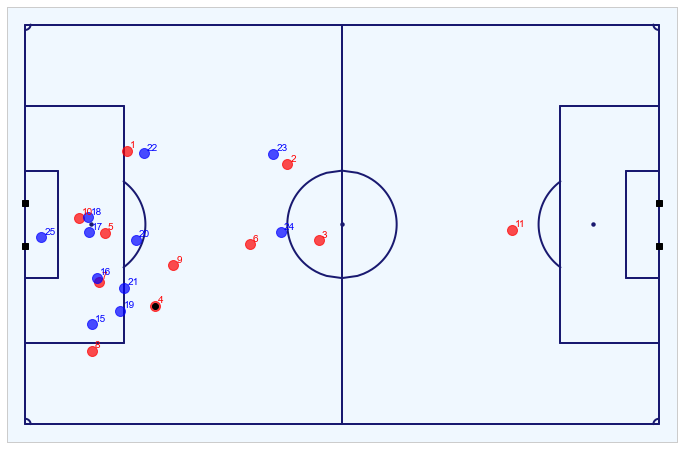

In [133]:
# Visualise the shot and the positions of the players

## Define index of Event data and frame of Tracking data
index = 472    # frame 29,754
frame = df_events.loc[index]['Start Frame']

## Visualise player positions using plot_events function from mviz library
fig, ax = mviz.plot_frame(df_tracking_home.loc[frame], df_tracking_away.loc[frame], annotate=True)

##### Check the 3rd shot (frame: 16,484, index: 252)

In [134]:
# Look at shot 3 of Home Tracking data - frame == 16,484
df_tracking_home[df_tracking_home.index==16_484]

,Period,Time [s],Home_11_x,Home_11_y,Home_1_x,Home_1_y,Home_2_x,Home_2_y,Home_3_x,Home_3_y,Home_4_x,Home_4_y,Home_5_x,Home_5_y,Home_6_x,Home_6_y,Home_7_x,Home_7_y,Home_8_x,Home_8_y,Home_9_x,Home_9_y,Home_10_x,Home_10_y,Home_12_x,Home_12_y,Home_13_x,Home_13_y,Home_14_x,Home_14_y,ball_x,ball_y,Home_1_vx,Home_1_vy,Home_1_speed,Home_10_vx,Home_10_vy,Home_10_speed,Home_11_vx,Home_11_vy,Home_11_speed,Home_12_vx,Home_12_vy,Home_12_speed,Home_13_vx,Home_13_vy,Home_13_speed,Home_14_vx,Home_14_vy,Home_14_speed,Home_2_vx,Home_2_vy,Home_2_speed,Home_3_vx,Home_3_vy,Home_3_speed,Home_4_vx,Home_4_vy,Home_4_speed,Home_5_vx,Home_5_vy,Home_5_speed,Home_6_vx,Home_6_vy,Home_6_speed,Home_7_vx,Home_7_vy,Home_7_speed,Home_8_vx,Home_8_vy,Home_8_speed,Home_9_vx,Home_9_vy,Home_9_speed,Home_1_isInterference,Home_10_isInterference,Home_11_isInterference,Home_12_isInterference,Home_13_isInterference,Home_14_isInterference,Home_2_isInterference,Home_3_isInterference,Home_4_isInterference,Home_5_isInterference,Home_6_isInterference,Home_7_isInterference,Home_8_isInterference,Home_9_isInterference,Home_Total_Interference,Home_1_isIntervening,Home_10_isIntervening,Home_11_isIntervening,Home_12_isIntervening,Home_13_isIntervening,Home_14_isIntervening,Home_2_isIntervening,Home_3_isIntervening,Home_4_isIntervening,Home_5_isIntervening,Home_6_isIntervening,Home_7_isIntervening,Home_8_isIntervening,Home_9_isIntervening,Home_Total_Intervening
Frame,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
16484,1,659.36,36.33256,1.394,5.86604,18.05876,5.06468,6.28252,13.13022,-4.8824,13.88494,-11.56884,-28.64968,14.37996,-1.71932,4.93272,1.98008,-0.06936,-4.2135,-10.32036,-37.46358,-0.81668,-41.56366,11.27712,NaN,NaN,NaN,NaN,NaN,NaN,-41.50854,11.29684,-3.71,0.136,3.712492,-1.4045,-0.51,1.494229,-1.272,-0.017,1.272114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.1995,0.085,2.201142,-3.233,-0.51,3.272979,-3.074,-0.748,3.163697,-5.6445,-1.768,5.914914,-3.127,0.0,3.127,-5.5385,0.289,5.546035,-4.4255,-0.085,4.426316,-5.1675,2.499,5.74004,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [135]:
# Look at shot 3 of Away Tracking data - frame == 16,484
df_tracking_away[df_tracking_away.index==16_484]

,Period,Time [s],Away_25_x,Away_25_y,Away_15_x,Away_15_y,Away_16_x,Away_16_y,Away_17_x,Away_17_y,Away_18_x,Away_18_y,Away_19_x,Away_19_y,Away_20_x,Away_20_y,Away_21_x,Away_21_y,Away_22_x,Away_22_y,Away_23_x,Away_23_y,Away_24_x,Away_24_y,Away_26_x,Away_26_y,ball_x,ball_y,Away_15_vx,Away_15_vy,Away_15_speed,Away_16_vx,Away_16_vy,Away_16_speed,Away_17_vx,Away_17_vy,Away_17_speed,Away_18_vx,Away_18_vy,Away_18_speed,Away_19_vx,Away_19_vy,Away_19_speed,Away_20_vx,Away_20_vy,Away_20_speed,Away_21_vx,Away_21_vy,Away_21_speed,Away_22_vx,Away_22_vy,Away_22_speed,Away_23_vx,Away_23_vy,Away_23_speed,Away_24_vx,Away_24_vy,Away_24_speed,Away_25_vx,Away_25_vy,Away_25_speed,Away_26_vx,Away_26_vy,Away_26_speed,Away_15_isInterference,Away_16_isInterference,Away_17_isInterference,Away_18_isInterference,Away_19_isInterference,Away_20_isInterference,Away_21_isInterference,Away_22_isInterference,Away_23_isInterference,Away_24_isInterference,Away_25_isInterference,Away_26_isInterference,Away_Total_Interference,Away_15_isIntervening,Away_16_isIntervening,Away_17_isIntervening,Away_18_isIntervening,Away_19_isIntervening,Away_20_isIntervening,Away_21_isIntervening,Away_22_isIntervening,Away_23_isIntervening,Away_24_isIntervening,Away_25_isIntervening,Away_26_isIntervening,Away_Total_Intervening
Frame,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
16484,1,659.36,-49.31862,2.4174,-39.9885,-1.71428,-43.0784,3.12188,-42.84308,9.7648,-20.60852,16.11464,3.5033,-7.42084,-34.9747,5.43456,-21.5604,-1.42528,11.6653,21.0052,15.5767,3.4884,13.6104,12.87172,NaN,NaN,-41.50854,11.29684,-4.4785,1.717,4.796358,-2.491,1.649,2.987354,-1.537,-1.904,2.446954,-6.254,-1.428,6.414959,-4.5315,-0.476,4.556432,-4.77,0.527,4.799024,-4.876,0.17,4.878963,-2.809,1.003,2.982698,-2.703,-0.272,2.716651,-2.8885,0.051,2.88895,0.7155,-1.751,1.891545,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0,1,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0


/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:145: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:145: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:153: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot( hometeam['ball_x'], hometeam['ball_y'], 'ko', MarkerSize=6, al

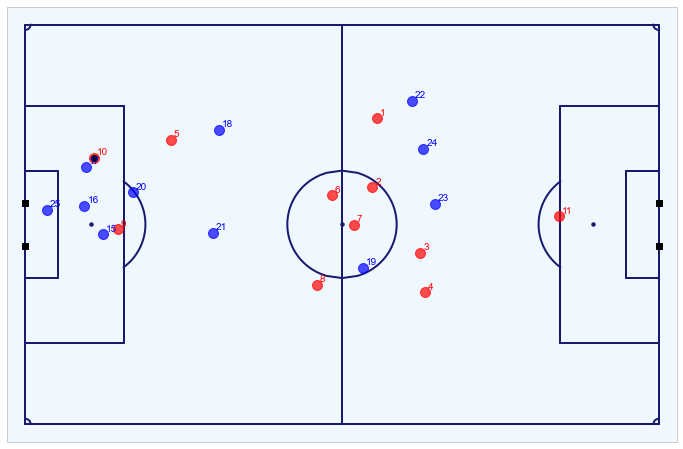

In [136]:
# Visualise the shot and the positions of the players

## Define index of Event data and frame of Tracking data
index = 252    # frame 16,484
frame = df_events.loc[index]['Start Frame']

## Visualise player positions using plot_events function from mviz library
fig, ax = mviz.plot_frame(df_tracking_home.loc[frame], df_tracking_away.loc[frame], annotate=True)

#### <a id='#section4.2.6'>4.2.6. Find playing direction

In [137]:
# Find playing direction
home_attack_direction = mio.find_playing_direction (df_tracking_home, 'Home')

---

## <a id='#section5'>5. Subset DataFrames</a>

### <a id='#section5.1'>5.1. Event Data

#### <a id='#section5.1.1'>5.1.1. Separate Home and Away Events DataFrames</a>

In [138]:
# Create separate Events DataFrames for each team
df_home_events = df_events[df_events['Team'] == 'Home']
df_away_events = df_events[df_events['Team'] == 'Away']

#### <a id='#section5.1.2'>5.1.2. Create Shots DataFrames</a>

In [139]:
# Create Shots DataFrames

## Create an (all) Shots DataFrame
df_shots = df_events[df_events['Type'] == 'SHOT']

## Create a Home Shots DataFrame
df_home_shots = df_home_events[df_home_events['Type'] == 'SHOT']

## Create a Home Shots DataFrame
df_away_shots = df_away_events[df_away_events['Type'] == 'SHOT']

In [140]:
# View Home Shots
df_shots

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
83,Home,SHOT,OFF TARGET-OUT,1,4419,176.76,4443,177.72,Player5,NaN,-39.22,18.36,-55.12,2.72
198,Home,SHOT,ON TARGET-GOAL,1,12202,488.08,12212,488.48,Player10,NaN,-47.70,-3.40,-54.06,-2.04
252,Home,SHOT,ON TARGET-SAVED,1,16484,659.36,16499,659.96,Player10,NaN,-41.34,11.56,-48.76,0.68
297,Away,SHOT,BLOCKED,1,18515,740.60,18520,740.80,Player22,NaN,31.80,10.20,38.16,11.56
431,Home,SHOT,HEAD-OFF TARGET-OUT,1,27345,1093.80,27360,1094.40,Player3,NaN,-43.46,-6.12,-54.06,-6.12
472,Home,SHOT,ON TARGET-SAVED,1,29754,1190.16,29777,1191.08,Player4,NaN,-31.80,-13.60,-53.00,-2.72
823,Away,SHOT,ON TARGET-GOAL,1,53049,2121.96,53075,2123.00,Player24,NaN,44.52,2.72,54.06,1.36
852,Home,SHOT,HEAD-OFF TARGET-OUT,1,56079,2243.16,56131,2245.24,Player5,NaN,-42.40,6.12,-55.12,-17.68
962,Away,SHOT,OFF TARGET-HEAD-OUT,1,63362,2534.48,63372,2534.88,Player23,NaN,45.58,0.68,54.06,-6.80
980,Away,SHOT,ON TARGET-SAVED,1,64772,2590.88,64799,2591.96,Player20,NaN,28.62,-3.40,51.94,-2.04


In [141]:
# View Home Shots
df_home_shots

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
83,Home,SHOT,OFF TARGET-OUT,1,4419,176.76,4443,177.72,Player5,NaN,-39.22,18.36,-55.12,2.72
198,Home,SHOT,ON TARGET-GOAL,1,12202,488.08,12212,488.48,Player10,NaN,-47.70,-3.40,-54.06,-2.04
252,Home,SHOT,ON TARGET-SAVED,1,16484,659.36,16499,659.96,Player10,NaN,-41.34,11.56,-48.76,0.68
431,Home,SHOT,HEAD-OFF TARGET-OUT,1,27345,1093.80,27360,1094.40,Player3,NaN,-43.46,-6.12,-54.06,-6.12
472,Home,SHOT,ON TARGET-SAVED,1,29754,1190.16,29777,1191.08,Player4,NaN,-31.80,-13.60,-53.00,-2.72
852,Home,SHOT,HEAD-OFF TARGET-OUT,1,56079,2243.16,56131,2245.24,Player5,NaN,-42.40,6.12,-55.12,-17.68
1026,Home,SHOT,OFF TARGET-OUT,1,67067,2682.68,67107,2684.28,Player7,NaN,-39.22,-18.36,-55.12,6.12
1118,Home,SHOT,HEAD-ON TARGET-GOAL,2,73983,2959.32,73995,2959.80,Player9,NaN,-47.70,1.36,-54.06,2.04
1479,Home,SHOT,ON TARGET-SAVED,2,98880,3955.20,98896,3955.84,Player10,NaN,-48.76,-4.08,-51.94,-3.40
1681,Home,SHOT,HEAD-OFF TARGET-OUT,2,117218,4688.72,117245,4689.80,Player9,NaN,-41.34,7.48,-54.06,-5.44


In [142]:
# View Away Shots
df_away_shots

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
297,Away,SHOT,BLOCKED,1,18515,740.60,18520,740.80,Player22,NaN,31.80,10.20,38.16,11.56
823,Away,SHOT,ON TARGET-GOAL,1,53049,2121.96,53075,2123.00,Player24,NaN,44.52,2.72,54.06,1.36
962,Away,SHOT,OFF TARGET-HEAD-OUT,1,63362,2534.48,63372,2534.88,Player23,NaN,45.58,0.68,54.06,-6.80
980,Away,SHOT,ON TARGET-SAVED,1,64772,2590.88,64799,2591.96,Player20,NaN,28.62,-3.40,51.94,-2.04
1058,Away,SHOT,OFF TARGET-OUT,2,69887,2795.48,69927,2797.08,Player21,NaN,30.74,10.88,56.18,-8.16
1277,Away,SHOT,OFF TARGET-OUT,2,86191,3447.64,86219,3448.76,Player19,NaN,32.86,2.72,55.12,6.12
1335,Away,SHOT,ON TARGET-SAVED,2,90165,3606.60,90176,3607.04,Player19,NaN,46.64,-11.56,51.94,-2.72
1666,Away,SHOT,BLOCKED,2,111758,4470.32,111763,4470.52,Player24,NaN,43.46,-7.48,46.64,-3.40
1671,Away,SHOT,ON TARGET-GOAL,2,115009,4600.36,115024,4600.96,Player20,NaN,40.28,1.36,55.12,2.72
1843,Away,SHOT,OFF TARGET-OUT,2,132570,5302.80,132597,5303.88,Player18,NaN,33.92,-8.16,57.24,-2.04


##### View shot types

In [143]:
# Frequency of Events for Home Shots DataFrame
df_home_shots['Subtype'].value_counts()

HEAD-OFF TARGET-OUT    4
ON TARGET-SAVED        4
ON TARGET-GOAL         2
OFF TARGET-OUT         2
HEAD-ON TARGET-GOAL    1
Name: Subtype, dtype: int64

In [144]:
# Frequency of Events for Away Shots DataFrame
df_away_shots['Subtype'].value_counts()

OFF TARGET-OUT         3
BLOCKED                2
ON TARGET-GOAL         2
ON TARGET-SAVED        2
OFF TARGET-HEAD-OUT    1
HEAD-OFF TARGET-OUT    1
Name: Subtype, dtype: int64

##### View who took the shots

In [145]:
# Which player took Home Shots?
df_home_shots['From'].value_counts()

Player9     4
Player10    3
Player5     2
Player3     1
Player4     1
Player7     1
Player12    1
Name: From, dtype: int64

In [146]:
# Which player took Away Shots?
df_away_shots['From'].value_counts()

Player20     2
Player24     2
Player19     2
Player23     1
Player22     1
Player18     1
Player21     1
Player 26    1
Name: From, dtype: int64

#### <a id='#section5.1.3'>5.1.3. Create Goals DataFrames</a>

In [147]:
# Get goals

## Filter Events DataFrame for Shots that are Goals
df_goals = df_events[(df_events['Type'] == "SHOT") & (df_shots['Subtype'].str.contains('-GOAL'))]

## Display DataFrame
df_goals.head(5)    # five goals

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
198,Home,SHOT,ON TARGET-GOAL,1,12202,488.08,12212,488.48,Player10,NaN,-47.70,-3.40,-54.06,-2.04
823,Away,SHOT,ON TARGET-GOAL,1,53049,2121.96,53075,2123.00,Player24,NaN,44.52,2.72,54.06,1.36
1118,Home,SHOT,HEAD-ON TARGET-GOAL,2,73983,2959.32,73995,2959.80,Player9,NaN,-47.70,1.36,-54.06,2.04
1671,Away,SHOT,ON TARGET-GOAL,2,115009,4600.36,115024,4600.96,Player20,NaN,40.28,1.36,55.12,2.72
1723,Home,SHOT,ON TARGET-GOAL,2,121027,4841.08,121055,4842.20,Player12,NaN,-30.74,5.44,-54.06,2.72


In [148]:
# Get goals
df_home_goals = df_home_shots[df_home_shots['Subtype'].str.contains('-GOAL')].copy()
df_away_goals = df_away_shots[df_away_shots['Subtype'].str.contains('-GOAL')].copy()

From the goals DataFrame, we can see that there were five goals in the game, with the home team (red) winning 3-2 against the away team (blue).

From the DataFrames, We can see the goals were scored in the following indexes:
*    Goal 1: 198
*    Goal 2: 823
*    Goal 3: 1,118
*    Goal 4: 1,671
*    Goal 5: 1,723

##### Export CSV

In [149]:
# Export CSV
df_shots.to_csv(os.path.join(data_dir_metrica, 'raw', 'game_2_shots.csv'), index=None, header=True)

### <a id='#section5.2'>5.2. Tracking Data</a>

In [150]:
# Convert list of frames of shots in the Events data into a list
lst_shot_frames = df_shots['Start Frame'].unique().tolist()

In [151]:
# Filter Home Tracking dataset for only the frames where shots taken place, using the list of frames derived from Event data
df_tracking_home_shots = df_tracking_home.reset_index()
df_tracking_home_shots = df_tracking_home_shots[df_tracking_home_shots['Frame'].isin(lst_shot_frames)]
df_tracking_home_shots

,Frame,Period,Time [s],Home_11_x,Home_11_y,Home_1_x,Home_1_y,Home_2_x,Home_2_y,Home_3_x,Home_3_y,Home_4_x,Home_4_y,Home_5_x,Home_5_y,Home_6_x,Home_6_y,Home_7_x,Home_7_y,Home_8_x,Home_8_y,Home_9_x,Home_9_y,Home_10_x,Home_10_y,Home_12_x,Home_12_y,Home_13_x,Home_13_y,Home_14_x,Home_14_y,ball_x,ball_y,Home_1_vx,Home_1_vy,Home_1_speed,Home_10_vx,Home_10_vy,Home_10_speed,Home_11_vx,Home_11_vy,Home_11_speed,Home_12_vx,Home_12_vy,Home_12_speed,Home_13_vx,Home_13_vy,Home_13_speed,Home_14_vx,Home_14_vy,Home_14_speed,Home_2_vx,Home_2_vy,Home_2_speed,Home_3_vx,Home_3_vy,Home_3_speed,Home_4_vx,Home_4_vy,Home_4_speed,Home_5_vx,Home_5_vy,Home_5_speed,Home_6_vx,Home_6_vy,Home_6_speed,Home_7_vx,Home_7_vy,Home_7_speed,Home_8_vx,Home_8_vy,Home_8_speed,Home_9_vx,Home_9_vy,Home_9_speed,Home_1_isInterference,Home_10_isInterference,Home_11_isInterference,Home_12_isInterference,Home_13_isInterference,Home_14_isInterference,Home_2_isInterference,Home_3_isInterference,Home_4_isInterference,Home_5_isInterference,Home_6_isInterference,Home_7_isInterference,Home_8_isInterference,Home_9_isInterference,Home_Total_Interference,Home_1_isIntervening,Home_10_isIntervening,Home_11_isIntervening,Home_12_isIntervening,Home_13_isIntervening,Home_14_isIntervening,Home_2_isIntervening,Home_3_isIntervening,Home_4_isIntervening,Home_5_isIntervening,Home_6_isIntervening,Home_7_isIntervening,Home_8_isIntervening,Home_9_isIntervening,Home_Total_Intervening
4418,4419,1,176.76,25.82372,2.67172,-41.75022,27.56244,-16.77450,16.06296,-10.19508,0.83368,-26.57950,-6.87684,-39.23908,18.51368,-27.41054,5.01296,-43.39958,0.07072,-39.68534,-2.44664,-48.47380,18.33416,-46.99298,1.50076,NaN,NaN,NaN,NaN,NaN,NaN,-39.51044,18.49328,-0.1060,-0.544,0.554231,-1.0600,0.935,1.413444,-0.5300,-0.255,0.588154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.6625,0.119,0.673103,-0.0265,-0.119,0.121915,-1.8550,-0.374,1.892327,-2.8620,-3.196,4.290159,-2.4910,0.323,2.511854,-1.4575,0.680,1.608324,1.3780,2.550,2.898514,0.1590,-0.051,0.166979,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,2
12201,12202,1,488.08,26.00074,1.79656,-39.84964,17.00476,-18.69310,15.89636,-6.75856,-0.68068,-27.59498,-9.93956,-45.86302,6.86664,-19.97146,3.85084,-45.87256,6.92580,-44.20518,-1.83396,-38.50768,-19.24400,-47.42652,-3.68492,NaN,NaN,NaN,NaN,NaN,NaN,-47.20710,-2.96140,1.8815,-2.397,3.047237,-5.4060,-5.457,7.681386,-0.6095,0.272,0.667439,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.8215,0.255,0.860167,0.0000,0.765,0.765000,-0.9540,1.190,1.525194,-1.9610,0.901,2.158083,-1.3250,0.442,1.396778,-1.7755,0.136,1.780701,-3.6040,2.193,4.218775,-0.7950,0.629,1.013739,0,1,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16483,16484,1,659.36,36.33256,1.39400,5.86604,18.05876,5.06468,6.28252,13.13022,-4.88240,13.88494,-11.56884,-28.64968,14.37996,-1.71932,4.93272,1.98008,-0.06936,-4.21350,-10.32036,-37.46358,-0.81668,-41.56366,11.27712,NaN,NaN,NaN,NaN,NaN,NaN,-41.50854,11.29684,-3.7100,0.136,3.712492,-1.4045,-0.510,1.494229,-1.2720,-0.017,1.272114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.1995,0.085,2.201142,-3.2330,-0.510,3.272979,-3.0740,-0.748,3.163697,-5.6445,-1.768,5.914914,-3.1270,0.000,3.127000,-5.5385,0.289,5.546035,-4.4255,-0.085,4.426316,-5.1675,2.499,5.740040,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18514,18515,1,740.60,49.22746,1.18524,36.84348,9.76480,37.70102,4.76816,39.11930,-4.62740,36.58378,-18.49940,30.15912,3.98548,30.05842,0.47532,27.48262,-8.66456,24.15422,-27.75352,18.44082,9.77500,7.97226,-7.08900,NaN,NaN,NaN,NaN,NaN,NaN,31.26258,10.23468,-0.2385,-0.238,0.336937,-0.1325,0.221,0.257677,1.0070,0.850,1.317782,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.9610,3.451,3.969247,2.0670,3.451,4.022672,0.4770,1.105,1.203559,3.6835,3.315,4.955542,1.8550,2.210,2.885329,0.9540,2.227,2.422735,0.3180,1.105,1.149847,1.4045,0.510,1.494229,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
27344,27345,1,1093.80,24.01112,1.47492,-36.95266,20.76992,-18.25744,8.77676,-43.98576,-6.17984,-2.45496,1.52524,-14.0

In [152]:
# Filter Away Tracking dataset for only the frames where shots taken place, using the list of frames derived from Event data
df_tracking_away_shots = df_tracking_away.reset_index()
df_tracking_away_shots = df_tracking_away_shots[df_tracking_away_shots['Frame'].isin(lst_shot_frames)]
df_tracking_away_shots

,Frame,Period,Time [s],Away_25_x,Away_25_y,Away_15_x,Away_15_y,Away_16_x,Away_16_y,Away_17_x,Away_17_y,Away_18_x,Away_18_y,Away_19_x,Away_19_y,Away_20_x,Away_20_y,Away_21_x,Away_21_y,Away_22_x,Away_22_y,Away_23_x,Away_23_y,Away_24_x,Away_24_y,Away_26_x,Away_26_y,ball_x,ball_y,Away_15_vx,Away_15_vy,Away_15_speed,Away_16_vx,Away_16_vy,Away_16_speed,Away_17_vx,Away_17_vy,Away_17_speed,Away_18_vx,Away_18_vy,Away_18_speed,Away_19_vx,Away_19_vy,Away_19_speed,Away_20_vx,Away_20_vy,Away_20_speed,Away_21_vx,Away_21_vy,Away_21_speed,Away_22_vx,Away_22_vy,Away_22_speed,Away_23_vx,Away_23_vy,Away_23_speed,Away_24_vx,Away_24_vy,Away_24_speed,Away_25_vx,Away_25_vy,Away_25_speed,Away_26_vx,Away_26_vy,Away_26_speed,Away_15_isInterference,Away_16_isInterference,Away_17_isInterference,Away_18_isInterference,Away_19_isInterference,Away_20_isInterference,Away_21_isInterference,Away_22_isInterference,Away_23_isInterference,Away_24_isInterference,Away_25_isInterference,Away_26_isInterference,Away_Total_Interference,Away_15_isIntervening,Away_16_isIntervening,Away_17_isIntervening,Away_18_isIntervening,Away_19_isIntervening,Away_20_isIntervening,Away_21_isIntervening,Away_22_isIntervening,Away_23_isIntervening,Away_24_isIntervening,Away_25_isIntervening,Away_26_isIntervening,Away_Total_Intervening
4418,4419,1,176.76,-51.90502,2.78392,-47.03750,-3.41496,-47.76784,1.21312,-48.23954,8.22324,-46.93574,17.57936,-42.75934,-1.14376,-44.26136,11.56748,-43.21408,3.80664,-36.98658,17.55692,-19.87818,14.64788,-24.55596,-4.11128,NaN,NaN,-39.51044,18.49328,-0.1060,-0.867,0.873456,-0.7950,1.003,1.279857,0.7685,0.068,0.771503,-0.5035,-3.604,3.639001,-0.0795,0.221,0.234864,-0.5300,-0.391,0.658621,-0.0530,0.000,0.053000,-2.2260,-0.374,2.257200,-0.7155,-0.187,0.739533,-0.7685,0.374,0.854674,-0.4770,0.408,0.627689,NaN,NaN,NaN,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
12201,12202,1,488.08,-50.94042,0.27132,-45.62346,-5.27884,-47.17106,-3.63528,-47.32158,5.49848,-43.35612,15.26736,-41.09196,-4.29352,-41.52232,7.39772,-39.66520,0.60792,-36.06226,9.88108,-18.97824,15.90248,-28.19176,-8.81756,NaN,NaN,-47.20710,-2.96140,-0.7685,0.051,0.770190,-2.3055,0.612,2.385346,-1.8020,1.207,2.168883,-1.3515,-1.326,1.893364,-1.5635,-0.646,1.691700,-0.3180,-0.238,0.397200,-0.0795,0.221,0.234864,-0.5035,0.000,0.503500,0.0530,0.136,0.145962,-0.0530,0.051,0.073553,-0.4240,-1.275,1.343652,NaN,NaN,NaN,1,1,0,0,0,0,0,0,0,0,1,0,3,0,0,0,0,0,0,1,0,0,0,0,0,1
16483,16484,1,659.36,-49.31862,2.41740,-39.98850,-1.71428,-43.07840,3.12188,-42.84308,9.76480,-20.60852,16.11464,3.50330,-7.42084,-34.97470,5.43456,-21.56040,-1.42528,11.66530,21.00520,15.57670,3.48840,13.61040,12.87172,NaN,NaN,-41.50854,11.29684,-4.4785,1.717,4.796358,-2.4910,1.649,2.987354,-1.5370,-1.904,2.446954,-6.2540,-1.428,6.414959,-4.5315,-0.476,4.556432,-4.7700,0.527,4.799024,-4.8760,0.170,4.878963,-2.8090,1.003,2.982698,-2.7030,-0.272,2.716651,-2.8885,0.051,2.888950,0.7155,-1.751,1.891545,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0,1,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0
18514,18515,1,740.60,-29.52312,0.15572,12.18364,-22.90920,2.72950,-8.40480,4.56648,-2.31404,15.86608,15.01372,31.52652,-16.84768,32.96494,1.04516,14.61952,-4.16024,31.40992,10.26460,40.82272,-1.58644,38.07096,7.72276,NaN,NaN,31.26258,10.23468,-0.2120,1.394,1.410028,-0.0265,0.986,0.986356,0.2385,0.714,0.752780,4.5845,2.074,5.031810,0.9540,1.224,1.551867,1.4840,1.139,1.870716,0.3445,1.122,1.173697,3.7895,0.765,3.865946,-1.4310,0.136,1.437448,2.0405,4.114,4.592237,-0.0265,0.340,0.341031,NaN,NaN,NaN,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
27344,27345,1,1093.80,-49.62390,-1.68776,-31.41946,17.64668,-44.23274,-4.99664,-45.91708,-0.65416,-41.29230,9.86408,-39.91006,0.47192,-36.54880,15.38568,-41.63680,2.78800,-27.96492,0.95200,-33.89668,4.03648,-43.21832,-8.73664,NaN,NaN,-43.82464,-5.82896,0.3975,-1.836,1.878537,-2.2790,-2.771,3.587796,-2.1200,-1.037,2.360036,-1.9080,-0.867,2.095746,0.1325,0.170,0.215537,0.3975,-0.629,0.744075,-0.7155,-1.207,1.403136,0.5035,-0.833,0.973345

In [153]:
# Select columns of interest
cols = ['Frame', 'Period', 'Time [s]', 'Home_Total_Interference', 'Home_Total_Intervening']
df_tracking_home_shots_select = df_tracking_home_shots[cols]
df_tracking_home_shots_select

,Frame,Period,Time [s],Home_Total_Interference,Home_Total_Intervening
4418,4419,1,176.76,1,2
12201,12202,1,488.08,2,0
16483,16484,1,659.36,1,0
18514,18515,1,740.60,1,1
27344,27345,1,1093.80,4,1
29753,29754,1,1190.16,1,0
53048,53049,1,2121.96,2,0
56078,56079,1,2243.16,2,0
63361,63362,1,2534.48,4,1
64771,64772,1,2590.88,1,1


In [154]:
# Select columns of interest
cols = ['Frame', 'Period', 'Time [s]', 'Away_Total_Interference', 'Away_Total_Intervening']
df_tracking_away_shots_select = df_tracking_away_shots[cols]
df_tracking_away_shots_select

,Frame,Period,Time [s],Away_Total_Interference,Away_Total_Intervening
4418,4419,1,176.76,1,1
12201,12202,1,488.08,3,1
16483,16484,1,659.36,3,0
18514,18515,1,740.60,1,0
27344,27345,1,1093.80,4,1
29753,29754,1,1190.16,1,1
53048,53049,1,2121.96,1,0
56078,56079,1,2243.16,3,1
63361,63362,1,2534.48,1,0
64771,64772,1,2590.88,1,1


---

## <a id='#section6'>6. Exploratory Data Analysis</a>

### <a id='#section6.1'>6.1. Still and Video Visualisations of Each Goal</a>
Each shot studied to create manual dataset of shots to record:
*    `Number_Intervening_Opponents` - The number of opposing players that were obscuring the goal at the instant of the shot (from the perspective of the shot-taker)
*    `Number_Intervening_Teammates` - The number of teammates that are obscuring the goal at the instant of the shot (from the perspective of the shot-taker) 
*    `Interference_on_Shooter` - The degree of direct interference exerted on the shot-taker from defenders (Low - no or minimal interference, Medium - a single defender was in close proximity to the shot-taker; High - multiple defenders in close proximity and interfering with the shot).

This features are manually recorded and added to the exported Shots DataFrame, for use with the Chance Quality Model created from the shots DataFrame.

In total there are 24 shots, with the following `start_frames` (and index):
*    4,419 (83)
*    12,202 (198) - home goal
*    16,484 (252)
*    18,515 (297)
*    27,345 (431)
*    29,754 (472)
*    53,049 (823) - away goal
*    56,079 (852)
*    63,362 (962)
*    64,772 (980)
*    67,067 (1,026)
*    69,887 (1,058)
*    73,983 (1,118) - home goal
*    86,191 (1,277)
*    90,165 (1,335)
*    98,880 (1,479)
*    111,758 (1,666)
*    115,009 (1,671) - away goal (pen)
*    117,218 (1,681)
*    121,027 (1,723) - home goal
*    124,336 (1,756)
*    132,570 (1,843)
*    136,060 (1,903)
*    139,891 (1,927)

#### <a id='#section6.1.1'>6.1.1. 4,419 (83)</a>

##### DataFrame Slice

In [155]:
# Slice DataFrame for shot of interest

## Define index of Event data and frame of Tracking data
index = 83
frame = df_events.loc[index]['Start Frame']

## Subset DataFrame
df_shots[df_shots['Start Frame']==frame]

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
83,Home,SHOT,OFF TARGET-OUT,1,4419,176.76,4443,177.72,Player5,NaN,-39.22,18.36,-55.12,2.72


##### Event Data Visualisation

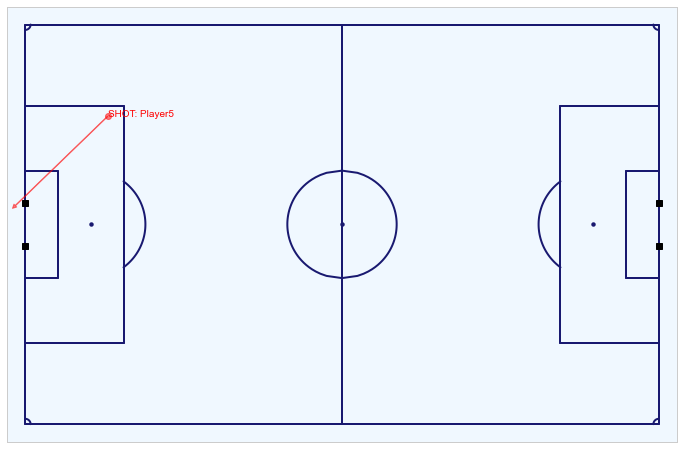

In [156]:
# Visualise the shot

## Define index of Event data and frame of Tracking data
index = 83
frame = df_events.loc[index]['Start Frame']

## Visualise shots position using plot_events function from mviz library
fix, ax = mviz.plot_events(df_events.loc[index:index], indicators = ['Marker', 'Arrow'], annotate=True)

## Save figure
if not os.path.exists(fig_dir_metrica + '/shot_positions_goal_4419_83.png'):
    plt.savefig(fig_dir_metrica + '/shot_positions_goal_4419_83.png', dpi=300, format='png', transparent=False, bbox_inches='tight')
else:
    pass

/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:145: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:145: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:153: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot( hometeam['ball_x'], hometeam['ball_y'], 'ko', MarkerSize=6, al

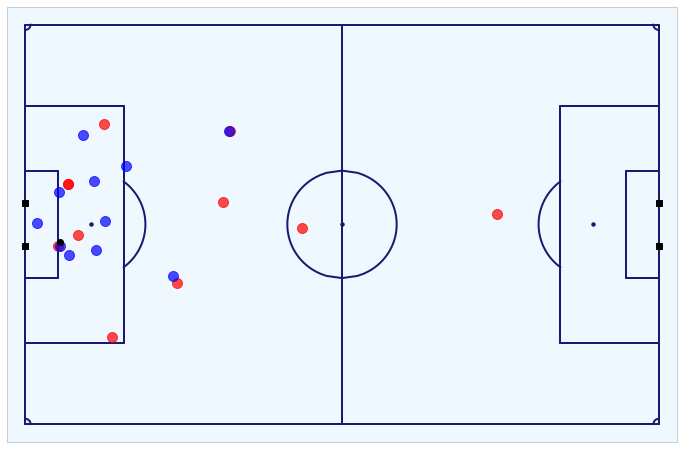

In [157]:
# Visualise the positions of the players at the moment the shot was taken

## Define index of Event data and frame of Tracking data
index = 198
frame = df_events.loc[index]['Start Frame']

## Visualise player positions using plot_events function from mviz library
fig, ax = mviz.plot_frame(df_tracking_home.loc[frame], df_tracking_away.loc[frame])

## Save figure
if not os.path.exists(fig_dir_metrica + '/player_positions_goal_4419_83.png'):
    plt.savefig(fig_dir_metrica + '/player_positions_goal_4419_83.png', dpi=300, format='png', transparent=False, bbox_inches='tight')
else:
    pass

/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:145: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:145: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:153: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot( hometeam['ball_x'], hometeam['ball_y'], 'ko', MarkerSize=6, al

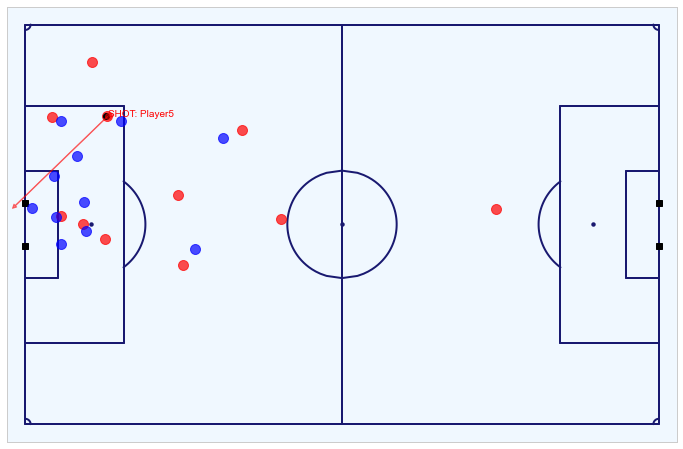

In [158]:
# Visualise the shot and the positions of the players

## Define index of Event data and frame of Tracking data
index = 83
frame = df_events.loc[index]['Start Frame']

## Visualise shots position using plot_events function from mviz library
fix, ax = mviz.plot_frame(df_tracking_home.loc[frame], df_tracking_away.loc[frame])
fix, ax = mviz.plot_events(df_events.loc[index:index], figax=(fig,ax), indicators = ['Marker', 'Arrow'], annotate=True)
#fig.suptitle('Player and Shot Positions', y=0.92)

## Save figure
if not os.path.exists(fig_dir_metrica + '/player_shot_positions_shot_4419_83.png'):
    plt.savefig(fig_dir_metrica + '/player_shot_positions_shot_4419_83.png', dpi=300, format='png', transparent=False, bbox_inches='tight')
else:
    pass

For future iterations of analysed goal, the shot and the positions of the players will just be produced in one visualisation.

##### Visualising the passes before the shot

In [159]:
# Slice DataFrame for shot of interest

## Define index of the shot in the Event data
index_shot = 83

## Subset DataFrame
df_events.loc[index_shot-20:index_shot]

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
63,Away,BALL LOST,NaN,1,3131,125.24,3217,128.68,Player18,NaN,-33.92,31.28,5.30,12.92
64,Home,RECOVERY,NaN,1,3215,128.60,3215,128.60,Player3,NaN,4.24,12.24,NaN,NaN
65,Home,PASS,NaN,1,3248,129.92,3311,132.44,Player3,Player11,8.48,15.64,38.16,3.40
66,Home,PASS,NaN,1,3344,133.76,3392,135.68,Player11,Player2,38.16,3.40,23.32,25.84
67,Home,PASS,NaN,1,3427,137.08,3455,138.20,Player2,Player5,20.14,25.84,9.54,24.48
68,Home,PASS,NaN,1,3509,140.36,3526,141.04,Player5,Player9,7.42,25.16,-7.42,25.16
69,Home,PASS,NaN,1,3603,144.12,3641,145.64,Player9,Player6,-13.78,27.88,-8.48,14.96
70,Home,PASS,NaN,1,3661,146.44,3675,147.00,Player6,Player9,-10.60,15.64,-10.60,21.08
71,Home,PASS,NaN,1,3675,147.00,3718,148.72,Player9,Player4,-10.60,21.08,-1.06,-4.08
72,Home,PASS,NaN,1,3749,149.96,3797,151.88,Player4,Player8,-3.18,-6.12,-21.20,-30.60


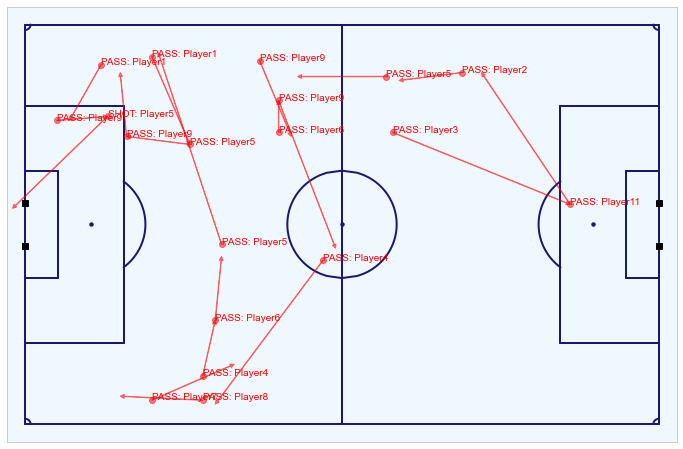

In [160]:
# Visualise the shot

## Define index of Event data and frame of Tracking data
index_first_pass = 65
index_goal = 83
frame = df_events.loc[index]['Start Frame']

## Visualise all the passes leading up to the shot using 'plot_events' function from mviz library
fix, ax = mviz.plot_events(df_events.loc[index_first_pass:index_goal], indicators = ['Marker', 'Arrow'], annotate=True)

## Save figure
if not os.path.exists(fig_dir_metrica + '/shot_positions_goal_4419_83.png'):
    plt.savefig(fig_dir_metrica + '/shot_positions_goal_4419_83.png', dpi=300, format='png', transparent=False, bbox_inches='tight')
else:
    pass

We can see from the data that the Home team win the ball back and then put together a passing move 19 passes before taking the shot which gos wide.

##### Tracking Data Visualisation

In [161]:
# Create MP4 video

## Define frames for the start and end of the shot
index_first_pass = 65
index_shot = 83
frame_start= df_events.loc[index_first_pass]['Start Frame']
frame_end = df_events.loc[index_shot ]['Start Frame']+150

## Save visualisation
if not os.path.exists(video_dir_metrica + '/tracking_game_2_shot_1_of_24_4419_83.mp4'):
    mviz.save_match_clip(df_tracking_home.iloc[frame_start:frame_end], df_tracking_away.iloc[frame_start:frame_end], video_dir_metrica, fname = 'tracking_game_2_shot_1_of_24_4419_83', include_player_velocities=False)
else:
    pass

In [12]:
# Embed shot in the notebook. Shot @ 47 seconds
Video('../../../../../video/fig/metrica-sports/tracking_game_2_shot_1_of_24_4419_83.mp4', width=770, height=530)

ValueError: To embed videos, you must pass embed=True (this may make your notebook files huge)
Consider passing Video(url='...')

##### Plot Pitch Control

In [163]:
# First get model parameters
params = mpc.default_model_params(3)

In [164]:
# Find goalkeeper numbers using 'find_goalkeeper' function from mio library - required for 'generate_pitch_control_for_event' function from mpc library
GK_numbers = [mio.find_goalkeeper(df_tracking_home), mio.find_goalkeeper(df_tracking_away)]

In [165]:
GK_numbers

['11', '25']

In [ ]:
"""
# Visualise the shot

## Define index of Event data and frame of Tracking data
index_shot = 83
index_penultimate_pass = index_shot - 1
frame = df_events.loc[index_penultimate_pass]['Start Frame']

## Evaluated pitch control surface for the third pass using 'generate_pitch_control_for_event' function from mpc library
PPCF, xgrid, ygrid = mpc.generate_pitch_control_for_event(frame, df_events, df_tracking_home, df_tracking_away, params, GK_numbers, field_dimen=(106., 68.,), n_grid_cells_x=50)
fix, ax = mviz.plot_pitchcontrol_for_event(frame, df_events, df_tracking_home, df_tracking_away, PPCF, annotate=True)

## Save figure
if not os.path.exists(fig_dir_metrica + '/shot_positions_goal_4419_83.png'):
    plt.savefig(fig_dir_metrica + '/shot_positions_goal_4419_83.png', dpi=300, format='png', transparent=False, bbox_inches='tight')
else:
    pass
"""

##### Summary
*    `Number_Intervening_Opponents` - 3
*    `Number_Intervening_Teammates` - 0
*    `Interference_on_Shooter` - 1
*    `Subtype`: OFF TARGET-OUT
*    `isGoal`: False
*    `isPenalty`: False
*    `isDirectFK`: False

#### <a id='#section5.1.2'>5.1.2. 12,202 (198)</a>

##### DataFrame Slice

In [170]:
# Slice DataFrame for shot of interest

## Define index of Event data and frame of Tracking data
index = 198
frame = df_events.loc[index]['Start Frame']

## Subset DataFrame
df_shots[df_shots['Start Frame']==frame]

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
198,Home,SHOT,ON TARGET-GOAL,1,12202,488.08,12212,488.48,Player10,NaN,-47.7,-3.4,-54.06,-2.04


##### Event Data Visualisation

/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:145: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:145: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:153: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot( hometeam['ball_x'], hometeam['ball_y'], 'ko', MarkerSize=6, al

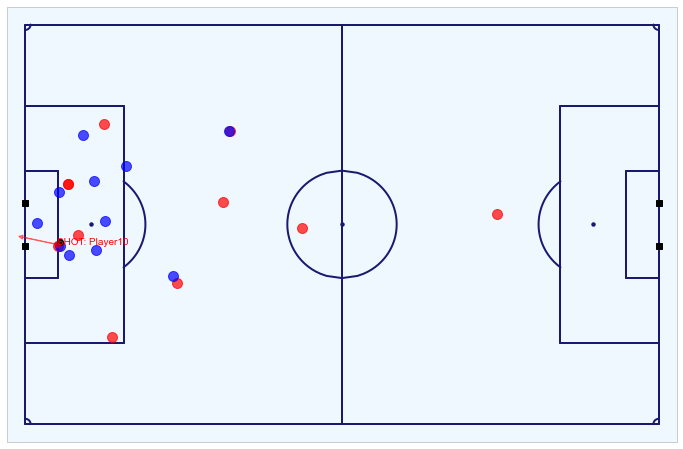

In [171]:
# Visualise the shot and the positions of the players

## Define index of Event data and frame of Tracking data
index = 198
frame = df_events.loc[index]['Start Frame']

## Visualise shots position using plot_events function from mviz library
fix, ax = mviz.plot_frame(df_tracking_home.loc[frame], df_tracking_away.loc[frame])
fix, ax = mviz.plot_events(df_events.loc[index:index], figax=(fig,ax), indicators = ['Marker', 'Arrow'], annotate=True)
#fig.suptitle('Player and Shot Positions', y=0.92)

## Save figure
if not os.path.exists(fig_dir_metrica + '/player_shot_positions_shot_12202_198.png'):
    plt.savefig(fig_dir_metrica + '/player_shot_positions_shot_12202_198.png', dpi=300, format='png', transparent=False, bbox_inches='tight')
else:
    pass

##### Tracking Data Visualisation

In [172]:
# Create MP4 video

## Define frames for the start and end of the shot
index = 198
frame_start= df_events.loc[index]['Start Frame']-150
frame_end = frame_start+300

## Save visualisation
if not os.path.exists(video_dir_metrica + '/tracking_shot_2202_198.mp4'):
    mviz.save_match_clip(df_tracking_home.iloc[frame_start:frame_end], df_tracking_away.iloc[frame_start:frame_end], video_dir_metrica, fname = 'tracking_shot_12202_198', include_player_velocities=False)
else:
    pass

Generating movie...

/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:203: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:203: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:211: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team['ball_x'], team['ball_y'], 'ko', 

/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:203: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:211: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team['ball_x'], team['ball_y'], 'ko', MarkerSize=6, alpha=1.0, LineWidth=0)
/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:203: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=

/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:203: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:203: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:211: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team['ball_x'], team['ball_y'], 'ko', 

/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:203: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:203: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:211: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team['ball_x'], team['ball_y'], 'ko', 

/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:203: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:203: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:211: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team['ball_x'], team['ball_y'], 'ko', 

/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:203: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:203: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:211: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team['ball_x'], team['ball_y'], 'ko', 

/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:203: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:203: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:211: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team['ball_x'], team['ball_y'], 'ko', 

/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:203: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:203: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:211: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team['ball_x'], team['ball_y'], 'ko', 

/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:203: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:203: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:211: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team['ball_x'], team['ball_y'], 'ko', 

/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:203: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:203: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:211: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team['ball_x'], team['ball_y'], 'ko', 

/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:203: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:203: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:211: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team['ball_x'], team['ball_y'], 'ko', 

/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:203: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:203: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:211: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team['ball_x'], team['ball_y'], 'ko', 

/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:203: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:203: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:211: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team['ball_x'], team['ball_y'], 'ko', 

/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:203: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:203: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:211: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team['ball_x'], team['ball_y'], 'ko', 

/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:203: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:203: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:211: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team['ball_x'], team['ball_y'], 'ko', 

/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:203: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:203: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:211: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team['ball_x'], team['ball_y'], 'ko', 

/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:203: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:203: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:211: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team['ball_x'], team['ball_y'], 'ko', 

/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:203: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:203: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:211: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team['ball_x'], team['ball_y'], 'ko', 

/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:203: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:203: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:211: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team['ball_x'], team['ball_y'], 'ko', 

/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:203: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:203: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:211: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team['ball_x'], team['ball_y'], 'ko', 

/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:203: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:211: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team['ball_x'], team['ball_y'], 'ko', MarkerSize=6, alpha=1.0, LineWidth=0)
/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:203: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=

/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:203: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:203: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:211: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team['ball_x'], team['ball_y'], 'ko', 

/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:203: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:203: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:211: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team['ball_x'], team['ball_y'], 'ko', 

/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:203: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:203: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:211: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team['ball_x'], team['ball_y'], 'ko', 

/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:203: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:203: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:211: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team['ball_x'], team['ball_y'], 'ko', 

/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:203: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:203: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:211: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team['ball_x'], team['ball_y'], 'ko', 

/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:203: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:203: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:211: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team['ball_x'], team['ball_y'], 'ko', 

done


/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:203: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:203: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:211: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team['ball_x'], team['ball_y'], 'ko', 

In [173]:
# Embed shot in the notebook
Video('../../video/fig/metrica-sports/tracking_shot_12202_198.mp4', width=770, height=530)

##### Summary
*    `Number_Intervening_Opponents` - 1
*    `Number_Intervening_Teammates` - 0
*    `Interference_on_Shooter` - High (2)
*    `Subtype`: ON TARGET-GOAL
*    `isGoal`: True
*    `isPenalty`: False
*    `isDirectFK`: False

#### <a id='#section5.1.3'>5.1.3. 16,484 (252)</a>

##### DataFrame Slice

In [174]:
# Slice DataFrame for shot of interest

## Define index of Event data and frame of Tracking data
index = 252
frame = df_events.loc[index]['Start Frame']

## Subset DataFrame
df_shots[df_shots['Start Frame']==frame]

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
252,Home,SHOT,ON TARGET-SAVED,1,16484,659.36,16499,659.96,Player10,NaN,-41.34,11.56,-48.76,0.68


##### Event Data Visualisation

/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:145: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:145: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:153: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot( hometeam['ball_x'], hometeam['ball_y'], 'ko', MarkerSize=6, al

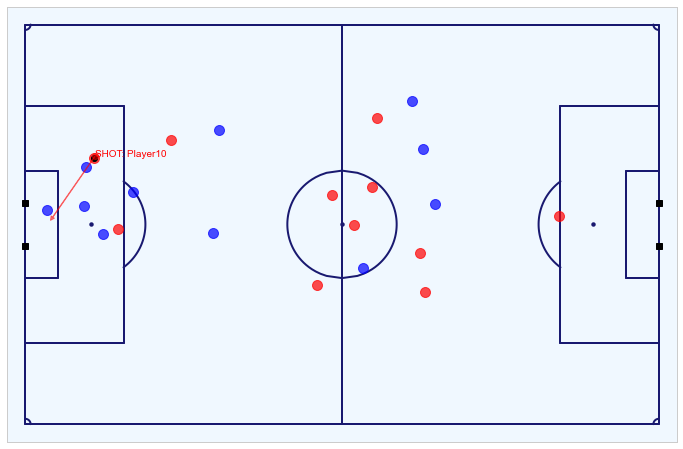

In [175]:
# Visualise the shot and the positions of the players

## Define index of Event data and frame of Tracking data
index = 252
frame = df_events.loc[index]['Start Frame']

## Visualise shots position using plot_events function from mviz library
fix, ax = mviz.plot_frame(df_tracking_home.loc[frame], df_tracking_away.loc[frame])
fix, ax = mviz.plot_events(df_events.loc[index:index], figax=(fig,ax), indicators = ['Marker', 'Arrow'], annotate=True)
#fig.suptitle('Player and Shot Positions', y=0.92)

## Save figure
if not os.path.exists(fig_dir_metrica + '/player_shot_positions_shot_16484_252.png'):
    plt.savefig(fig_dir_metrica + '/player_shot_positions_shot_16484_252.png', dpi=300, format='png', transparent=False, bbox_inches='tight')
else:
    pass

##### Tracking Data Visualisation

In [176]:
# Create MP4 video

## Define frames for the start and end of the shot
index = 252
frame_start= df_events.loc[index]['Start Frame']-150
frame_end = frame_start+300

## Save visualisation
if not os.path.exists(video_dir_metrica + '/tracking_shot_16484_252.mp4'):
    mviz.save_match_clip(df_tracking_home.iloc[frame_start:frame_end], df_tracking_away.iloc[frame_start:frame_end], video_dir_metrica, fname = 'tracking_shot_16484_252', include_player_velocities=False)
else:
    pass

In [177]:
# Embed shot in the notebook
Video('../../../../../video/fig/metrica-sports/tracking_shot_16484_252.mp4', width=770, height=530)

##### Summary
*    `Number_Intervening_Opponents` - 2
*    `Number_Intervening_Teammates` - 0
*    `Interference_on_Shooter` - 1
*    `Subtype`: ON TARGET-SAVED	
*    `isGoal`: False

#### <a id='#section5.1.4'>5.1.4. 18,515 (297)</a>

##### DataFrame Slice

In [178]:
# Slice DataFrame for shot of interest

## Define index of Event data and frame of Tracking data
index = 297
frame = df_events.loc[index]['Start Frame']

## Subset DataFrame
df_shots[df_shots['Start Frame']==frame]

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
297,Away,SHOT,BLOCKED,1,18515,740.6,18520,740.8,Player22,NaN,31.8,10.2,38.16,11.56


##### Event Data Visualisation

/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:145: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:145: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:153: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot( hometeam['ball_x'], hometeam['ball_y'], 'ko', MarkerSize=6, al

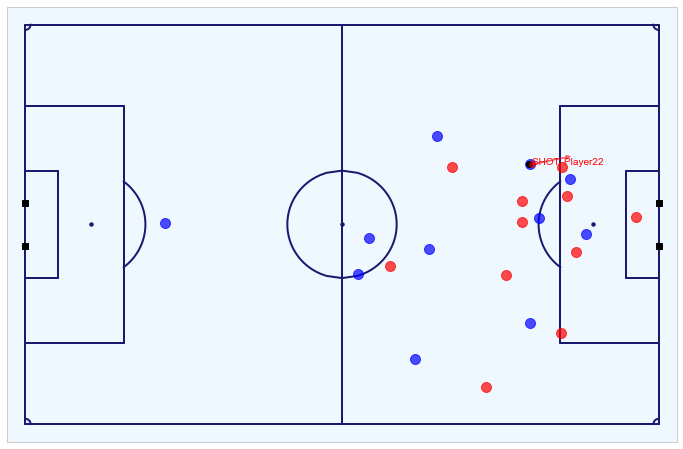

In [179]:
# Visualise the shot and the positions of the players

## Define index of Event data and frame of Tracking data
index = 297
frame = df_events.loc[index]['Start Frame']

## Visualise shots position using plot_events function from mviz library
fix, ax = mviz.plot_frame(df_tracking_home.loc[frame], df_tracking_away.loc[frame])
fix, ax = mviz.plot_events(df_events.loc[index:index], figax=(fig,ax), indicators = ['Marker', 'Arrow'], annotate=True)
#fig.suptitle('Player and Shot Positions', y=0.92)

## Save figure
if not os.path.exists(fig_dir_metrica + '/player_shot_positions_shot_18515_297.png'):
    plt.savefig(fig_dir_metrica + '/player_shot_positions_shot_18515_297.png', dpi=300, format='png', transparent=False, bbox_inches='tight')
else:
    pass

##### Tracking Data Visualisation

In [180]:
# Create MP4 video

## Define frames for the start and end of the shot
index = 297
frame_start= df_events.loc[index]['Start Frame']-150
frame_end = frame_start+300

## Save visualisation
if not os.path.exists(video_dir_metrica + '/tracking_shot_18515_297.mp4'):
    mviz.save_match_clip(df_tracking_home.iloc[frame_start:frame_end], df_tracking_away.iloc[frame_start:frame_end], video_dir_metrica, fname = 'tracking_shot_18515_297', include_player_velocities=False)
else:
    pass

In [181]:
# Embed shot in the notebook
Video('../../../../../video/fig/metrica-sports/tracking_shot_18515_297.mp4', width=770, height=530)

##### Summary
*    `Number_Intervening_Opponents` - 1
*    `Number_Intervening_Teammates` - 1
*    `Interference_on_Shooter` - 0
*    `Subtype`: BLOCKED
*    `isGoal`: False

#### <a id='#section5.1.5'>5.1.5. 27,345 (431)</a>

##### DataFrame Slice

In [182]:
# Slice DataFrame for shot of interest

## Define index of Event data and frame of Tracking data
index = 431
frame = df_events.loc[index]['Start Frame']

## Subset DataFrame
df_shots[df_shots['Start Frame']==frame]

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
431,Home,SHOT,HEAD-OFF TARGET-OUT,1,27345,1093.8,27360,1094.4,Player3,NaN,-43.46,-6.12,-54.06,-6.12


##### Event Data Visualisation

/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:145: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:145: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:153: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot( hometeam['ball_x'], hometeam['ball_y'], 'ko', MarkerSize=6, al

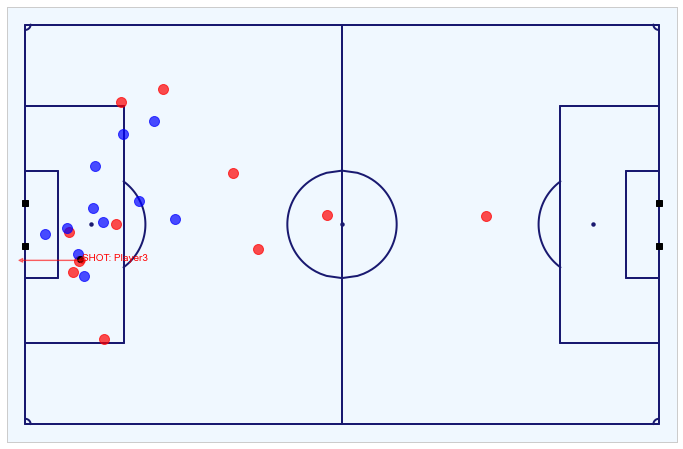

In [183]:
# Visualise the shot and the positions of the players

## Define index of Event data and frame of Tracking data
index = 431
frame = df_events.loc[index]['Start Frame']

## Visualise shots position using plot_events function from mviz library
fix, ax = mviz.plot_frame(df_tracking_home.loc[frame], df_tracking_away.loc[frame])
fix, ax = mviz.plot_events(df_events.loc[index:index], figax=(fig,ax), indicators = ['Marker', 'Arrow'], annotate=True)
#fig.suptitle('Player and Shot Positions', y=0.92)

## Save figure
if not os.path.exists(fig_dir_metrica + '/player_shot_positions_shot_27345_431.png'):
    plt.savefig(fig_dir_metrica + '/player_shot_positions_shot_27345_431.png', dpi=300, format='png', transparent=False, bbox_inches='tight')
else:
    pass

##### Tracking Data Visualisation

In [184]:
# Create MP4 video

## Define frames for the start and end of the shot
index = 431
frame_start= df_events.loc[index]['Start Frame']-150
frame_end = frame_start+300

## Save visualisation
if not os.path.exists(video_dir_metrica + '/tracking_shot_27345_431.mp4'):
    mviz.save_match_clip(df_tracking_home.iloc[frame_start:frame_end], df_tracking_away.iloc[frame_start:frame_end], video_dir_metrica, fname = 'tracking_shot_27345_431', include_player_velocities=False)
else:
    pass

In [185]:
# Embed shot in the notebook
Video('../../../../../video/fig/metrica-sports/tracking_shot_27345_431.mp4', width=770, height=530)

##### Summary
*    `Number_Intervening_Opponents` - 1
*    `Number_Intervening_Teammates` - 1
*    `Interference_on_Shooter` - High (2)
*    `Subtype`: BLOCKED
*    `isGoal`: False

#### <a id='#section5.1.6'>5.1.6. 29,754 (472)</a>

##### DataFrame Slice

In [186]:
# Slice DataFrame for shot of interest

## Define index of Event data and frame of Tracking data
index = 472
frame = df_events.loc[index]['Start Frame']

## Subset DataFrame
df_shots[df_shots['Start Frame']==frame]

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
472,Home,SHOT,ON TARGET-SAVED,1,29754,1190.16,29777,1191.08,Player4,NaN,-31.8,-13.6,-53.0,-2.72


##### Event Data Visualisation

/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:145: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:145: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:153: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot( hometeam['ball_x'], hometeam['ball_y'], 'ko', MarkerSize=6, al

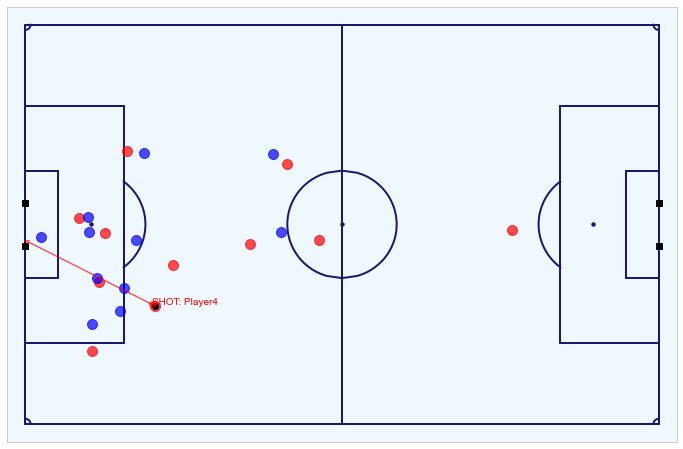

In [187]:
# Visualise the shot and the positions of the players

## Define index of Event data and frame of Tracking data
index = 472
frame = df_events.loc[index]['Start Frame']

## Visualise shots position using plot_events function from mviz library
fix, ax = mviz.plot_frame(df_tracking_home.loc[frame], df_tracking_away.loc[frame])
fix, ax = mviz.plot_events(df_events.loc[index:index], figax=(fig,ax), indicators = ['Marker', 'Arrow'], annotate=True)
#fig.suptitle('Player and Shot Positions', y=0.92)

## Save figure
if not os.path.exists(fig_dir_metrica + '/player_shot_positions_shot_29754_472.png'):
    plt.savefig(fig_dir_metrica + '/player_shot_positions_shot_29754_472.png', dpi=300, format='png', transparent=False, bbox_inches='tight')
else:
    pass

##### Tracking Data Visualisation

In [188]:
# Create MP4 video

## Define frames for the start and end of the shot
index = 472
frame_start= df_events.loc[index]['Start Frame']-150
frame_end = frame_start+300

## Save visualisation
if not os.path.exists(video_dir_metrica + '/tracking_shot_29754_472.mp4'):
    mviz.save_match_clip(df_tracking_home.iloc[frame_start:frame_end], df_tracking_away.iloc[frame_start:frame_end], video_dir_metrica, fname = 'tracking_shot_29754_472', include_player_velocities=False)
else:
    pass

In [189]:
# Embed shot in the notebook
Video('../../../../../video/fig/metrica-sports/tracking_shot_29754_472.mp4', width=770, height=530)

##### Summary
*    `Number_Intervening_Opponents` - 3
*    `Number_Intervening_Teammates` - 1
*    `Interference_on_Shooter` - 0
*    `Subtype`: HEAD-OFF TARGET-OUT
*    `isGoal`: False

#### <a id='#section5.1.7'>5.1.7. 53,049 (823)</a>

##### DataFrame Slice

In [190]:
# Slice DataFrame for shot of interest

## Define index of Event data and frame of Tracking data
index = 823
frame = df_events.loc[index]['Start Frame']

## Subset DataFrame
df_shots[df_shots['Start Frame']==frame]

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
823,Away,SHOT,ON TARGET-GOAL,1,53049,2121.96,53075,2123.0,Player24,NaN,44.52,2.72,54.06,1.36


##### Event Data Visualisation

/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:145: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:145: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:153: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot( hometeam['ball_x'], hometeam['ball_y'], 'ko', MarkerSize=6, al

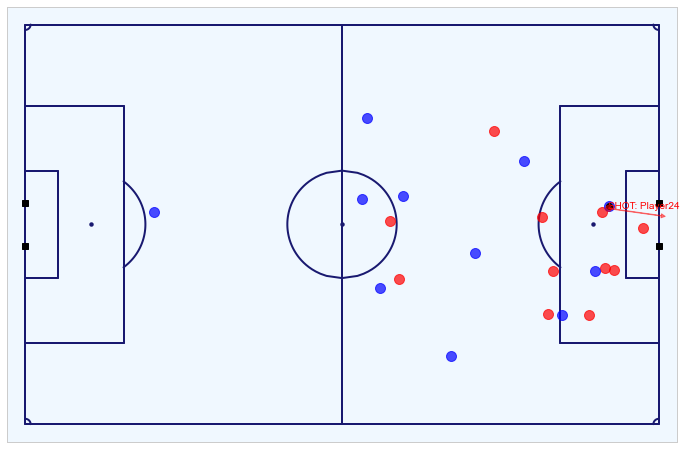

In [191]:
# Visualise the shot and the positions of the players

## Define index of Event data and frame of Tracking data
index = 823
frame = df_events.loc[index]['Start Frame']

## Visualise shots position using plot_events function from mviz library
fix, ax = mviz.plot_frame(df_tracking_home.loc[frame], df_tracking_away.loc[frame])
fix, ax = mviz.plot_events(df_events.loc[index:index], figax=(fig,ax), indicators = ['Marker', 'Arrow'], annotate=True)
#fig.suptitle('Player and Shot Positions', y=0.92)

## Save figure
if not os.path.exists(fig_dir_metrica + '/player_shot_positions_shot_53049_823.png'):
    plt.savefig(fig_dir_metrica + '/player_shot_positions_shot_53049_823.png', dpi=300, format='png', transparent=False, bbox_inches='tight')
else:
    pass

##### Tracking Data Visualisation

In [192]:
# Create MP4 video

## Define frames for the start and end of the shot
index = 823
frame_start= df_events.loc[index]['Start Frame']-150
frame_end = frame_start+300

## Save visualisation
if not os.path.exists(video_dir_metrica + '/tracking_shot_53049_823.mp4'):
    mviz.save_match_clip(df_tracking_home.iloc[frame_start:frame_end], df_tracking_away.iloc[frame_start:frame_end], video_dir_metrica, fname = 'tracking_shot_53049_823', include_player_velocities=False)
else:
    pass

In [193]:
# Embed shot in the notebook
Video('../../../../../video/fig/metrica-sports/tracking_shot_53049_823.mp4', width=770, height=530)

##### Summary
*    `Number_Intervening_Opponents` - 1
*    `Number_Intervening_Teammates` - 0
*    `Interference_on_Shooter` - Low (1)
*    `Subtype`: ON TARGET-GOAL
*    `isGoal`: True

#### <a id='#section5.1.8'>5.1.8. 56,079 (852)</a>

##### DataFrame Slice

In [194]:
# Slice DataFrame for shot of interest

## Define index of Event data and frame of Tracking data
index = 852
frame = df_events.loc[index]['Start Frame']

## Subset DataFrame
df_shots[df_shots['Start Frame']==frame]

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
852,Home,SHOT,HEAD-OFF TARGET-OUT,1,56079,2243.16,56131,2245.24,Player5,NaN,-42.4,6.12,-55.12,-17.68


##### Event Data Visualisation

/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:145: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:145: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:153: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot( hometeam['ball_x'], hometeam['ball_y'], 'ko', MarkerSize=6, al

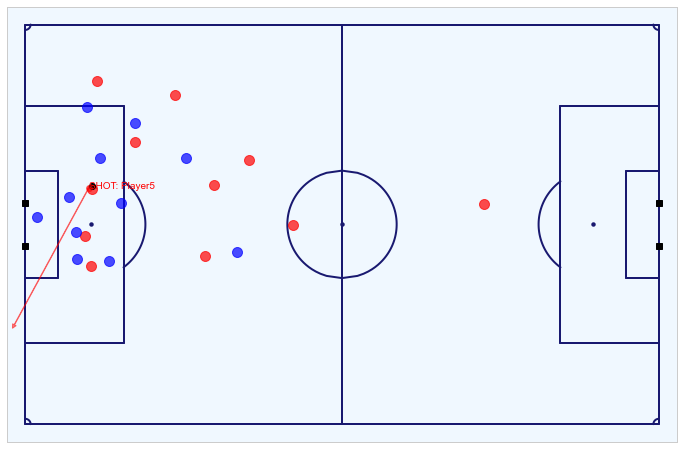

In [195]:
# Visualise the shot and the positions of the players

## Define index of Event data and frame of Tracking data
index = 852
frame = df_events.loc[index]['Start Frame']

## Visualise shots position using plot_events function from mviz library
fix, ax = mviz.plot_frame(df_tracking_home.loc[frame], df_tracking_away.loc[frame])
fix, ax = mviz.plot_events(df_events.loc[index:index], figax=(fig,ax), indicators = ['Marker', 'Arrow'], annotate=True)
#fig.suptitle('Player and Shot Positions', y=0.92)

## Save figure
if not os.path.exists(fig_dir_metrica + '/player_shot_positions_shot_56079_852.png'):
    plt.savefig(fig_dir_metrica + '/player_shot_positions_shot_56079_852.png', dpi=300, format='png', transparent=False, bbox_inches='tight')
else:
    pass

##### Tracking Data Visualisation

In [196]:
# Create MP4 video

## Define frames for the start and end of the shot
index = 852
frame_start= df_events.loc[index]['Start Frame']-150
frame_end = frame_start+300

## Save visualisation
if not os.path.exists(video_dir_metrica + '/tracking_shot_56079_852.mp4'):
    mviz.save_match_clip(df_tracking_home.iloc[frame_start:frame_end], df_tracking_away.iloc[frame_start:frame_end], video_dir_metrica, fname = 'tracking_shot_56079_852', include_player_velocities=False)
else:
    pass

In [197]:
# Embed shot in the notebook
Video('../../../../../video/fig/metrica-sports/tracking_shot_56079_852.mp4', width=770, height=530)

##### Summary
*    `Number_Intervening_Opponents` - 2
*    `Number_Intervening_Teammates` - 0
*    `Interference_on_Shooter` - 0
*    `Subtype`: HEAD-OFF TARGET-OUT
*    `isGoal`: False

#### <a id='#section5.1.9'>5.1.9. 63,362 (962)</a>

##### DataFrame Slice

In [198]:
# Slice DataFrame for shot of interest

## Define index of Event data and frame of Tracking data
index = 962
frame = df_events.loc[index]['Start Frame']

## Subset DataFrame
df_shots[df_shots['Start Frame']==frame]

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
962,Away,SHOT,OFF TARGET-HEAD-OUT,1,63362,2534.48,63372,2534.88,Player23,NaN,45.58,0.68,54.06,-6.8


##### Event Data Visualisation

/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:145: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:145: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:153: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot( hometeam['ball_x'], hometeam['ball_y'], 'ko', MarkerSize=6, al

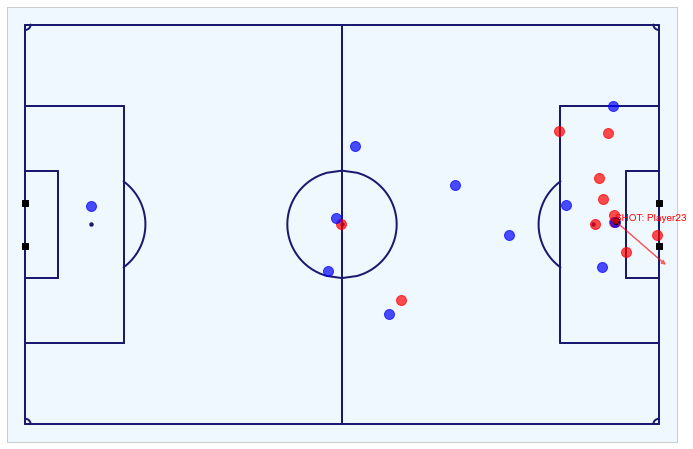

In [199]:
# Visualise the shot and the positions of the players

## Define index of Event data and frame of Tracking data
index = 962
frame = df_events.loc[index]['Start Frame']

## Visualise shots position using plot_events function from mviz library
fix, ax = mviz.plot_frame(df_tracking_home.loc[frame], df_tracking_away.loc[frame])
fix, ax = mviz.plot_events(df_events.loc[index:index], figax=(fig,ax), indicators = ['Marker', 'Arrow'], annotate=True)
#fig.suptitle('Player and Shot Positions', y=0.92)

## Save figure
if not os.path.exists(fig_dir_metrica + '/player_shot_positions_shot_63362_962.png'):
    plt.savefig(fig_dir_metrica + '/player_shot_positions_shot_63362_962.png', dpi=300, format='png', transparent=False, bbox_inches='tight')
else:
    pass

##### Tracking Data Visualisation

In [200]:
# Create MP4 video

## Define frames for the start and end of the shot
index = 962
frame_start= df_events.loc[index]['Start Frame']-150
frame_end = frame_start+300

## Save visualisation
if not os.path.exists(video_dir_metrica + '/tracking_shot_63362_962.mp4'):
    mviz.save_match_clip(df_tracking_home.iloc[frame_start:frame_end], df_tracking_away.iloc[frame_start:frame_end], video_dir_metrica, fname = 'tracking_shot_63362_962', include_player_velocities=False)
else:
    pass

In [201]:
# Embed shot in the notebook
Video('../../../../../video/fig/metrica-sports/tracking_shot_63362_962.mp4', width=770, height=530)

##### Summary
*    `Number_Intervening_Opponents` - 1
*    `Number_Intervening_Teammates` - 0
*    `Interference_on_Shooter` - Medium (1)
*    `Subtype`: OFF TARGET-HEAD-OUT
*    `isGoal`: False

#### <a id='#section5.1.10'>5.1.10. 64,772 (980)</a>

##### DataFrame Slice

In [202]:
# Slice DataFrame for shot of interest

## Define index of Event data and frame of Tracking data
index = 980
frame = df_events.loc[index]['Start Frame']

## Subset DataFrame
df_shots[df_shots['Start Frame']==frame]

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
980,Away,SHOT,ON TARGET-SAVED,1,64772,2590.88,64799,2591.96,Player20,NaN,28.62,-3.4,51.94,-2.04


##### Event Data Visualisation

/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:145: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:145: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:153: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot( hometeam['ball_x'], hometeam['ball_y'], 'ko', MarkerSize=6, al

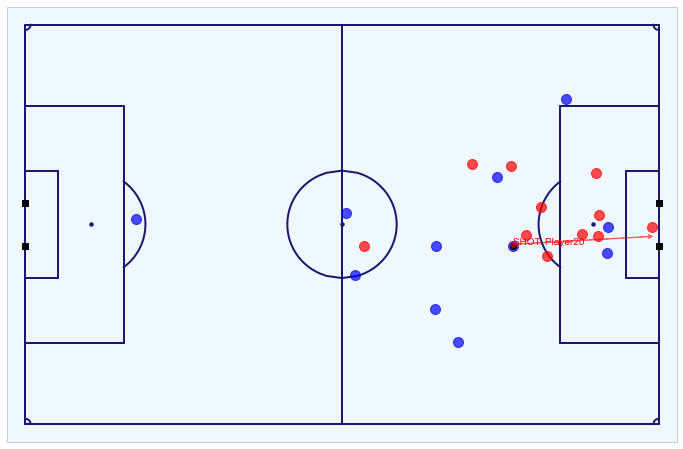

In [203]:
# Visualise the shot and the positions of the players

## Define index of Event data and frame of Tracking data
index = 980
frame = df_events.loc[index]['Start Frame']

## Visualise shots position using plot_events function from mviz library
fix, ax = mviz.plot_frame(df_tracking_home.loc[frame], df_tracking_away.loc[frame])
fix, ax = mviz.plot_events(df_events.loc[index:index], figax=(fig,ax), indicators = ['Marker', 'Arrow'], annotate=True)
#fig.suptitle('Player and Shot Positions', y=0.92)

## Save figure
if not os.path.exists(fig_dir_metrica + '/player_shot_positions_shot_64772_980.png'):
    plt.savefig(fig_dir_metrica + '/player_shot_positions_shot_64772_980.png', dpi=300, format='png', transparent=False, bbox_inches='tight')
else:
    pass

##### Tracking Data Visualisation

In [204]:
# Create MP4 video

## Define frames for the start and end of the shot
index = 980
frame_start= df_events.loc[index]['Start Frame']-150
frame_end = frame_start+300

## Save visualisation
if not os.path.exists(video_dir_metrica + '/tracking_shot_64772_980.mp4'):
    mviz.save_match_clip(df_tracking_home.iloc[frame_start:frame_end], df_tracking_away.iloc[frame_start:frame_end], video_dir_metrica, fname = 'tracking_shot_64772_980', include_player_velocities=False)
else:
    pass

In [205]:
# Embed shot in the notebook
Video('../../../../../video/fig/metrica-sports/tracking_shot_64772_980.mp4', width=770, height=530)

##### Summary
*    `Number_Intervening_Opponents` - 3
*    `Number_Intervening_Teammates` - 1
*    `Interference_on_Shooter` - Medium (1)
*    `Subtype`: ON TARGET-SAVED
*    `isGoal`: False

#### <a id='#section5.1.11'>5.1.11. 67,067 (1,026)</a>

##### DataFrame Slice

In [206]:
# Slice DataFrame for shot of interest

## Define index of Event data and frame of Tracking data
index = 1_026
frame = df_events.loc[index]['Start Frame']

## Subset DataFrame
df_shots[df_shots['Start Frame']==frame]

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
1026,Home,SHOT,OFF TARGET-OUT,1,67067,2682.68,67107,2684.28,Player7,NaN,-39.22,-18.36,-55.12,6.12


##### Event Data Visualisation

/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:145: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:145: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:153: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot( hometeam['ball_x'], hometeam['ball_y'], 'ko', MarkerSize=6, al

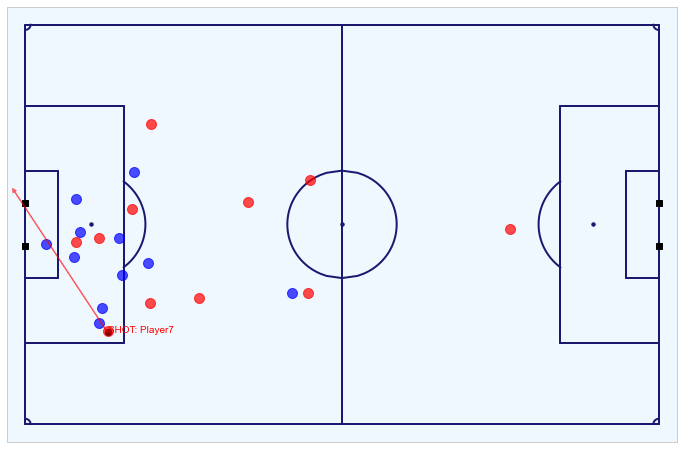

In [207]:
# Visualise the shot and the positions of the players

## Define index of Event data and frame of Tracking data
index = 1_026
frame = df_events.loc[index]['Start Frame']

## Visualise shots position using plot_events function from mviz library
fix, ax = mviz.plot_frame(df_tracking_home.loc[frame], df_tracking_away.loc[frame])
fix, ax = mviz.plot_events(df_events.loc[index:index], figax=(fig,ax), indicators = ['Marker', 'Arrow'], annotate=True)
#fig.suptitle('Player and Shot Positions', y=0.92)

## Save figure
if not os.path.exists(fig_dir_metrica + '/player_shot_positions_shot_67067_1026.png'):
    plt.savefig(fig_dir_metrica + '/player_shot_positions_shot_67067_1026.png', dpi=300, format='png', transparent=False, bbox_inches='tight')
else:
    pass

##### Tracking Data Visualisation

In [208]:
# Create MP4 video

## Define frames for the start and end of the shot
index = 1_026
frame_start= df_events.loc[index]['Start Frame']-150
frame_end = frame_start+300

## Save visualisation
if not os.path.exists(video_dir_metrica + '/tracking_shot_67067_1026.mp4'):
    mviz.save_match_clip(df_tracking_home.iloc[frame_start:frame_end], df_tracking_away.iloc[frame_start:frame_end], video_dir_metrica, fname = 'tracking_shot_67067_1026', include_player_velocities=False)
else:
    pass

In [209]:
# Embed shot in the notebook
Video('../../../../../video/fig/metrica-sports/tracking_shot_67067_1026.mp4', width=770, height=530)

##### Summary
*    `Number_Intervening_Opponents` - 2
*    `Number_Intervening_Teammates` - 0
*    `Interference_on_Shooter` - Medium (1)
*    `Subtype`: OFF TARGET-OUT	
*    `isGoal`: False

#### <a id='#section5.1.12'>5.1.12. 69,887 (1,058)</a>

##### DataFrame Slice

In [210]:
# Slice DataFrame for shot of interest

## Define index of Event data and frame of Tracking data
index = 1_058
frame = df_events.loc[index]['Start Frame']

## Subset DataFrame
df_shots[df_shots['Start Frame']==frame]

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
1058,Away,SHOT,OFF TARGET-OUT,2,69887,2795.48,69927,2797.08,Player21,NaN,30.74,10.88,56.18,-8.16


##### Event Data Visualisation

/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:145: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:145: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:153: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot( hometeam['ball_x'], hometeam['ball_y'], 'ko', MarkerSize=6, al

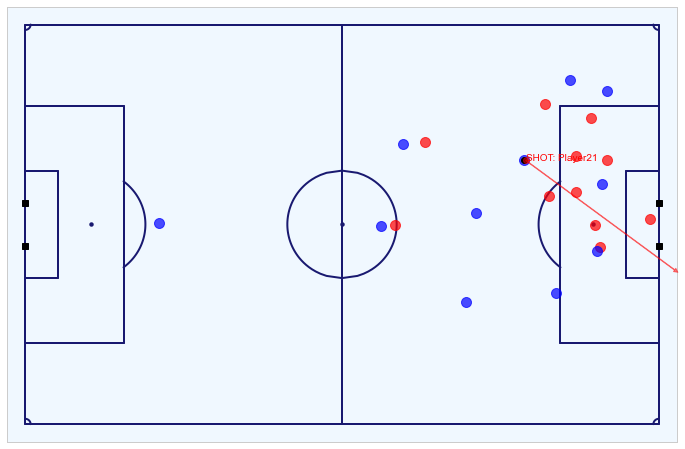

In [211]:
# Visualise the shot and the positions of the players

## Define index of Event data and frame of Tracking data
index = 1_058
frame = df_events.loc[index]['Start Frame']

## Visualise shots position using plot_events function from mviz library
fix, ax = mviz.plot_frame(df_tracking_home.loc[frame], df_tracking_away.loc[frame])
fix, ax = mviz.plot_events(df_events.loc[index:index], figax=(fig,ax), indicators = ['Marker', 'Arrow'], annotate=True)
#fig.suptitle('Player and Shot Positions', y=0.92)

## Save figure
if not os.path.exists(fig_dir_metrica + '/player_shot_positions_shot_69887_1058.png'):
    plt.savefig(fig_dir_metrica + '/player_shot_positions_shot_69887_1058.png', dpi=300, format='png', transparent=False, bbox_inches='tight')
else:
    pass

##### Tracking Data Visualisation

In [212]:
# Create MP4 video

## Define frames for the start and end of the shot
index = 1_058
frame_start= df_events.loc[index]['Start Frame']-150
frame_end = frame_start+300

## Save visualisation
if not os.path.exists(video_dir_metrica + '/tracking_shot_69887_1058.mp4'):
    mviz.save_match_clip(df_tracking_home.iloc[frame_start:frame_end], df_tracking_away.iloc[frame_start:frame_end], video_dir_metrica, fname = 'tracking_shot_69887_1058', include_player_velocities=False)
else:
    pass

In [213]:
# Embed shot in the notebook
Video('../../../../../video/fig/metrica-sports/tracking_shot_69887_1058.mp4', width=770, height=530)

##### Summary
*    `Number_Intervening_Opponents` - 2
*    `Number_Intervening_Teammates` - 1
*    `Interference_on_Shooter` - 0
*    `Subtype`: OFF TARGET-OUT	
*    `isGoal`: False

#### <a id='#section5.1.13'>5.1.13. 73,983 (1,118)</a>

##### DataFrame Slice

In [214]:
# Slice DataFrame for shot of interest

## Define index of Event data and frame of Tracking data
index = 1_118
frame = df_events.loc[index]['Start Frame']

## Subset DataFrame
df_shots[df_shots['Start Frame']==frame]

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
1118,Home,SHOT,HEAD-ON TARGET-GOAL,2,73983,2959.32,73995,2959.8,Player9,NaN,-47.7,1.36,-54.06,2.04


##### Event Data Visualisation

/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:145: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:145: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:153: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot( hometeam['ball_x'], hometeam['ball_y'], 'ko', MarkerSize=6, al

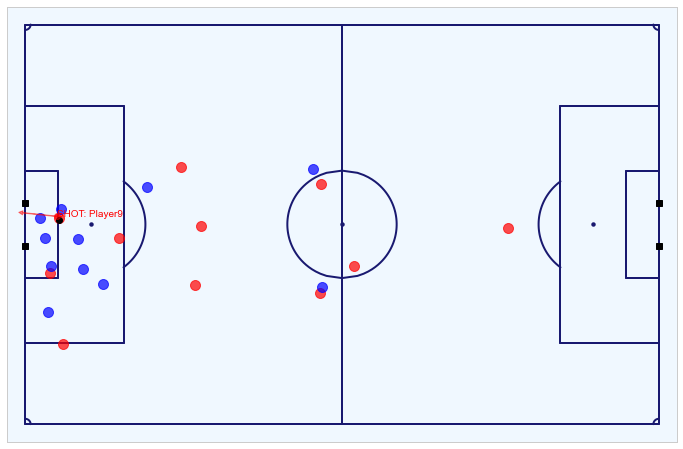

In [215]:
# Visualise the shot and the positions of the players

## Define index of Event data and frame of Tracking data
index = 1_118
frame = df_events.loc[index]['Start Frame']

## Visualise shots position using plot_events function from mviz library
fix, ax = mviz.plot_frame(df_tracking_home.loc[frame], df_tracking_away.loc[frame])
fix, ax = mviz.plot_events(df_events.loc[index:index], figax=(fig,ax), indicators = ['Marker', 'Arrow'], annotate=True)
#fig.suptitle('Player and Shot Positions', y=0.92)

## Save figure
if not os.path.exists(fig_dir_metrica + '/player_shot_positions_shot_73983_1118.png'):
    plt.savefig(fig_dir_metrica + '/player_shot_positions_shot_73983_1118.png', dpi=300, format='png', transparent=False, bbox_inches='tight')
else:
    pass

##### Tracking Data Visualisation

In [216]:
# Create MP4 video

## Define frames for the start and end of the shot
index = 1_118
frame_start= df_events.loc[index]['Start Frame']-150
frame_end = frame_start+300

## Save visualisation
if not os.path.exists(video_dir_metrica + '/tracking_shot_73983_1118.mp4'):
    mviz.save_match_clip(df_tracking_home.iloc[frame_start:frame_end], df_tracking_away.iloc[frame_start:frame_end], video_dir_metrica, fname = 'tracking_shot_73983_1118', include_player_velocities=False)
else:
    pass

In [217]:
# Embed shot in the notebook
Video('../../../../../video/fig/metrica-sports/tracking_shot_73983_1118.mp4', width=770, height=530)

##### Summary
*    `Number_Intervening_Opponents` - 2
*    `Number_Intervening_Teammates` - 0
*    `Interference_on_Shooter` - Medium (2)
*    `Subtype`: HEAD-ON TARGET-GOAL
*    `isGoal`: True

#### <a id='#section5.1.14'>5.1.14. 86,191 (1,277)</a>

##### DataFrame Slice

In [218]:
# Slice DataFrame for shot of interest

## Define index of Event data and frame of Tracking data
index = 1_277
frame = df_events.loc[index]['Start Frame']

## Subset DataFrame
df_shots[df_shots['Start Frame']==frame]

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
1277,Away,SHOT,OFF TARGET-OUT,2,86191,3447.64,86219,3448.76,Player19,NaN,32.86,2.72,55.12,6.12


##### Event Data Visualisation

/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:145: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:145: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:153: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot( hometeam['ball_x'], hometeam['ball_y'], 'ko', MarkerSize=6, al

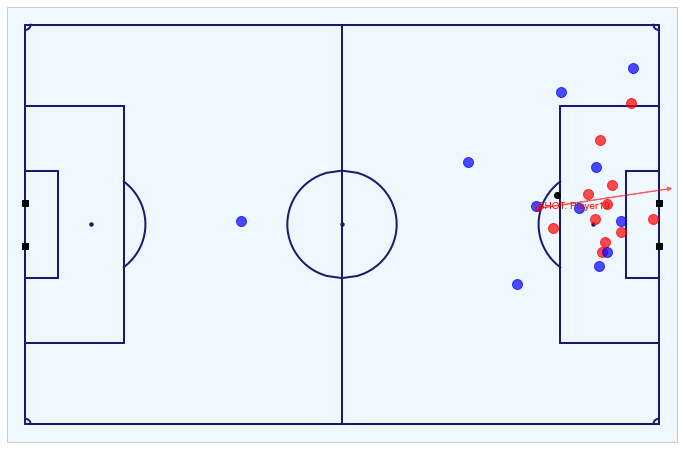

In [219]:
# Visualise the shot and the positions of the players

## Define index of Event data and frame of Tracking data
index = 1_277
frame = df_events.loc[index]['Start Frame']

## Visualise shots position using plot_events function from mviz library
fix, ax = mviz.plot_frame(df_tracking_home.loc[frame], df_tracking_away.loc[frame])
fix, ax = mviz.plot_events(df_events.loc[index:index], figax=(fig,ax), indicators = ['Marker', 'Arrow'], annotate=True)
#fig.suptitle('Player and Shot Positions', y=0.92)

## Save figure
if not os.path.exists(fig_dir_metrica + '/player_shot_positions_shot_86191_1277.png'):
    plt.savefig(fig_dir_metrica + '/player_shot_positions_shot_86191_1277.png', dpi=300, format='png', transparent=False, bbox_inches='tight')
else:
    pass

##### Tracking Data Visualisation

In [220]:
# Create MP4 video

## Define frames for the start and end of the shot
index = 1_277
frame_start= df_events.loc[index]['Start Frame']-150
frame_end = frame_start+300

## Save visualisation
if not os.path.exists(video_dir_metrica + '/tracking_shot_86191_1277.mp4'):
    mviz.save_match_clip(df_tracking_home.iloc[frame_start:frame_end], df_tracking_away.iloc[frame_start:frame_end], video_dir_metrica, fname = 'tracking_shot_86191_1277', include_player_velocities=False)
else:
    pass

In [221]:
# Embed shot in the notebook
Video('../../../../../video/fig/metrica-sports/tracking_shot_86191_1277.mp4', width=770, height=530)

##### Summary
*    `Number_Intervening_Opponents` - 4
*    `Number_Intervening_Teammates` - 2
*    `Interference_on_Shooter` - 0
*    `Subtype`: OFF TARGET-OUT
*    `isGoal`: False

#### <a id='#section5.1.15'>5.1.15. 90,165 (1,335)</a>

##### DataFrame Slice

In [222]:
# Slice DataFrame for shot of interest

## Define index of Event data and frame of Tracking data
index = 1_335
frame = df_events.loc[index]['Start Frame']

## Subset DataFrame
df_shots[df_shots['Start Frame']==frame]

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
1335,Away,SHOT,ON TARGET-SAVED,2,90165,3606.6,90176,3607.04,Player19,NaN,46.64,-11.56,51.94,-2.72


##### Event Data Visualisation

/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:145: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:145: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:153: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot( hometeam['ball_x'], hometeam['ball_y'], 'ko', MarkerSize=6, al

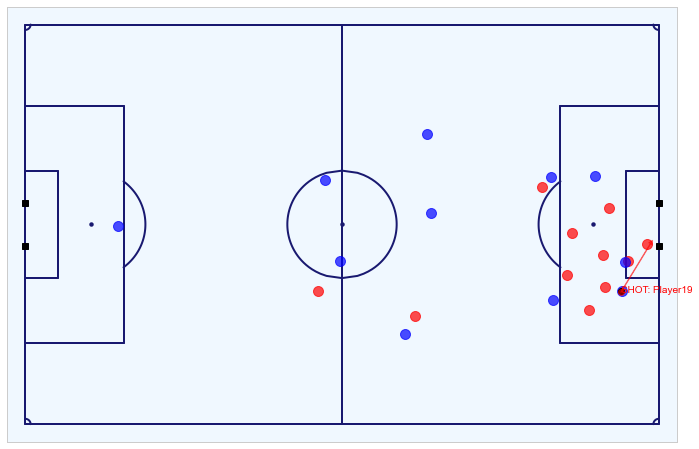

In [223]:
# Visualise the shot and the positions of the players

## Define index of Event data and frame of Tracking data
index = 1_335
frame = df_events.loc[index]['Start Frame']

## Visualise shots position using plot_events function from mviz library
fix, ax = mviz.plot_frame(df_tracking_home.loc[frame], df_tracking_away.loc[frame])
fix, ax = mviz.plot_events(df_events.loc[index:index], figax=(fig,ax), indicators = ['Marker', 'Arrow'], annotate=True)
#fig.suptitle('Player and Shot Positions', y=0.92)

## Save figure
if not os.path.exists(fig_dir_metrica + '/player_shot_positions_shot_90165_1335.png'):
    plt.savefig(fig_dir_metrica + '/player_shot_positions_shot_90165_1335.png', dpi=300, format='png', transparent=False, bbox_inches='tight')
else:
    pass

##### Tracking Data Visualisation

In [224]:
# Create MP4 video

## Define frames for the start and end of the shot
index = 1_335
frame_start= df_events.loc[index]['Start Frame']-150
frame_end = frame_start+300

## Save visualisation
if not os.path.exists(video_dir_metrica + '/tracking_shot_90165_1335.mp4'):
    mviz.save_match_clip(df_tracking_home.iloc[frame_start:frame_end], df_tracking_away.iloc[frame_start:frame_end], video_dir_metrica, fname = 'tracking_shot_90165_1335', include_player_velocities=False)
else:
    pass

In [225]:
# Embed shot in the notebook
Video('../../../../../video/fig/metrica-sports/tracking_shot_90165_1335.mp4', width=770, height=530)

##### Summary
*    `Number_Intervening_Opponents` - 2
*    `Number_Intervening_Teammates` - 0
*    `Interference_on_Shooter` - Low (0)
*    `Subtype`: ON TARGET-SAVED
*    `isGoal`: False

#### <a id='#section5.1.16'>5.1.16. 98,880 (1,479)</a>

##### DataFrame Slice

In [226]:
# Slice DataFrame for shot of interest

## Define index of Event data and frame of Tracking data
index = 1_479
frame = df_events.loc[index]['Start Frame']

## Subset DataFrame
df_shots[df_shots['Start Frame']==frame]

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
1479,Home,SHOT,ON TARGET-SAVED,2,98880,3955.2,98896,3955.84,Player10,NaN,-48.76,-4.08,-51.94,-3.4


##### Event Data Visualisation

/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:145: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:145: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:153: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot( hometeam['ball_x'], hometeam['ball_y'], 'ko', MarkerSize=6, al

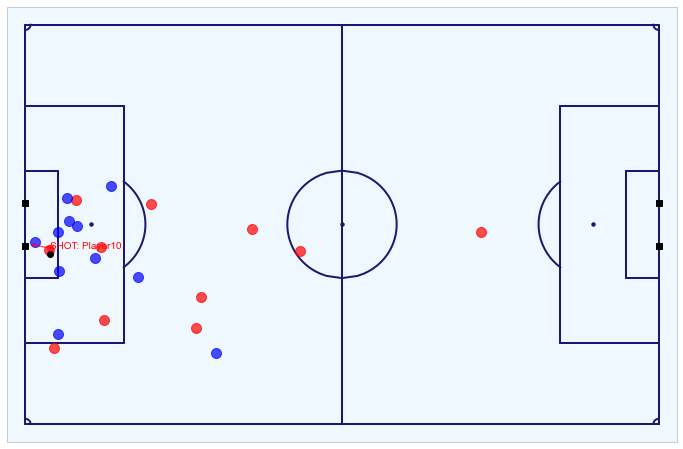

In [227]:
# Visualise the shot and the positions of the players

## Define index of Event data and frame of Tracking data
index = 1_479
frame = df_events.loc[index]['Start Frame']

## Visualise shots position using plot_events function from mviz library
fix, ax = mviz.plot_frame(df_tracking_home.loc[frame], df_tracking_away.loc[frame])
fix, ax = mviz.plot_events(df_events.loc[index:index], figax=(fig,ax), indicators = ['Marker', 'Arrow'], annotate=True)
#fig.suptitle('Player and Shot Positions', y=0.92)

## Save figure
if not os.path.exists(fig_dir_metrica + '/player_shot_positions_shot_98880_1479.png'):
    plt.savefig(fig_dir_metrica + '/player_shot_positions_shot_98880_1479.png', dpi=300, format='png', transparent=False, bbox_inches='tight')
else:
    pass

##### Tracking Data Visualisation

In [228]:
# Create MP4 video

## Define frames for the start and end of the shot
index = 1_479
frame_start= df_events.loc[index]['Start Frame']-150
frame_end = frame_start+300

## Save visualisation
if not os.path.exists(video_dir_metrica + '/tracking_shot_98880_1479.mp4'):
    mviz.save_match_clip(df_tracking_home.iloc[frame_start:frame_end], df_tracking_away.iloc[frame_start:frame_end], video_dir_metrica, fname = 'tracking_shot_98880_1479', include_player_velocities=False)
else:
    pass

In [229]:
# Embed shot in the notebook
Video('../../../../../video/fig/metrica-sports/tracking_shot_98880_1479.mp4', width=770, height=530)

##### Summary
*    `Number_Intervening_Opponents` - 1
*    `Number_Intervening_Teammates` - 0
*    `Interference_on_Shooter` - Low (0)
*    `Subtype`: ON TARGET-SAVED
*    `isGoal`: False

#### <a id='#section5.1.17'>5.1.17. 111,758 (1,666)</a>

##### DataFrame Slice

In [230]:
# Slice DataFrame for shot of interest

## Define index of Event data and frame of Tracking data
index = 1_666
frame = df_events.loc[index]['Start Frame']

## Subset DataFrame
df_shots[df_shots['Start Frame']==frame]

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
1666,Away,SHOT,BLOCKED,2,111758,4470.32,111763,4470.52,Player24,NaN,43.46,-7.48,46.64,-3.4


##### Event Data Visualisation

/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:145: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:145: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:153: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot( hometeam['ball_x'], hometeam['ball_y'], 'ko', MarkerSize=6, al

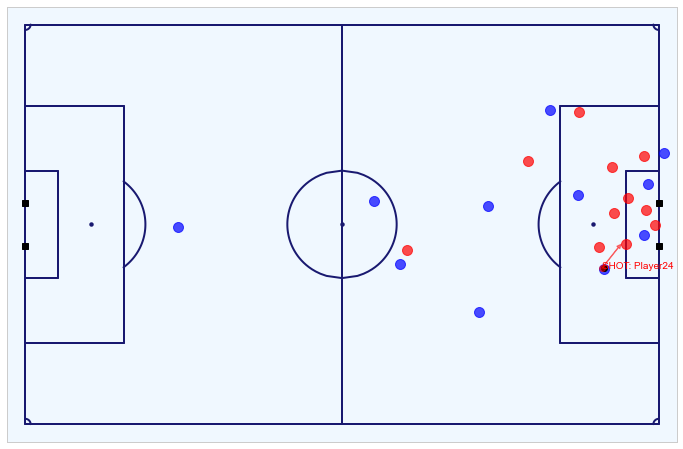

In [231]:
# Visualise the shot and the positions of the players

## Define index of Event data and frame of Tracking data
index = 1_666
frame = df_events.loc[index]['Start Frame']

## Visualise shots position using plot_events function from mviz library
fix, ax = mviz.plot_frame(df_tracking_home.loc[frame], df_tracking_away.loc[frame])
fix, ax = mviz.plot_events(df_events.loc[index:index], figax=(fig,ax), indicators = ['Marker', 'Arrow'], annotate=True)
#fig.suptitle('Player and Shot Positions', y=0.92)

## Save figure
if not os.path.exists(fig_dir_metrica + '/player_shot_positions_shot_111758_1666.png'):
    plt.savefig(fig_dir_metrica + '/player_shot_positions_shot_111758_1666.png', dpi=300, format='png', transparent=False, bbox_inches='tight')
else:
    pass

##### Tracking Data Visualisation

In [232]:
# Create MP4 video

## Define frames for the start and end of the shot
index = 1_666
frame_start= df_events.loc[index]['Start Frame']-150
frame_end = frame_start+300

## Save visualisation
if not os.path.exists(video_dir_metrica + '/tracking_shot_111758_1666.mp4'):
    mviz.save_match_clip(df_tracking_home.iloc[frame_start:frame_end], df_tracking_away.iloc[frame_start:frame_end], video_dir_metrica, fname = 'tracking_shot_111758_1666', include_player_velocities=False)
else:
    pass

In [233]:
# Embed shot in the notebook
Video('../../../../../video/fig/metrica-sports/tracking_shot_111758_1666.mp4', width=770, height=530)

##### Summary
*    `Number_Intervening_Opponents` - 3
*    `Number_Intervening_Teammates` - 1
*    `Interference_on_Shooter` - Low (0)
*    `Subtype`: BLOCKED
*    `isGoal`: False

#### <a id='#section5.1.18'>5.1.18. 115,009 (1,671)</a>

##### DataFrame Slice

In [234]:
# Slice DataFrame for shot of interest

## Define index of Event data and frame of Tracking data
index = 1_671
frame = df_events.loc[index]['Start Frame']

## Subset DataFrame
df_shots[df_shots['Start Frame']==frame]

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
1671,Away,SHOT,ON TARGET-GOAL,2,115009,4600.36,115024,4600.96,Player20,NaN,40.28,1.36,55.12,2.72


##### Event Data Visualisation

/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:145: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:145: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:153: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot( hometeam['ball_x'], hometeam['ball_y'], 'ko', MarkerSize=6, al

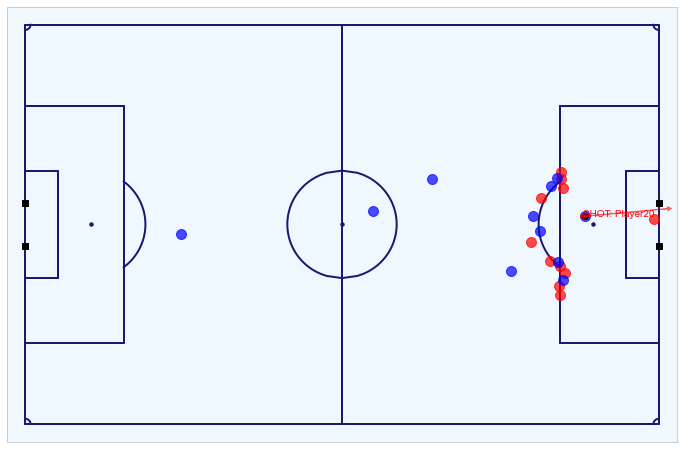

In [235]:
# Visualise the shot and the positions of the players

## Define index of Event data and frame of Tracking data
index = 1_671
frame = df_events.loc[index]['Start Frame']

## Visualise shots position using plot_events function from mviz library
fix, ax = mviz.plot_frame(df_tracking_home.loc[frame], df_tracking_away.loc[frame])
fix, ax = mviz.plot_events(df_events.loc[index:index], figax=(fig,ax), indicators = ['Marker', 'Arrow'], annotate=True)
#fig.suptitle('Player and Shot Positions', y=0.92)

## Save figure
if not os.path.exists(fig_dir_metrica + '/player_shot_positions_shot_115009_1671.png'):
    plt.savefig(fig_dir_metrica + '/player_shot_positions_shot_115009_1671.png', dpi=300, format='png', transparent=False, bbox_inches='tight')
else:
    pass

##### Tracking Data Visualisation

In [236]:
# Create MP4 video

## Define frames for the start and end of the shot
index = 1_671
frame_start= df_events.loc[index]['Start Frame']-150
frame_end = frame_start+300

## Save visualisation
if not os.path.exists(video_dir_metrica + '/tracking_shot_115009_1671.mp4'):
    mviz.save_match_clip(df_tracking_home.iloc[frame_start:frame_end], df_tracking_away.iloc[frame_start:frame_end], video_dir_metrica, fname = 'tracking_shot_115009_1671', include_player_velocities=False)
else:
    pass

In [237]:
# Embed shot in the notebook
Video('../../../../../video/fig/metrica-sports/tracking_shot_115009_1671.mp4', width=770, height=530)

##### Summary
*    `Number_Intervening_Opponents` - 1
*    `Number_Intervening_Teammates` - 0
*    `Interference_on_Shooter` - Low (0)
*    `Subtype`: ON TARGET-GOAL
*    `isGoal`: True
*    `isPenalty`: True

#### <a id='#section5.1.19'>5.1.19. 117,218 (1,681)</a>

##### DataFrame Slice

In [238]:
# Slice DataFrame for shot of interest

## Define index of Event data and frame of Tracking data
index = 1_681
frame = df_events.loc[index]['Start Frame']

## Subset DataFrame
df_shots[df_shots['Start Frame']==frame]

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
1681,Home,SHOT,HEAD-OFF TARGET-OUT,2,117218,4688.72,117245,4689.8,Player9,NaN,-41.34,7.48,-54.06,-5.44


##### Event Data Visualisation

/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:145: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:145: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:153: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot( hometeam['ball_x'], hometeam['ball_y'], 'ko', MarkerSize=6, al

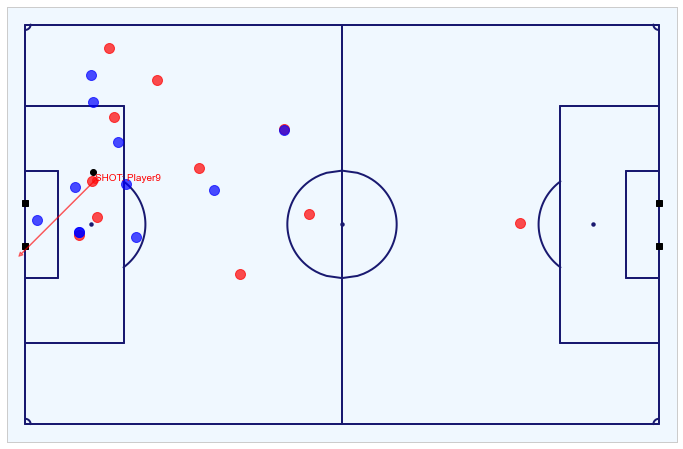

In [239]:
# Visualise the shot and the positions of the players

## Define index of Event data and frame of Tracking data
index = 1_681
frame = df_events.loc[index]['Start Frame']

## Visualise shots position using plot_events function from mviz library
fix, ax = mviz.plot_frame(df_tracking_home.loc[frame], df_tracking_away.loc[frame])
fix, ax = mviz.plot_events(df_events.loc[index:index], figax=(fig,ax), indicators = ['Marker', 'Arrow'], annotate=True)
#fig.suptitle('Player and Shot Positions', y=0.92)

## Save figure
if not os.path.exists(fig_dir_metrica + '/player_shot_positions_shot_117218_1681.png'):
    plt.savefig(fig_dir_metrica + '/player_shot_positions_shot_117218_1681.png', dpi=300, format='png', transparent=False, bbox_inches='tight')
else:
    pass

##### Tracking Data Visualisation

In [240]:
# Create MP4 video

## Define frames for the start and end of the shot
index = 1_681
frame_start= df_events.loc[index]['Start Frame']-150
frame_end = frame_start+300

## Save visualisation
if not os.path.exists(video_dir_metrica + '/tracking_shot_117218_1681.mp4'):
    mviz.save_match_clip(df_tracking_home.iloc[frame_start:frame_end], df_tracking_away.iloc[frame_start:frame_end], video_dir_metrica, fname = 'tracking_shot_117218_1681', include_player_velocities=False)
else:
    pass

In [241]:
# Embed shot in the notebook
Video('../../../../../video/fig/metrica-sports/tracking_shot_117218_1681.mp4', width=770, height=530)

##### Summary
*    `Number_Intervening_Opponents` - 2
*    `Number_Intervening_Teammates` - 0
*    `Interference_on_Shooter` - Medium (1)
*    `Subtype`: HEAD-OFF TARGET-OUT		
*    `isGoal`: False
*    `isPenalty`: False

#### <a id='#section5.1.20'>5.1.20. 121,027 (1,723)</a>

##### DataFrame Slice

In [242]:
# Slice DataFrame for shot of interest

## Define index of Event data and frame of Tracking data
index = 1_723
frame = df_events.loc[index]['Start Frame']

## Subset DataFrame
df_shots[df_shots['Start Frame']==frame]

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
1723,Home,SHOT,ON TARGET-GOAL,2,121027,4841.08,121055,4842.2,Player12,NaN,-30.74,5.44,-54.06,2.72


##### Event Data Visualisation

/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:145: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:145: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:153: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot( hometeam['ball_x'], hometeam['ball_y'], 'ko', MarkerSize=6, al

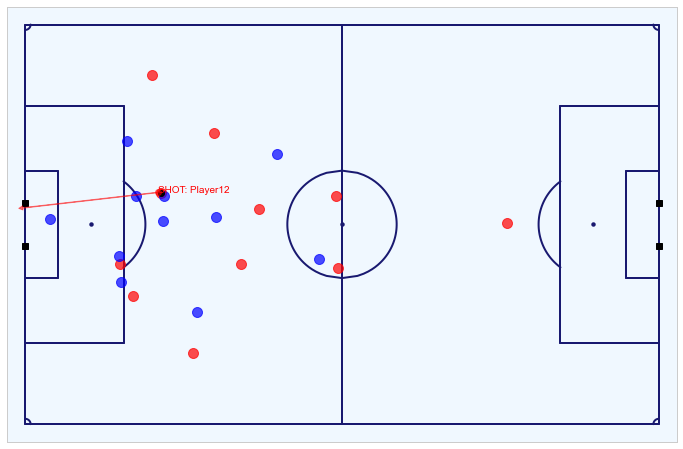

In [243]:
# Visualise the shot and the positions of the players

## Define index of Event data and frame of Tracking data
index = 1_723
frame = df_events.loc[index]['Start Frame']

## Visualise shots position using plot_events function from mviz library
fix, ax = mviz.plot_frame(df_tracking_home.loc[frame], df_tracking_away.loc[frame])
fix, ax = mviz.plot_events(df_events.loc[index:index], figax=(fig,ax), indicators = ['Marker', 'Arrow'], annotate=True)
#fig.suptitle('Player and Shot Positions', y=0.92)

## Save figure
if not os.path.exists(fig_dir_metrica + '/player_shot_positions_shot_121027_1723.png'):
    plt.savefig(fig_dir_metrica + '/player_shot_positions_shot_121027_1723.png', dpi=300, format='png', transparent=False, bbox_inches='tight')
else:
    pass

##### Tracking Data Visualisation

In [244]:
# Create MP4 video

## Define frames for the start and end of the shot
index = 1_723
frame_start= df_events.loc[index]['Start Frame']-150
frame_end = frame_start+300

## Save visualisation
if not os.path.exists(video_dir_metrica + '/tracking_shot_121027_1723.mp4'):
    mviz.save_match_clip(df_tracking_home.iloc[frame_start:frame_end], df_tracking_away.iloc[frame_start:frame_end], video_dir_metrica, fname = 'tracking_shot_121027_1723', include_player_velocities=False)
else:
    pass

In [245]:
# Embed shot in the notebook
Video('../../../../../video/fig/metrica-sports/tracking_shot_121027_1723.mp4', width=770, height=530)

##### Summary
*    `Number_Intervening_Opponents` - 2
*    `Number_Intervening_Teammates` - 0
*    `Interference_on_Shooter` - High (2)
*    `Subtype`: ON TARGET-GOAL	
*    `isGoal`: True
*    `isPenalty`: False

#### <a id='#section5.1.21'>5.1.21. 124,336 (1,756)</a>

##### DataFrame Slice

In [246]:
# Slice DataFrame for shot of interest

## Define index of Event data and frame of Tracking data
index = 1_756
frame = df_events.loc[index]['Start Frame']

## Subset DataFrame
df_shots[df_shots['Start Frame']==frame]

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
1756,Home,SHOT,HEAD-OFF TARGET-OUT,2,124336,4973.44,124365,4974.6,Player9,NaN,-45.58,0.0,-55.12,7.48


##### Event Data Visualisation

/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:145: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:145: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:153: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot( hometeam['ball_x'], hometeam['ball_y'], 'ko', MarkerSize=6, al

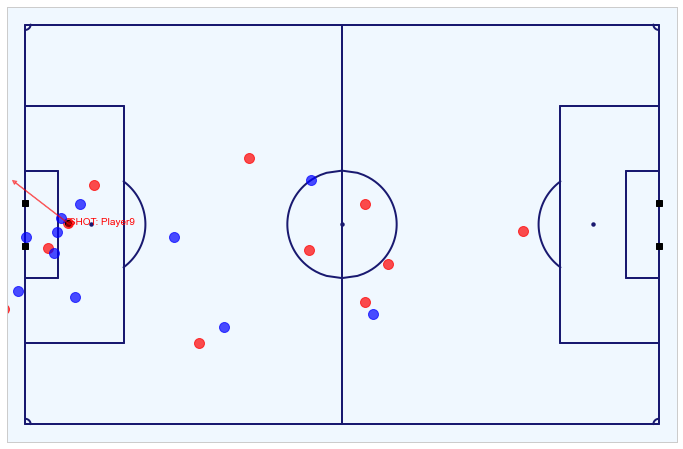

In [247]:
# Visualise the shot and the positions of the players

## Define index of Event data and frame of Tracking data
index = 1_756
frame = df_events.loc[index]['Start Frame']

## Visualise shots position using plot_events function from mviz library
fix, ax = mviz.plot_frame(df_tracking_home.loc[frame], df_tracking_away.loc[frame])
fix, ax = mviz.plot_events(df_events.loc[index:index], figax=(fig,ax), indicators = ['Marker', 'Arrow'], annotate=True)
#fig.suptitle('Player and Shot Positions', y=0.92)

## Save figure
if not os.path.exists(fig_dir_metrica + '/player_shot_positions_shot_124336_1756.png'):
    plt.savefig(fig_dir_metrica + '/player_shot_positions_shot_124336_1756.png', dpi=300, format='png', transparent=False, bbox_inches='tight')
else:
    pass

##### Tracking Data Visualisation

In [248]:
# Create MP4 video

## Define frames for the start and end of the shot
index = 1_756
frame_start= df_events.loc[index]['Start Frame']-150
frame_end = frame_start+300

## Save visualisation
if not os.path.exists(video_dir_metrica + '/tracking_shot_124336_1756.mp4'):
    mviz.save_match_clip(df_tracking_home.iloc[frame_start:frame_end], df_tracking_away.iloc[frame_start:frame_end], video_dir_metrica, fname = 'tracking_shot_124336_1756', include_player_velocities=False)
else:
    pass

In [249]:
# Embed shot in the notebook
Video('../../../../../video/fig/metrica-sports/tracking_shot_124336_1756.mp4', width=770, height=530)

##### Summary
*    `Number_Intervening_Opponents` - 3
*    `Number_Intervening_Teammates` - 0
*    `Interference_on_Shooter` - Medium (1)
*    `Subtype`: HEAD-OFF TARGET-OUT	
*    `isGoal`: False
*    `isPenalty`: False

#### <a id='#section5.1.22'>5.1.22. 132,570 (1,843)</a>

##### DataFrame Slice

In [250]:
# Slice DataFrame for shot of interest

## Define index of Event data and frame of Tracking data
index = 1_843
frame = df_events.loc[index]['Start Frame']

## Subset DataFrame
df_shots[df_shots['Start Frame']==frame]

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
1843,Away,SHOT,OFF TARGET-OUT,2,132570,5302.8,132597,5303.88,Player18,NaN,33.92,-8.16,57.24,-2.04


##### Event Data Visualisation

/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:145: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:145: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:153: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot( hometeam['ball_x'], hometeam['ball_y'], 'ko', MarkerSize=6, al

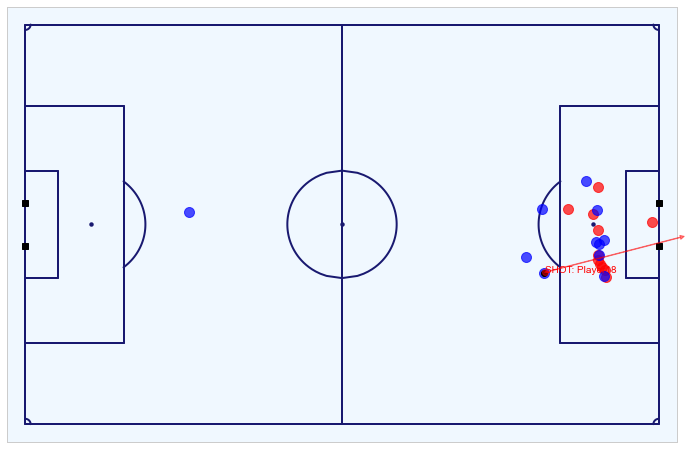

In [251]:
# Visualise the shot and the positions of the players

## Define index of Event data and frame of Tracking data
index = 1_843
frame = df_events.loc[index]['Start Frame']

## Visualise shots position using plot_events function from mviz library
fix, ax = mviz.plot_frame(df_tracking_home.loc[frame], df_tracking_away.loc[frame])
fix, ax = mviz.plot_events(df_events.loc[index:index], figax=(fig,ax), indicators = ['Marker', 'Arrow'], annotate=True)
#fig.suptitle('Player and Shot Positions', y=0.92)

## Save figure
if not os.path.exists(fig_dir_metrica + '/player_shot_positions_shot_132570_1843.png'):
    plt.savefig(fig_dir_metrica + '/player_shot_positions_shot_132570_1843.png', dpi=300, format='png', transparent=False, bbox_inches='tight')
else:
    pass

##### Tracking Data Visualisation

In [252]:
# Create MP4 video

## Define frames for the start and end of the shot
index = 1_843
frame_start= df_events.loc[index]['Start Frame']-150
frame_end = frame_start+300

## Save visualisation
if not os.path.exists(video_dir_metrica + '/tracking_shot_132570_1843.mp4'):
    mviz.save_match_clip(df_tracking_home.iloc[frame_start:frame_end], df_tracking_away.iloc[frame_start:frame_end], video_dir_metrica, fname = 'tracking_shot_132570_1843', include_player_velocities=False)
else:
    pass

In [253]:
# Embed shot in the notebook
Video('../../../../../video/fig/metrica-sports/tracking_shot_132570_1843.mp4', width=770, height=530)

##### Summary
*    `Number_Intervening_Opponents` - 6
*    `Number_Intervening_Teammates` - 4
*    `Interference_on_Shooter` - 0
*    `Subtype`: OFF TARGET-OUT
*    `isGoal`: False
*    `isPenalty`: False
*    `isDirectFK`: False

#### <a id='#section5.1.23'>5.1.23. 136,060 (1,903)</a>

##### DataFrame Slice

In [254]:
# Slice DataFrame for shot of interest

## Define index of Event data and frame of Tracking data
index = 1_903
frame = df_events.loc[index]['Start Frame']

## Subset DataFrame
df_shots[df_shots['Start Frame']==frame]

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
1903,Away,SHOT,HEAD-OFF TARGET-OUT,2,136060,5442.4,136078,5443.12,Player 26,NaN,47.7,-2.72,56.18,-6.12


##### Event Data Visualisation

/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:145: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:145: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:153: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot( hometeam['ball_x'], hometeam['ball_y'], 'ko', MarkerSize=6, al

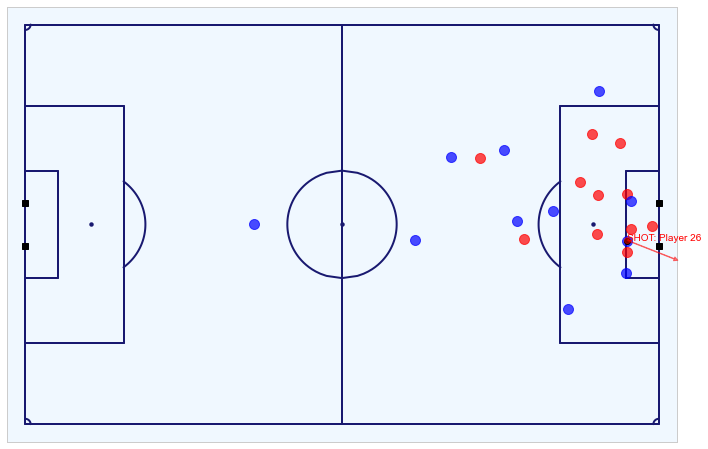

In [255]:
# Visualise the shot and the positions of the players

## Define index of Event data and frame of Tracking data
index = 1_903
frame = df_events.loc[index]['Start Frame']

## Visualise shots position using plot_events function from mviz library
fix, ax = mviz.plot_frame(df_tracking_home.loc[frame], df_tracking_away.loc[frame])
fix, ax = mviz.plot_events(df_events.loc[index:index], figax=(fig,ax), indicators = ['Marker', 'Arrow'], annotate=True)
#fig.suptitle('Player and Shot Positions', y=0.92)

## Save figure
if not os.path.exists(fig_dir_metrica + '/player_shot_positions_shot_136060_1903.png'):
    plt.savefig(fig_dir_metrica + '/player_shot_positions_shot_136060_1903.png', dpi=300, format='png', transparent=False, bbox_inches='tight')
else:
    pass

##### Tracking Data Visualisation

In [256]:
# Create MP4 video

## Define frames for the start and end of the shot
index = 1_903
frame_start= df_events.loc[index]['Start Frame']-150
frame_end = frame_start+300

## Save visualisation
if not os.path.exists(video_dir_metrica + '/tracking_shot_136060_1903.mp4'):
    mviz.save_match_clip(df_tracking_home.iloc[frame_start:frame_end], df_tracking_away.iloc[frame_start:frame_end], video_dir_metrica, fname = 'tracking_shot_136060_1903', include_player_velocities=False)
else:
    pass

In [257]:
# Embed shot in the notebook
Video('../../../../../video/fig/metrica-sports/tracking_shot_136060_1903.mp4', width=770, height=530)

##### Summary
*    `Number_Intervening_Opponents` - 2
*    `Number_Intervening_Teammates` - 0
*    `Interference_on_Shooter` - 2
*    `Subtype`: HEAD-OFF TARGET-OUT
*    `isGoal`: False
*    `isPenalty`: False
*    `isDirectFK`: False

#### <a id='#section5.1.24'>5.1.24. 139,891 (1,927)</a>

##### DataFrame Slice

In [258]:
# Slice DataFrame for shot of interest

## Define index of Event data and frame of Tracking data
index = 1_927
frame = df_events.loc[index]['Start Frame']

## Subset DataFrame
df_shots[df_shots['Start Frame']==frame]

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
1927,Home,SHOT,ON TARGET-SAVED,2,139891,5595.64,139925,5597.0,Player9,NaN,-21.2,1.36,-50.88,1.36


##### Event Data Visualisation

/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:145: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:145: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/CFG/scripts/Metrica_Viz.py:153: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot( hometeam['ball_x'], hometeam['ball_y'], 'ko', MarkerSize=6, al

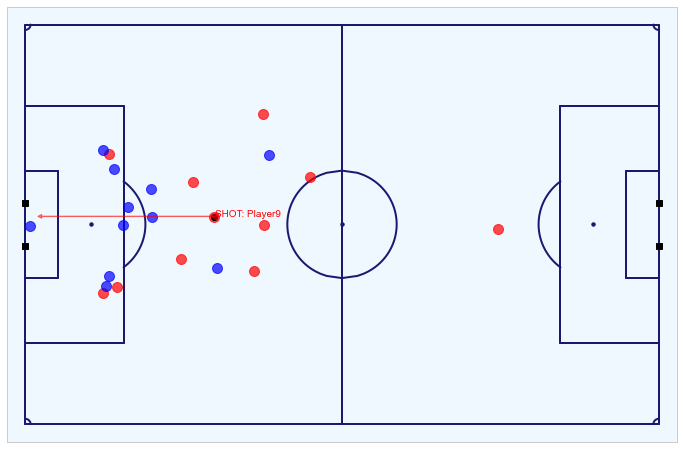

In [259]:
# Visualise the shot and the positions of the players

## Define index of Event data and frame of Tracking data
index = 1_927
frame = df_events.loc[index]['Start Frame']

## Visualise shots position using plot_events function from mviz library
fix, ax = mviz.plot_frame(df_tracking_home.loc[frame], df_tracking_away.loc[frame])
fix, ax = mviz.plot_events(df_events.loc[index:index], figax=(fig,ax), indicators = ['Marker', 'Arrow'], annotate=True)
#fig.suptitle('Player and Shot Positions', y=0.92)

## Save figure
if not os.path.exists(fig_dir_metrica + '/player_shot_positions_shot_139891_1927.png'):
    plt.savefig(fig_dir_metrica + '/player_shot_positions_shot_139891_1927.png', dpi=300, format='png', transparent=False, bbox_inches='tight')
else:
    pass

##### Tracking Data Visualisation

In [260]:
# Create MP4 video

## Define frames for the start and end of the shot
index = 1_927
frame_start= df_events.loc[index]['Start Frame']-150
frame_end = frame_start+300

## Save visualisation
if not os.path.exists(video_dir_metrica + '/tracking_shot_139891_1927.mp4'):
    mviz.save_match_clip(df_tracking_home.iloc[frame_start:frame_end], df_tracking_away.iloc[frame_start:frame_end], video_dir_metrica, fname = 'tracking_shot_139891_1927', include_player_velocities=False)
else:
    pass

In [261]:
# Embed shot in the notebook
Video('../../../../../video/fig/metrica-sports/tracking_shot_139891_1927.mp4', width=770, height=530)

##### Summary
*    `Number_Intervening_Opponents` - 4
*    `Number_Intervening_Teammates` - 0
*    `Interference_on_Shooter` - 0
*    `Subtype`: ON TARGET-SAVED
*    `isGoal`: False
*    `isPenalty`: False
*    `isDirectFK`: True

### <a id='#section5.2'>5.2. Plotting all shots and goals for each team</a>

#### <a id='#section5.2.1'>5.2.1. Home Team

In [262]:
# Shot outcomes types and their frequency
df_home_shots.groupby(['Subtype']).Subtype.count()

Subtype
HEAD-OFF TARGET-OUT    4
HEAD-ON TARGET-GOAL    1
OFF TARGET-OUT         2
ON TARGET-GOAL         2
ON TARGET-SAVED        4
Name: Subtype, dtype: int64

In [263]:
# Using the home_shots DataFrame, create two DataFrames that separates those shots that are goals and those that are not goals
df_home_shots_goals = df_home_shots[df_home_shots['Subtype'].str.contains('-GOAL')]
df_home_shots_no_goals = df_home_shots[~df_home_shots['Subtype'].str.contains('-GOAL')]

In [264]:
# Display DataFrame
df_home_shots_goals

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
198,Home,SHOT,ON TARGET-GOAL,1,12202,488.08,12212,488.48,Player10,NaN,-47.70,-3.40,-54.06,-2.04
1118,Home,SHOT,HEAD-ON TARGET-GOAL,2,73983,2959.32,73995,2959.80,Player9,NaN,-47.70,1.36,-54.06,2.04
1723,Home,SHOT,ON TARGET-GOAL,2,121027,4841.08,121055,4842.20,Player12,NaN,-30.74,5.44,-54.06,2.72


In [265]:
# Display DataFrame
df_home_shots_no_goals

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
83,Home,SHOT,OFF TARGET-OUT,1,4419,176.76,4443,177.72,Player5,NaN,-39.22,18.36,-55.12,2.72
252,Home,SHOT,ON TARGET-SAVED,1,16484,659.36,16499,659.96,Player10,NaN,-41.34,11.56,-48.76,0.68
431,Home,SHOT,HEAD-OFF TARGET-OUT,1,27345,1093.80,27360,1094.40,Player3,NaN,-43.46,-6.12,-54.06,-6.12
472,Home,SHOT,ON TARGET-SAVED,1,29754,1190.16,29777,1191.08,Player4,NaN,-31.80,-13.60,-53.00,-2.72
852,Home,SHOT,HEAD-OFF TARGET-OUT,1,56079,2243.16,56131,2245.24,Player5,NaN,-42.40,6.12,-55.12,-17.68
1026,Home,SHOT,OFF TARGET-OUT,1,67067,2682.68,67107,2684.28,Player7,NaN,-39.22,-18.36,-55.12,6.12
1479,Home,SHOT,ON TARGET-SAVED,2,98880,3955.20,98896,3955.84,Player10,NaN,-48.76,-4.08,-51.94,-3.40
1681,Home,SHOT,HEAD-OFF TARGET-OUT,2,117218,4688.72,117245,4689.80,Player9,NaN,-41.34,7.48,-54.06,-5.44
1756,Home,SHOT,HEAD-OFF TARGET-OUT,2,124336,4973.44,124365,4974.60,Player9,NaN,-45.58,0.00,-55.12,7.48
1927,Home,SHOT,ON TARGET-SAVED,2,139891,5595.64,139925,5597.00,Player9,NaN,-21.20,1.36,-50.88,1.36


We can see from the DataFrames that that the Home team, from 16 shots, scored 3 goals and didn't score from 13 shots.

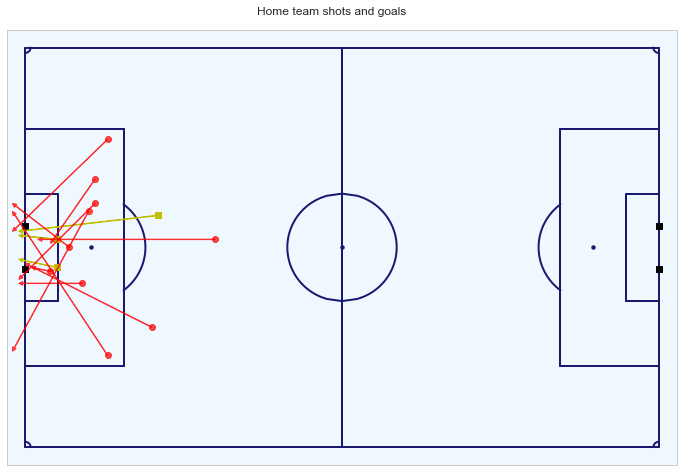

In [266]:
# Visualise all the shots and goals for the Home team

## Visualisation of all Home team's shots using plot_events function from mviz library
fig,ax = mviz.plot_events(df_home_shots_goals, indicators = ['Marker', 'Arrow'], annotate=False, color='y', alpha=1, marker_style='s')
mviz.plot_events(df_home_shots_no_goals, figax = (fig,ax), indicators = ['Marker', 'Arrow'], annotate=False, color='r', alpha=0.7, marker_style='o')
fig.suptitle('Home team shots and goals', y=0.92)

## Save figure
if not os.path.exists(fig_dir_metrica + '/shot_positions_home_team_all_shots_goals.png'):
    plt.savefig(fig_dir_metrica + '/shot_positions_home_team_all_shots_goals.png', dpi=300, format='png', transparent=False, bbox_inches='tight')
else:
    pass

#### <a id='#section5.2.2'>5.2.2. Away Team

In [267]:
# Shot outcomes types and their frequency
df_away_shots.groupby(['Subtype']).Subtype.count()

Subtype
BLOCKED                2
HEAD-OFF TARGET-OUT    1
OFF TARGET-HEAD-OUT    1
OFF TARGET-OUT         3
ON TARGET-GOAL         2
ON TARGET-SAVED        2
Name: Subtype, dtype: int64

In [268]:
# Using the away_shots DataFrame, create two DataFrames that separates those shots that are goals and those that are not goals
df_away_shots_goals = df_away_shots[df_away_shots['Subtype'].str.contains('-GOAL')]
df_away_shots_no_goals = df_away_shots[~df_away_shots['Subtype'].str.contains('-GOAL')]

In [269]:
# Display DataFrame
df_away_shots_goals

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
823,Away,SHOT,ON TARGET-GOAL,1,53049,2121.96,53075,2123.00,Player24,NaN,44.52,2.72,54.06,1.36
1671,Away,SHOT,ON TARGET-GOAL,2,115009,4600.36,115024,4600.96,Player20,NaN,40.28,1.36,55.12,2.72


In [270]:
# Display DataFrame
df_away_shots_no_goals

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
297,Away,SHOT,BLOCKED,1,18515,740.60,18520,740.80,Player22,NaN,31.80,10.20,38.16,11.56
962,Away,SHOT,OFF TARGET-HEAD-OUT,1,63362,2534.48,63372,2534.88,Player23,NaN,45.58,0.68,54.06,-6.80
980,Away,SHOT,ON TARGET-SAVED,1,64772,2590.88,64799,2591.96,Player20,NaN,28.62,-3.40,51.94,-2.04
1058,Away,SHOT,OFF TARGET-OUT,2,69887,2795.48,69927,2797.08,Player21,NaN,30.74,10.88,56.18,-8.16
1277,Away,SHOT,OFF TARGET-OUT,2,86191,3447.64,86219,3448.76,Player19,NaN,32.86,2.72,55.12,6.12
1335,Away,SHOT,ON TARGET-SAVED,2,90165,3606.60,90176,3607.04,Player19,NaN,46.64,-11.56,51.94,-2.72
1666,Away,SHOT,BLOCKED,2,111758,4470.32,111763,4470.52,Player24,NaN,43.46,-7.48,46.64,-3.40
1843,Away,SHOT,OFF TARGET-OUT,2,132570,5302.80,132597,5303.88,Player18,NaN,33.92,-8.16,57.24,-2.04
1903,Away,SHOT,HEAD-OFF TARGET-OUT,2,136060,5442.40,136078,5443.12,Player 26,NaN,47.70,-2.72,56.18,-6.12


We can see from the DataFrames that that the Away team, from 13 shots, scored 2 goals and didn't score from 11 shots.

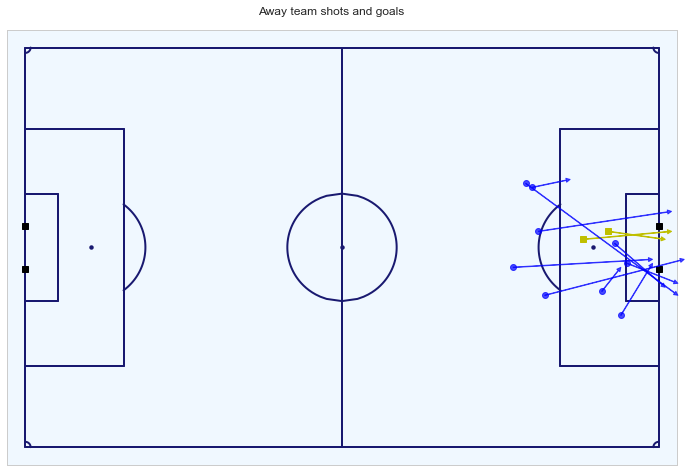

In [271]:
# Visualise all the shots and goals for the Home team

## Visualisation of all Away team's shots using plot_events function from mviz library
fig,ax = mviz.plot_events(df_away_shots_goals, indicators = ['Marker', 'Arrow'], annotate=False, color='y', alpha=1, marker_style='s')
mviz.plot_events(df_away_shots_no_goals, figax = (fig,ax), indicators = ['Marker', 'Arrow'], annotate=False, color='b', alpha=0.7, marker_style='o')
fig.suptitle('Away team shots and goals', y=0.92)

## Save figure
if not os.path.exists(fig_dir_metrica + '/shot_positions_away_team_all_shots_goals.png'):
    plt.savefig(fig_dir_metrica + '/shot_positions_away_team_all_shots_goals.png', dpi=300, format='png', transparent=False, bbox_inches='tight')
else:
    pass

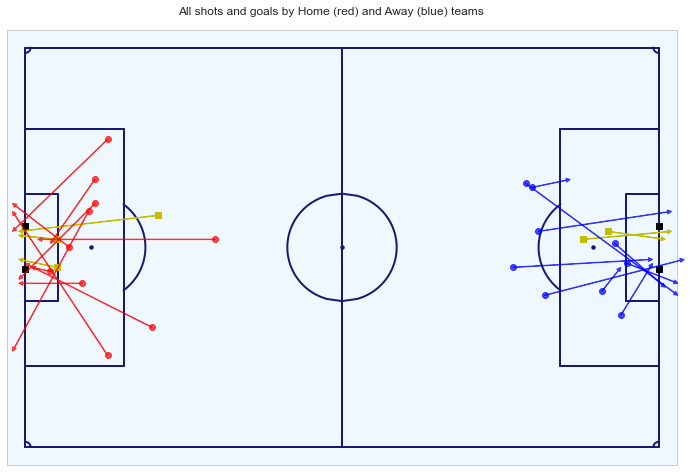

In [272]:
# Visualise all the shots and goals for the Home team

## Visualisation of all Away team's shots using plot_events function from mviz library
fig,ax = mviz.plot_events(df_away_shots_goals, indicators = ['Marker', 'Arrow'], annotate=False, color='y', alpha=1, marker_style='s')
mviz.plot_events(df_away_shots_no_goals, figax = (fig,ax), indicators = ['Marker', 'Arrow'], annotate=False, color='b', alpha=0.7, marker_style='o')
mviz.plot_events(df_home_shots_goals, figax = (fig,ax), indicators = ['Marker', 'Arrow'], annotate=False, color='y', alpha=1, marker_style='s')
mviz.plot_events(df_home_shots_no_goals, figax = (fig,ax), indicators = ['Marker', 'Arrow'], annotate=False, color='r', alpha=0.7, marker_style='o')
fig.suptitle('All shots and goals by Home (red) and Away (blue) teams', y=0.92)

## Save figure
if not os.path.exists(fig_dir_metrica + '/shot_positions_home_away_teams_all_shots_goals.png'):
    plt.savefig(fig_dir_metrica + '/shot_positions_home_away_teams_all_shots_goals.png', dpi=300, format='png', transparent=False, bbox_inches='tight')
else:
    pass

---

## <a id='#section7'>7. Engineer Shot Specific DataFrame</a>
Take the shots data and make it to the format ready to be analysed with the Chance Quality model.

##### Create a copy of the original shots DataFrame

In [273]:
df_shots_abs = df_shots.copy()

##### Convert all x-coordinates to absolute values
Be sure to not change y-values.

In [274]:
df_shots_abs['Start X'] = df_shots_abs['Start X'].abs()
df_shots_abs['End X'] = df_shots_abs['End X'].abs()

##### Convert `Start Time [s]` to `match_minute` and `match_second`

In [275]:
df_shots_abs['match_minute'] = (df_shots_abs['Start Time [s]']/60).apply(np.floor).values.astype(np.int64)
df_shots_abs['match_second'] = (df_shots_abs['Start Time [s]'] % 60).apply(np.round).values.astype(np.int64)

##### Rename columns

In [276]:
df_shots_abs = df_shots_abs.rename(columns={'Team': 'team',
                                            'type': 'type',
                                            'Subtype': 'subtype',
                                            'Period': 'period',
                                            'Start Frame': 'start_frame',
                                            'Start Time [s]': 'start_time',
                                            'End Frame': 'end_frame',
                                            'End Time [s]': 'end_time',
                                            'From': 'from',
                                            'To': 'to',
                                            'Start X': 'position_xM',
                                            'Start Y': 'position_yM',
                                            'End X': 'position_xM_end',
                                            'End Y': 'position_yM_end',
                                            'match_minute': 'match_minute',
                                            'match_second': 'match_second'
                                           }
                                  )

##### Feature Engineering of new attributes

In [277]:
# Define function for whether a shot results in a goal or not
def isGoalFunc(s):
    if 'GOAL' in s:
        return 1
    else:
        return 0
    
# Define function or whether a shot is from a foot
def isFootFunc(s):
    if 'HEAD' not in s:
        return 1
    else:
        return 0
    
# Define function or whether a shot is from a head
def isHeaderFunc(s):
    if 'HEAD' in s:
        return 1
    else:
        return 0

In [278]:
df_shots_abs['isGoal'] = df_shots_abs['subtype'].apply(isGoalFunc)
df_shots_abs['isFoot'] = df_shots_abs['subtype'].apply(isFootFunc)
df_shots_abs['isHeader'] = df_shots_abs['subtype'].apply(isHeaderFunc)

In [279]:
# Shot outcomes types and their frequency
df_shots_abs.groupby(['subtype']).subtype.count()

subtype
BLOCKED                2
HEAD-OFF TARGET-OUT    5
HEAD-ON TARGET-GOAL    1
OFF TARGET-HEAD-OUT    1
OFF TARGET-OUT         5
ON TARGET-GOAL         4
ON TARGET-SAVED        6
Name: subtype, dtype: int64

##### String Cleaning

In [280]:
# Define dictionary of whether shot was taken with a foot or not
dict_subtype = {'BLOCKED': 'Blocked',
                'HEAD-OFF TARGET-OUT': 'Missed',
                'HEAD-ON TARGET-GOAL': 'Goal',
                'OFF TARGET-HEAD-OUT': 'Missed',
                'OFF TARGET-OUT': 'Missed',
                'OFF TARGET-GOAL': 'Goal',
                'ON TARGET-GOAL': 'Goal',
                'ON TARGET-SAVED': 'Saved'
               }

# Currently does not include 'GoalFrame' or 'owngoal'

# Map isFoot assignment to DataFrame
df_shots_abs['outcome'] = df_shots_abs['subtype'].map(dict_subtype)

## Display DataFrame
df_shots_abs.head()

,team,Type,subtype,period,start_frame,start_time,end_frame,end_time,from,to,position_xM,position_yM,position_xM_end,position_yM_end,match_minute,match_second,isGoal,isFoot,isHeader,outcome
83,Home,SHOT,OFF TARGET-OUT,1,4419,176.76,4443,177.72,Player5,NaN,39.22,18.36,55.12,2.72,2,57,0,1,0,Missed
198,Home,SHOT,ON TARGET-GOAL,1,12202,488.08,12212,488.48,Player10,NaN,47.70,-3.40,54.06,-2.04,8,8,1,1,0,Goal
252,Home,SHOT,ON TARGET-SAVED,1,16484,659.36,16499,659.96,Player10,NaN,41.34,11.56,48.76,0.68,10,59,0,1,0,Saved
297,Away,SHOT,BLOCKED,1,18515,740.60,18520,740.80,Player22,NaN,31.80,10.20,38.16,11.56,12,21,0,1,0,Blocked
431,Home,SHOT,HEAD-OFF TARGET-OUT,1,27345,1093.80,27360,1094.40,Player3,NaN,43.46,-6.12,54.06,-6.12,18,14,0,0,1,Missed


##### Convert Pitch Coordinates

In [281]:
## Define 'standardised' pitch x and y lengths
pitch_x_start = -53
pitch_x_end = 53
pitch_y_start = -34
pitch_y_end = 34
pitch_length_x = pitch_x_end - pitch_x_start 
pitch_length_y = pitch_y_end - pitch_y_start 

##### Derive Shot Distance and Angle

In [282]:
# Derive shot distance and angle from the x, y coordinates
df_shots_abs['distance_to_goalM'] = np.sqrt((((pitch_length_x/2) - df_shots_abs['position_xM'])**2) + ((df_shots_abs['position_yM'])**2))
df_shots_abs['angle'] = np.absolute(np.degrees(np.arctan((df_shots_abs['position_yM']) / ((pitch_length_x/2) - df_shots_abs['position_xM']))))
df_shots_abs['distance_to_centerM'] = np.abs(df_shots_abs['position_yM'])

In [283]:
df_shots_abs.describe()

,period,start_frame,start_time,end_frame,end_time,position_xM,position_yM,position_xM_end,position_yM_end,match_minute,match_second,isGoal,isFoot,isHeader,distance_to_goalM,angle,distance_to_centerM
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.00000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,1.541667,76250.958333,3050.038333,76273.333333,3050.933333,39.440833,0.056667,53.00000,-0.991667,50.333333,30.000000,0.208333,0.708333,0.291667,15.799125,26.344420,6.630000
std,0.508977,42964.240623,1718.569625,42966.240601,1718.649624,7.475617,8.596524,3.95382,6.085341,28.651833,16.906392,0.414851,0.464306,0.464306,7.820990,17.193429,5.294857
min,1.000000,4419.000000,176.760000,4443.000000,177.720000,21.200000,-18.360000,38.16000,-17.680000,2.000000,7.000000,0.000000,0.000000,0.000000,5.471709,0.000000,0.000000
25%,1.000000,47225.250000,1889.010000,47250.500000,1890.020000,32.595000,-4.590000,51.94000,-3.910000,31.000000,15.500000,0.000000,0.000000,0.000000,8.541935,12.284568,2.720000
50%,2.000000,71935.000000,2877.400000,71961.000000,2878.440000,41.340000,1.020000,54.06000,-2.040000,47.500000,25.500000,0.000000,1.000000,0.000000,13.523537,26.607596,5.780000
75%,2.000000,115561.250000,4622.450000,115579.250000,4623.170000,45.580000,5.610000,55.12000,2.720000,76.500000,42.250000,0.000000,1.000000,1.000000,22.956001,34.035123,10.370000
max,2.000000,139891.000000,5595.640000,139925.000000,5597.000000,48.760000,18.360000,57.24000,11.560000,93.000000,59.000000,1.000000,1.000000,1.000000,31.829068,61.181596,18.360000


##### Add  `Number_Intervening_Opponents`, `Number_Intervening_Teammates`, `Interference_on_Shooter` features, derived from the Tracking data

Features can be found by join the following subsetted Tracking DataFrames:
*    `df_tracking_home_shots_select`
*    `df_tracking_away_shots_select`

In [284]:
# Join DataFrame
df_shots_abs_join = pd.merge(df_shots_abs, df_tracking_home_shots_select, how='left', left_on=['start_frame'], right_on = ['Frame'])
df_shots_abs_join = pd.merge(df_shots_abs_join, df_tracking_away_shots_select, how='left', left_on=['start_frame'], right_on = ['Frame'])

##### Clean `Number_Intervening_Opponents`, `Number_Intervening_Teammates`, `Interference_on_Shooter` attributes
Convert `Home_Total_Interference`, `Home_Total_Intervening`, `Away_Total_Interference`,  `Away_Total_Intervening` into the following features, dependent on the team that is shooting:
*    `Interference_on_Shooter`
*    `Number_Intervening_Teammates`
*    `Number_Intervening_Opponents`

In [285]:
df_shots_abs_join['Interference_on_Shooter_Number_Players'] = np.where(df_shots_abs_join['team'] == 'Home', df_shots_abs_join['Away_Total_Interference'], df_shots_abs_join['Home_Total_Interference'])
df_shots_abs_join['Number_Intervening_Teammates'] = np.where(df_shots_abs_join['team'] == 'Home', df_shots_abs_join['Home_Total_Intervening'], df_shots_abs_join['Away_Total_Intervening'])
df_shots_abs_join['Number_Intervening_Opponents'] = np.where(df_shots_abs_join['team'] == 'Home', df_shots_abs_join['Away_Total_Intervening'], df_shots_abs_join['Home_Total_Intervening'])

##### Interference_on_Shooter

In [286]:
# Define dictionary of Interference_on_Shooter codes
dict_inferenceshooter_codes = {0: 'Low',
                               1: 'Medium',
                               2: 'High',
                               3: 'High',
                               4: 'High',
                               5: 'High',
                               6: 'High',
                               7: 'High',
                               8: 'High',
                               9: 'High',
                               10: 'High',
                               11: 'High'
                              }

# Map Interference_on_Shooter_Code to DataFrame
df_shots_abs_join['Interference_on_Shooter'] = df_shots_abs_join['Interference_on_Shooter_Number_Players'].map(dict_inferenceshooter_codes)

##### Select Columns of Interest

In [287]:
# Subset dataset for only columns of interest

# Define columns of interest
cols = ['match_minute',
        'match_second',
        'Number_Intervening_Opponents',
        'Number_Intervening_Teammates',
        'Interference_on_Shooter_Number_Players',
        'Interference_on_Shooter',
        'outcome',
        'position_xM',
        'position_yM',
        'distance_to_goalM',
        'angle',
        'distance_to_centerM',
        'isGoal',
        'isFoot',
        'isHeader',
        'team',
        'period',
        'start_frame',
        'end_frame'
       ]

# Select columns of interest
df_shots_abs_select = df_shots_abs_join[cols]

# Display DataFrame
df_shots_abs_select

,match_minute,match_second,Number_Intervening_Opponents,Number_Intervening_Teammates,Interference_on_Shooter_Number_Players,Interference_on_Shooter,outcome,position_xM,position_yM,distance_to_goalM,angle,distance_to_centerM,isGoal,isFoot,isHeader,team,period,start_frame,end_frame
0,2,57,1,2,1,Medium,Missed,39.22,18.36,22.956001,53.110135,18.36,0,1,0,Home,1,4419,4443
1,8,8,1,0,3,High,Goal,47.70,-3.40,6.296825,32.680555,3.40,1,1,0,Home,1,12202,12212
2,10,59,0,0,3,High,Saved,41.34,11.56,16.419172,44.753250,11.56,0,1,0,Home,1,16484,16499
3,12,21,1,0,1,Medium,Blocked,31.80,10.20,23.526156,25.693700,10.20,0,1,0,Away,1,18515,18520
4,18,14,1,1,4,High,Missed,43.46,-6.12,11.334284,32.680555,6.12,0,0,1,Home,1,27345,27360
5,19,50,1,0,1,Medium,Saved,31.80,-13.60,25.187298,32.680555,13.60,0,1,0,Home,1,29754,29777
6,35,22,0,0,2,High,Goal,44.52,2.72,8.905549,17.783888,2.72,1,1,0,Away,1,53049,53075
7,37,23,1,0,3,High,Missed,42.40,6.12,12.239869,30.000353,6.12,0,0,1,Home,1,56079,56131
8,42,14,1,0,4,High,Missed,45.58,0.68,7.451094,5.236200,0.68,0,0,1,Away,1,63362,63372
9,43,11,1,1,1,Medium,Saved,28.62,-3.40,24.615938,7.939183,3.40,0,1,0,Away,1,64772,64799


##### Export CSV

In [288]:
df_shots_abs_select.to_csv(os.path.join(data_dir_metrica, 'test', 'game_2_shots_test.csv'), index=None, header=True)
#df_shots_abs_select.to_csv(os.path.join(data_dir_metrica, 'engineered', 'game_2_shots.csv'), index=None, header=True)

---

## <a id='#section8'>8. Summary</a>
This notebook is a short Exploratory Data Analysis (EDA) of [Metrica Sports](https://metrica-sports.com/) Tracking and corresponding Event football data with [Python](https://www.python.org/) using [pandas](http://pandas.pydata.org/) DataFrames and [matplotlib](https://matplotlib.org/contents.html?v=20200411155018) visualisations.

---

## <a id='#section9'>9. Next Steps</a>
The step is to take the exported shots data and predict the quality of the chances using the Chance Quality model.

---

## <a id='#section10'>10. References and Further Reading</a>
Please see my [`football_analytics`](https://github.com/eddwebster/football_analytics) repository for my attempt to create as concise a list of possible of publicly available resources published by the football analytics community.

The follow resources are those that were specifically used to inform and create my submission for the CFG Junior Data Scientist Data Challenge, specifically focusing on Expected Goals and Tracking data. I have also included links to other topics related to the role such as the application of Reinforcement Learning in football. Credits to all those cited below.

This list of is also available in the project GitHub repo [[link](https://github.com/eddwebster/mcfc_submission)].

### Football Analytics

#### Tutorials
*    Friends of Tracking YouTube channel [[link](https://www.youtube.com/channel/UCUBFJYcag8j2rm_9HkrrA7w)] and Mathematical Modelling of Football course by Uppsala University [[link](https://uppsala.instructure.com/courses/28112)]. The GitHub repo with all code featured can be found at the following [[link](https://github.com/Friends-of-Tracking-Data-FoTD)]. Lectures of note include:
     +    Laurie Shaw's Metrica Sports Tracking data series for #FoT - [Introduction](https://www.youtube.com/watch?v=8TrleFklEsE), [Measuring Physical Performance](https://www.youtube.com/watch?v=VX3T-4lB2o0), [Pitch Control modelling](https://www.youtube.com/watch?v=5X1cSehLg6s), and [Valuing Actions](https://www.youtube.com/watch?v=KXSLKwADXKI). See the following for code [[link](https://github.com/Friends-of-Tracking-Data-FoTD/LaurieOnTracking)];
     +    David Sumpter's Expected Goals webinars for #FoT - [How to Build An Expected Goals Model 1: Data and Model](https://www.youtube.com/watch?v=bpjLyFyLlXs), [How to Build An Expected Goals Model 2: Statistical fitting](https://www.youtube.com/watch?v=wHOgINJ5g54), and [The Ultimate Guide to Expected Goals](https://www.youtube.com/watch?v=310_eW0hUqQ). See the following for code [3xGModel](https://github.com/Friends-of-Tracking-Data-FoTD/SoccermaticsForPython/blob/master/3xGModel.py), [4LinearRegression](https://github.com/Friends-of-Tracking-Data-FoTD/SoccermaticsForPython/blob/master/4LinearRegression.py), [5xGModelFit.py](https://github.com/Friends-of-Tracking-Data-FoTD/SoccermaticsForPython/blob/master/5xGModelFit.py), and [6MeasuresOfFit](https://github.com/Friends-of-Tracking-Data-FoTD/SoccermaticsForPython/blob/master/6MeasuresOfFit.py);
     +    Peter McKeever's ['Good practice in data visualisation'](https://www.youtube.com/watch?v=md0pdsWtq_o) webinar for Friends of Tracking. See the following for code [[link](https://github.com/petermckeeverPerform/friends-of-tracking-viz-lecture)];
*    [Soccer Analytics Handbook](https://github.com/devinpleuler/analytics-handbook) by [Devin Pleuler](https://twitter.com/devinpleuler). See tutorial notebooks (also available in Google Colab) that notably include: [3. Logistic Regression](https://github.com/devinpleuler/analytics-handbook/blob/master/notebooks/logistic_regression.ipynb), and [7. Data Visualization](https://github.com/devinpleuler/analytics-handbook/blob/master/notebooks/data_visualization.ipynb):
*    [FC Python](https://twitter.com/fc_python) tutorials [[link](https://fcpython.com/)];
*    DataViz, Python, and matplotlib tutorials by Peter McKeever [[link](http://petermckeever.com/)] - I think his website is currently in redevelopment, with many of the old tutorials not currently available (28/02/2021). Check out his revamped [How to Draw a Football Pitch](http://petermckeever.com/2020/10/how-to-draw-a-football-pitch/) tutorial;
*    [McKay Johns YouTube channel](https://www.youtube.com/channel/UCmqincDKps3syxvD4hbODSg);
*    [Tech how-to: build your own Expected Goals model](https://www.scisports.com/tech-how-to-build-your-own-expected-goals-model/) by [Jan Van Haaren](https://twitter.com/JanVanHaaren) and [SciSports](https://twitter.com/SciSportsNL).
*    [Fitting your own football xG model](https://www.datofutbol.cl/xg-model/) by [Dato Fútbol](https://twitter.com/DatoFutbol_cl) (Ismael Gómez Schmidt). See GitHub repo [[link](https://github.com/Dato-Futbol/xg-model)];
*    [Python for Fantasy Football series](http://www.fantasyfutopia.com/python-for-fantasy-football-introduction/) by [Fantasy Futopia](https://twitter.com/FantasyFutopia) ([Thomas Whelan](https://twitter.com/tom_whelan)).  See the following posts:
     +    [Introduction to Machine Learning](http://www.fantasyfutopia.com/python-for-fantasy-football-introduction-to-machine-learning/)
     +    [Addressing Class Imbalance in Machine Learning](http://www.fantasyfutopia.com/python-for-fantasy-football-addressing-class-imbalance-in-machine-learning/)
     +    [Addressing Class Imbalance Part 2](http://www.fantasyfutopia.com/python-for-fantasy-football-addressing-class-imbalance-part-2/)
     +    [Understanding Random Forests](http://www.fantasyfutopia.com/python-for-fantasy-football-understanding-random-forests/)
     +    [Feature Engineering for Machine Learning](http://www.fantasyfutopia.com/python-for-fantasy-football-feature-engineering-for-machine-learning/)
*    [Building an Expected Goals Model in Python](https://web.archive.org/web/20200301071559/http://petermckeever.com/2019/01/building-an-expected-goals-model-in-python/) by [Peter McKeever](https://twitter.com/petermckeever) (using WayBackMachine);
*    [An xG Model for Everyone in 20 minutes (ish)](https://differentgame.wordpress.com/2017/04/29/an-xg-model-for-everyone-in-20-minutes-ish/ ) by [Football Fact Man](https://twitter.com/footballfactman) (Paul Riley).
*    [How to Draw a Football Pitch](http://petermckeever.com/2020/10/how-to-draw-a-football-pitch/) by Peter McKeever
*    [How To Create xG Flow Charts in Python](https://www.youtube.com/watch?v=bvoOOYMQkac) by [McKay Johns](https://twitter.com/mckayjohns). For code, see [[link](https://github.com/mckayjohns/Viz-Templates)]

#### Libaries and GitHub Repos
*    [`Friends-of-Tracking-Data-FoTD`](https://github.com/Friends-of-Tracking-Data-FoTD);
*    [`SoccermaticsForPython`](https://github.com/Friends-of-Tracking-Data-FoTD/SoccermaticsForPython) - repo by David Sumpter dedicated for people getting started with Python using the concepts derived from the book Soccermatics;
*    [`LaurieOnTracking`](https://github.com/Friends-of-Tracking-Data-FoTD/LaurieOnTracking) by [Laurie Shaw](https://twitter.com/EightyFivePoint) - Python code for working with Metrica tracking data; and
*    [`Expected Goals Thesis`](https://github.com/andrewRowlinson/expected-goals-thesis) by [Andrew Rowlinson](https://twitter.com/numberstorm). See both his thesis [[link](https://github.com/andrewRowlinson/expected-goals-thesis/blob/master/FOOTBALL%20SHOT%20QUALITY%20-%20Visualizing%20the%20Quality%20of%20Football%20Soccer%20Goals.pdf)] and the following notebooks:
     +    [Explore Data Quality Overlap](https://github.com/andrewRowlinson/expected-goals-thesis/blob/master/notebooks/00-explore-data-quality-overlap.ipynb);
     +    [Expected Goals Model](https://github.com/andrewRowlinson/expected-goals-thesis/blob/master/notebooks/01-expected-goals-model.ipynb);
     +    [Expected Goals Calculate xG and Shap](https://github.com/andrewRowlinson/expected-goals-thesis/blob/master/notebooks/02-expected-goals-calculate-xg-and-shap.ipynb);
     +    [Visualise Models](https://github.com/andrewRowlinson/expected-goals-thesis/blob/master/notebooks/03-visualize-models.ipynb);
     +    [kernel Density Probability Scoring](https://github.com/andrewRowlinson/expected-goals-thesis/blob/master/notebooks/04-kernel-density-probability-scoring.ipynb);
     +    [Simulate Match Results from xG](https://github.com/andrewRowlinson/expected-goals-thesis/blob/master/notebooks/05-simulate-match-results-from-xg.ipynb);
     +    [Freeze Frame Examples](https://github.com/andrewRowlinson/expected-goals-thesis/blob/master/notebooks/06-freeze_frame-example.ipynb);
     +    [Red Zone Heatmap](https://github.com/andrewRowlinson/expected-goals-thesis/blob/master/notebooks/07-red-zone-heatmap.ipynb);
     +    [Shots Follow Poisson Distribution](https://github.com/andrewRowlinson/expected-goals-thesis/blob/master/notebooks/08-shots_follow_poisson_distribution.ipynb); and
     +    [Angle Features](https://github.com/andrewRowlinson/expected-goals-thesis/blob/master/notebooks/09_figure3_angle_features.ipynb).
*    [`expected_goals_deep_dive`](https://github.com/andrewsimplebet/expected_goals_deep_dive) by [Andrew Puopolo](https://twitter.com/andrew_puopolo). See the following notebooks:
     +    [Setting Our Data Up](https://github.com/andrewsimplebet/expected_goals_deep_dive/blob/master/0.%20Setting%20Our%20Data%20Up.ipynb)
     +    [Random Forest Cross Validation And Hyperparameter Tuning](https://github.com/andrewsimplebet/expected_goals_deep_dive/blob/master/1.%20Random%20Forest%20Cross%20Validation%20And%20Hyperparameter%20Tuning.ipynb)
     +    [Comparing Logistic Regression and Random Forest For Expected Goals](https://github.com/andrewsimplebet/expected_goals_deep_dive/blob/master/2.%20Basic%20Logistic%20Regression%20and%20Comparison%20To%20Random%20Forests.ipynb)
     +    [Calibrating Expected Goals Models](https://github.com/andrewsimplebet/expected_goals_deep_dive/blob/master/3.%20Calibrating%20Expected%20Goals%20Models.ipynb)
     +    [Sanity Checking Our Expected Goals Model and Final Thoughts](https://github.com/andrewsimplebet/expected_goals_deep_dive/blob/master/4.%20Sanity%20Checking%20Our%20Expected%20Goals%20Models%20And%20Final%20Thoughts.ipynb)
*    [`soccer_analytics`](https://github.com/CleKraus/soccer_analytics) by [Kraus Clemens](https://twitter.com/CleKraus). See the following notebooks:
     +    [Expected goal model with logistic regression](https://github.com/CleKraus/soccer_analytics/blob/master/notebooks/expected_goal_model_lr.ipynb)
     +    [Challenges using gradient boosters](https://github.com/CleKraus/soccer_analytics/blob/master/notebooks/challenges_with_gradient_boosters.ipynb)
*    [`xg-model`](https://github.com/Dato-Futbol/xg-model)] by [Dato Fútbol](https://twitter.com/DatoFutbol_cl) (Ismael Gómez Schmidt)
*    [`soccer-xg`](https://pypi.org/project/soccer-xg/) by [Jesse Davis](https://twitter.com/jessejdavis1) and [Pieter Robberechts](https://twitter.com/p_robberechts) - a Python package for training and analyzing expected goals (xG) models in soccer (not used this this assignment but referenced here); and
*    [`Google Research Football`](https://github.com/google-research/football). See the Kaggle Competition alongside Manchester City [[link](https://www.kaggle.com/c/google-football) (ended October 2020).

#### Written Pieces
For a full list of Expected Goals literature, see the following [[link](https://docs.google.com/document/d/1OY0dxqXIBgncj0UDgb97zOtczC-b6JUknPFWgD77ng4/edit)].

##### Papers
The following Shiny App from Lars Maurath is a great tool for looking up publications [[link](https://larsmaurath.shinyapps.io/soccer-analytics-library/)].
*    [Routine Inspection: A Playbook for Corner Kicks](https://www.springerprofessional.de/en/routine-inspection-a-playbook-for-corner-kicks/18671052) (2020) by [Laurie Shaw](https://twitter.com/EightyFivePoint) and Sudarshan 'Suds' Gopaladesikan.  Accompanying talk - [2020 Harvard Sports Analytics Lab](https://www.youtube.com/watch?v=yfPC1O_g-I8)];
*    [Dynamic Analysis of Team Strategy in Professional Football](https://static.capabiliaserver.com/frontend/clients/barca/wp_prod/wp-content/uploads/2020/01/56ce723e-barca-conference-paper-laurie-shaw.pdf) (2019) by [Laurie Shaw](https://twitter.com/EightyFivePoint) and [Mark Glickman](https://twitter.com/glicko). Accompanying talks - [NESSIS 2019](https://www.youtube.com/watch?v=VU4BOu6VfbU), [2020 Google Sports Analytics Meetup](https://www.youtube.com/watch?v=aQ9L6IkWI8U);
*    [Football Shot Quality: Visualising the Quality of Soccer/Football Shots](https://github.com/andrewRowlinson/expected-goals-thesis/blob/master/FOOTBALL%20SHOT%20QUALITY%20-%20Visualizing%20the%20Quality%20of%20Football%20Soccer%20Goals.pdf) by [Andrew Rowlinson](https://twitter.com/numberstorm). See his GitHub repo for code [[link](https://github.com/andrewRowlinson/expected-goals-thesis)]; and
*    [Game Plan: What AI can do for Football, and What Football can do for AI](https://arxiv.org/pdf/2011.09192.pdf) (2020) by Karl Tuyls, Shayegan Omidshafiei, Paul Muller, Zhe Wang, Jerome Connor, Daniel Hennes, Ian Graham, Will Spearman, Tim Waskett, and Dafydd Steele, Pauline Luc, Adria Recasens, Alexandre Galashov, Gregory Thornton, Romuald Elie, Pablo Sprechmann, Pol Moreno, Kris Cao, Marta Garnelo, Praneet Dutta, Michal Valko, Nicolas Heess, Alex Bridgland, Julien Perolat, Bart De Vylder, Ali Eslami, Mark Rowland, Andrew Jaegle, Remi Munos, Trevor Back, Razia Ahamed, Simon Bouton, Nathalie Beauguerlange, Jackson Broshear, Thore Graepel, and Demis Hassabis;
*    [Google Research Football: A Novel Reinforcement Learning Environment](https://arxiv.org/pdf/1907.11180.pdf) (2020) by Karol Kurach, Anton Raichuk, Piotr Stańczyk, Michał Zając, Olivier Bachem, Lasse Espeholt, Carlos Riquelme, Damien Vincent, Marcin Michalski, Olivier Bousquet, Sylvain Gelly. See the GitHub repo [[link](https://github.com/google-research/football)];
*    [A Framework for the Fine-Grained Evaluation of the Instantaneous Expected Value of Soccer Possessions](https://arxiv.org/abs/2011.09426) (2020) by Javier Fernández, Luke Bornn and Daniel Cervone;
*    [Decomposing the Immeasurable Sport: A deep learning expected possession value framework for soccer](https://www.semanticscholar.org/paper/Decomposing-the-Immeasurable-Sport%3A-A-deep-learning-Fern%C3%A1ndez/fc78b144a531a8ffdf3216a677f3a65e70dad3c7) (2019) by [Javier Fernández](https://twitter.com/JaviOnData), [Bornn](https://twitter.com/LukeBornn), and [Dan Cervone](https://twitter.com/dcervone0). Accompanying talks - [SSAC19](https://www.youtube.com/watch?v=JIa7Td3YXxI), [StatsBomb conference](https://www.youtube.com/watch?v=nfPEEbKJbpM);
*    [Ready Player Run: Off-ball run identification and classification](https://static.capabiliaserver.com/frontend/clients/barca/wp_prod/wp-content/uploads/2020/01/40ba07f4-ready-player-run-barcelona.pdf) (2020) by [Sam Gregory](https://twitter.com/GregorydSam);
*    [Beyond Expected Goals](https://www.researchgate.net/profile/William_Spearman/publication/327139841_Beyond_Expected_Goals/links/5b7c3023a6fdcc5f8b5932f7/Beyond-Expected-Goals.pdf) (2018) by [Will Spearman](https://twitter.com/the_spearman);
*    [Wide Open Spaces: A statistical technique for measuring space creation in professional soccer](https://www.researchgate.net/publication/324942294_Wide_Open_Spaces_A_statistical_technique_for_measuring_space_creation_in_professional_soccer) (2018) by [Javier Fernandez](https://twitter.com/JaviOnData) and [Luke Bornn](https://twitter.com/LukeBornn);
*    [“The Leicester City Fairytale?”: Utilizing New Soccer Analytics Tools to Compare Performance in the 15/16 & 16/17 EPL Seasons (2017)](https://userpages.umbc.edu/~nroy/courses/fall2018/cmisr/papers/soccer_analytics.pdf) by Hector Ruiz, Paul Power, Xinyu Wei, and Patrick Lucey;
*    [Not all passes are created equal: objectively measuring the risk and reward of passes in soccer from tracking data](http://library.usc.edu.ph/ACM/KKD%202017/pdfs/p1605.pdf) (2017) by Paul Power, Hector Ruiz, Xinyu Wei, and Patrick Lucey. See Paul Power's talk [[link](https://dl.acm.org/action/downloadSupplement?doi=10.1145%2F3097983.3098051&file=power_tracking_data.mp4&download=true)] (downloadable MP4), and the webpage [[link](https://dl.acm.org/doi/10.1145/3097983.3098051)];
*    [“Quality vs Quantity”: Improved Shot Prediction in Soccer using Strategic Features from Spatiotemporal Data](https://s3-us-west-1.amazonaws.com/disneyresearch/wp-content/uploads/20150308192147/Quality-vs-Quantity%E2%80%9D-Improved-Shot-Prediction-in-Soccer-using-Strategic-Features-from-Spatiotemporal-Data-Paper.pdf) (2015) by Patrick Lucey, Alina Bialkowski, Mathew Monfort, Peter Carr, and Iain Matthews; and
*    [A Framework for Tactical Analysis and Individual Offensive Production Assessment in Soccer Using Markov Chains](http://nessis.org/nessis11/rudd.pdf) (2011) by [Sarah Rudd](https://twitter.com/srudd_ok). Accompanying NESSIS talk on Metacafe [[link](https://www.metacafe.com/watch/7337475/2011_nessis_talk_by_sarah_rudd/)].

##### Blogs
*    [Sam Green](https://twitter.com/aSamGreen)'s [xG model](https://www.optasportspro.com/news-analysis/assessing-the-performance-of-premier-league-goalscorers/);
*    [Michael Caley](https://twitter.com/MC_of_A)'s [xG model](https://cartilagefreecaptain.sbnation.com/2014/9/11/6131661/premier-league-projections-2014#methoderology);
*    [Using Data to Analyse Team Formations](https://eightyfivepoints.blogspot.com/2019/11/using-data-to-analyse-team-formations.html) by [Laurie Shaw](https://twitter.com/EightyFivePoint);
*    [Structure in football: putting formations into context](https://eightyfivepoints.blogspot.com/2020/12/structure-in-football-putting.html) by [Laurie Shaw](https://twitter.com/EightyFivePoint);
*    [xG explained](https://fbref.com/en/expected-goals-model-explained/) by [FBref](https://twitter.com/fbref);
*    [What are expected Goals?](https://www.americansocceranalysis.com/explanation) by [American Soccer Analysis](https://twitter.com/AnalysisEvolved);
*    [How StatsBomb Data Helps Measure Counter-Pressing](https://statsbomb.com/2018/05/how-statsbomb-data-helps-measure-counter-pressing/) - used to determine 5-yard radius
*    [David Sumpter](https://twitter.com/Soccermatics)'s Expected Goals pieces:
     +    [Should you write about real goals or expected goals? A guide for journalists](https://soccermatics.medium.com/should-you-write-about-real-goals-or-expected-goals-a-guide-for-journalists-2cf0c7ec6bb6);
     +    [Football’s magical equation?](https://soccermatics.medium.com/footballs-magical-equation-bfe212ce7d4a)
     +    [The Geometry of Shooting](https://soccermatics.medium.com/the-geometry-of-shooting-ae7a67fdf760).
*    [Michael Caley](https://twitter.com/MC_of_A)'s Expected Goals pieces:
     +    [Shot Matrix I: Shot Location and Expected Goals](https://cartilagefreecaptain.sbnation.com/2013/11/13/5098186/shot-matrix-i-shot-location-and-expected-goals)
     +    [Let's talk about expected goals](https://cartilagefreecaptain.sbnation.com/2015/4/10/8381071/football-statistics-expected-goals-michael-caley-deadspin)
*    [Jesse Davis](https://twitter.com/jessejdavis1) and [Pieter Robberechts](https://twitter.com/p_robberechts)' Expected Goals pieces for KU Leuven;
     +    [How Data Avilability Affects the Ability to learn Good xG Models](https://dtai.cs.kuleuven.be/sports/blog/how-data-availability-affects-the-ability-to-learn-good-xg-models)
     +    [Illustrating the Interplay between Features and Models in xG](https://dtai.cs.kuleuven.be/sports/blog/illustrating-the-interplay-between-features-and-models-in-xg)
     +    [How Data Quality Affects xG](https://dtai.cs.kuleuven.be/sports/blog/how-data-quality-affects-xg)
*    [Will Gürpinar-Morgan](https://twitter.com/WillTGM)'s Expected Goals pieces:
     +    [Unexpected goals](https://2plus2equals11.com/2015/12/31/unexpected-goals/) on [2+2=11](https://2plus2equals11.com/);
     +    [Great Expectations](https://2plus2equals11.com/2015/05/31/great-expectations/) on [2+2=11](https://2plus2equals11.com/);
     +    [On single match expected goal totals](https://2plus2equals11.com/2015/12/16/on-single-match-expected-goal-totals/) on [2+2=11](https://2plus2equals11.com/);
     +    [How StatsBomb Data Helps Measure Counter-Pressing](https://statsbomb.com/2018/05/how-statsbomb-data-helps-measure-counter-pressing/) for StatsBomb
*    [Martin Eastwoood](https://twitter.com/penaltyblog) (Pena.lt/y)'s Expected Goals pieces [[link](https://pena.lt/y/category/expected-goals.html)];
     +    [Expected Goals For All.](https://pena.lt/y/2014/02/12/expected-goals-for-all)
     +    [Actual Goals Versus Expected Goals](https://pena.lt/y/2014/02/15/actual-goals-versus-expected-goals);
     +    [Expected Goals Updated](https://pena.lt/y/2014/03/01/expected-goals-updated);
     +    [Expected Goals: The Y Axis](https://pena.lt/y/2014/04/16/expected-goals-the-y-xis);
     +    [Expected Goals And Exponential Decay](https://pena.lt/y/2014/04/22/expected-goals-and-exponential-decay);
     +    [Expected Goals: Foot Shots Versus Headers](https://pena.lt/y/2014/08/28/expected-goals-foot-shots-versus-headers);
     +    [Expected Goals And Support Vector Machines](https://pena.lt/y/2015/07/13/expected-goals-svm);
     +    [Expected Goals and Uncertainty](https://pena.lt/y/2016/04/29/expected-goals-and-uncertainty); and
     +    [Sharing xG Using Multi-touch Attribution Modelling](https://pena.lt/y/2019/11/23/multitouch-attributed-xg).
*    [Garry Gelade](https://twitter.com/GarryGelade)'s Expected Goals pieces:
     +    [Expected Goals and Unexpected Goals](https://web.archive.org/web/20200724125157/http://business-analytic.co.uk/blog/expected-goals-and-unexpected-goals/) (using WayBackMachine);
     +    [Assessing Expected Goals Models. Part 1: Shots](https://web.archive.org/web/20200724125157/http://business-analytic.co.uk/blog/evaluating-expected-goals-models/) (using WayBackMachine);
     +    [Assessing Expected Goals Models. Part 2: Anatomy of a Big Chance](https://web.archive.org/web/20200724125157/http://business-analytic.co.uk/blog/assessing-expected-goals-models-part-2-anatomy-of-a-big-chance/) (using WayBackMachine);
*    [Introducing xGChain and xGBuildup](https://statsbomb.com/2018/08/introducing-xgchain-and-xgbuildup/) by [Thom Lawrence](https://twitter.com/lemonwatcher);
*    [Quantifying finishing skill](https://statsbomb.com/2017/07/quantifying-finishing-skill/) by [Marek Kwiatkowski](https://twitter.com/statlurker);
*    [The Dual Life of Expected Goals (Part 1)](https://statsbomb.com/2018/05/the-dual-life-of-expected-goals-part-1/) by [Mike L. Goodman](https://twitter.com/TheM_L_G);
*    [A close look at my new Expected Goals Model](https://web.archive.org/web/20200320193539/http://11tegen11.net/2015/08/14/a-close-look-at-my-new-expected-goals-model/) by by [11tegen](https://twitter.com/11tegen11) ([Sander IJtsma](https://twitter.com/IJtsma)] (using WayBackMachine);
*    [An analysis of different expected goals models](https://www.pinnacle.com/en/betting-articles/Soccer/expected-goals-model-analysis/MEP2N9VMG5CTW99D) by [Benjamin Cronin](https://twitter.com/PinnacleBen);
*    [Expected Goals 3.0 Methodology](https://www.americansocceranalysis.com/home/2015/4/14/expected-goals-methodology) by [Matthias Kullowatz](https://twitter.com/mattyanselmo);
*    [Explaining and Training Shot Quality](https://statsbomb.com/2016/04/explaining-and-training-shot-quality/) by [Ted Knutson](https://twitter.com/mixedknuts);
*    [A simple Expected Goals model](https://cricketsavant.wordpress.com/2017/01/21/a-simple-expected-goals-model/) by Cricket Savant;
*    [How we calculate Expected Goals (xG)](https://www.fantasyfootballfix.com/blog-index/how-we-calculate-expected-goals-xg/) by Fantasy Football Fix; and
*    [Una mirada al Soccer Analytics usando R — Parte III](https://medium.com/datos-y-ciencia/una-mirada-al-soccer-analytics-usando-r-parte-iii-3bdff9cd3752) by [Dato Fútbol](https://twitter.com/DatoFutbol_cl) (Ismael Gómez Schmidt).

##### News Articles
*    [Liverpool sign up for StatsBomb 360: Ted Knutson explains why this stats revolution will change the game](https://www.skysports.com/football/news/11669/12248621/liverpool-sign-up-for-statsbomb-360-ted-knutson-explains-why-this-stats-revolution-will-change-the-game) (18/03/2021) by Adam Bate for Sky Sports News;
*    [Man City’s Big Winter Signing Is a Former Hedge Fund Brain](https://www.bloombergquint.com/markets/man-city-s-big-winter-signing-is-a-former-hedge-fund-brain) (31/01/2021) by David Dellier and Adam Blenford for Bloomberg;
*    [Man City land big signing in quest to be the best in data science](https://trainingground.guru/articles/man-city-land-big-signing-in-quest-to-be-the-best-in-data-science) (17/01/2021) by [Simon Austin](https://twitter.com/sport_simon) for [Training Ground Guru](https://trainingground.guru/);
*    [Man City launch AI football competition with Google](https://trainingground.guru/articles/man-city-launch-ai-football-competition-with-google) (13/10/2020) by [Simon Austin](https://twitter.com/sport_simon) for [Training Ground Guru](https://trainingground.guru/);
*    [Manchester City hire Huddersfield Town recruitment co-ordinator](https://trainingground.guru/articles/manchester-city-hire-huddersfield-recruitment-co-ordinator) (05/08/2020) by [Simon Austin](https://twitter.com/sport_simon) for [Training Ground Guru](https://trainingground.guru/);
*    [Manchester City appoint Sisman to new role of Performance Physicist](https://trainingground.guru/articles/manchester-city-appoint-sisman-to-new-role-of-performance-physicist) (20/07/2020) by [Training Ground Guru](https://trainingground.guru/);
*    [Prestidge promoted to top data science job at Man City](https://trainingground.guru/articles/prestidge-promoted-to-top-data-science-job-at-man-city) (02/01/2020) by [Simon Austin](https://twitter.com/sport_simon) for [Training Ground Guru](https://trainingground.guru/);
*    [Man City Head of Data Insights leaves after six years](https://trainingground.guru/articles/man-city-head-of-data-insights-leaves-after-six-years) (10/11/2019) by [Simon Austin](https://twitter.com/sport_simon) for [Training Ground Guru](https://trainingground.guru/); and
*    [Manchester City create new first team data science role](https://trainingground.guru/articles/manchester-city-create-new-first-team-data-science-role) (20/06/2019) by [Simon Austin](https://twitter.com/sport_simon) for [Training Ground Guru](https://trainingground.guru/).

##### Books
*    [The Numbers Game](https://www.amazon.co.uk/Numbers-Game-Everything-About-Football/) by [Chris Anderson](https://twitter.com/soccerquant) and [David Sally](https://twitter.com/DavidSally6);
*    [Football Hackers](https://www.amazon.co.uk/Football-Hackers-Science-Data-Revolution/) by [Christoph Biermann](https://twitter.com/chbiermann);
*    [Soccermatics](https://www.amazon.co.uk/Soccermatics-Mathematical-Adventures-Pro-Bloomsbury/dp/1472924142/ref=tmm_pap_swatch_0?_encoding=UTF8&qid=&sr=) by [David Sumpter](https://twitter.com/Soccermatics);
*    [Soccernomics](https://www.amazon.co.uk/Soccernomics-England-Germany-France-Finally/) by Simon Kuper and [Stefan Szymanski](https://twitter.com/sszy);
*    [Money and Football: A Soccernomics Guide ](https://www.amazon.co.uk/dp/B06XCKCVQR/) by Simon Kuper and [Stefan Szymanski](https://twitter.com/sszy); and
*    [Data Analytics in Football](https://www.amazon.co.uk/Data-Analytics-Football-Daniel-Memmert/) by [Daniel Memmert](https://twitter.com/DMemmert) and Dominik Raabe.

#### Videos
For a YouTube playlist of videos collated around the topics of Expected Goals, see [[link](https://www.youtube.com/playlist?list=PL38nJNjpNpH_VPRZJrkaPZOJfyuIaZHUY)]. For a Tracking data in Football specific playlist, see [[link](https://www.youtube.com/playlist?list=PL38nJNjpNpH-UX0YVNu7oN5gAWQc2hq8F)].

##### Webinars and Lectures
*    Laurie Shaw's Metrica Sports Tracking data series for [Friends of Tracking](https://www.youtube.com/channel/UCUBFJYcag8j2rm_9HkrrA7w) (see the following for code [[link](https://github.com/Friends-of-Tracking-Data-FoTD/LaurieOnTracking)]):
     +    [Introduction](https://www.youtube.com/watch?v=8TrleFklEsE);
     +    [Measuring Physical Performance](https://www.youtube.com/watch?v=VX3T-4lB2o0);
     +    [Pitch Control modelling](https://www.youtube.com/watch?v=5X1cSehLg6s); and
     +    [Valuing Actions](https://www.youtube.com/watch?v=KXSLKwADXKI).
*    [Demystifying Tracking data Sportlogiq webinar](https://www.youtube.com/watch?v=miEWHSTYvX4) by Sam Gregory and Devin Pleuler;
*    [Will Spearman's masterclass in Pitch Control](https://www.youtube.com/watch?v=X9PrwPyolyU&list=PL38nJNjpNpH-l59NupDBW7oG7CmWBgp7Y) for Friends of Tracking;
*    [How Tracking Data is Used in Football and What are the Future Challenges](https://www.youtube.com/watch?v=kHTq9cwdkGA) with Javier Fernández, Sudarshan 'Suds' Gopaladesikan, Laurie Shaw, Will Spearman and David Sumpter for Friends of Tracking.
*    [Introduction to tracking data in football](https://www.youtube.com/watch?v=fYqEnoOV9Po) by David Sumpter for Friends of Tracking;
*    [Learning to Watch Football: Self-Supervised Representations](https://vimeo.com/398489039/80d8dcfb58) for Tracking Data by Karun Singh. See accompanying blog post [[link](https://karun.in/blog/ssr-tracking-data.html)];
*    David Sumpter's Expected Goals webinars for [Friends of Tracking](https://www.youtube.com/channel/UCUBFJYcag8j2rm_9HkrrA7w) (see the following for code [3xGModel](https://github.com/Friends-of-Tracking-Data-FoTD/SoccermaticsForPython/blob/master/3xGModel.py), [4LinearRegression](https://github.com/Friends-of-Tracking-Data-FoTD/SoccermaticsForPython/blob/master/4LinearRegression.py), [5xGModelFit.py](https://github.com/Friends-of-Tracking-Data-FoTD/SoccermaticsForPython/blob/master/5xGModelFit.py), and [6MeasuresOfFit](https://github.com/Friends-of-Tracking-Data-FoTD/SoccermaticsForPython/blob/master/6MeasuresOfFit.py)):
     +    [How to Build An Expected Goals Model 1: Data and Model](https://www.youtube.com/watch?v=bpjLyFyLlXs);
     +    [How to Build An Expected Goals Model 2: Statistical fitting](https://www.youtube.com/watch?v=wHOgINJ5g54); and
     +    [The Ultimate Guide to Expected Goals](https://www.youtube.com/watch?v=310_eW0hUqQ).
*    ['Good practice in data visualisation'](https://www.youtube.com/watch?v=md0pdsWtq_o) webinar by Peter McKeever for Friends Of Tracking. See the following for code [[link](https://github.com/petermckeeverPerform/friends-of-tracking-viz-lecture)];
*    [The Ultimate Guide to Expected Goals](https://www.youtube.com/watch?v=310_eW0hUqQ) David Sumpter for Friends of Tracking;
*    [How to explain Expected Goals to a football player](https://www.youtube.com/watch?v=Xc6IG9-Dt18) by David Sumpter;
*    [What is xG?](https://www.youtube.com/watch?v=zSaeaFcm1SY) by [Tifo Football](https://www.youtube.com/channel/UCGYYNGmyhZ_kwBF_lqqXdAQ);
*    [Opta Expected Goals](https://www.youtube.com/watch?v=w7zPZsLGK18) by [The Analyst](https://www.youtube.com/user/optasports) (formally Opta);
*    [What are Expected Goals?](https://www.youtube.com/watch?v=Xc6IG9-Dt18) by [David Sumpter](https://twitter.com/Soccermatics) and Axel Pershagen;
*    [Anatomy of a Goal](https://www.youtube.com/watch?v=YJuHC7xXsGA) by [Numberphile](https://twitter.com/numberphile) [Brady Haran](https://twitter.com/BradyHaran));
*    [Sam Green OptaPro Interview](https://www.youtube.com/watch?v=gHIY-MgDh_o);
*    [How Did These Goals Go In? - We Explain How Goal Probability Works](https://www.youtube.com/watch?v=_vGhocyvKhA) by the Bundesliga;
*    [Soccer Analytics: Expected Goals](https://www.youtube.com/watch?v=3rsDCxszCD0) by [Dan Altman](https://twitter.com/NYAsports); and
*    [Anatomy of an Expected Goal](https://www.youtube.com/watch?v=mgHIx0LSrqM) by [11tegen](https://twitter.com/11tegen11) ([Sander IJtsma](https://twitter.com/IJtsma));
*    [Anatomy of a Goal (with Sam Green)](https://www.youtube.com/watch?v=YJuHC7xXsGA) by Numberphile: 
*    ["Is Our Model Learning What We Think It Is?" Estimating the xG Impact of Actions in Football](https://www.youtube.com/watch?v=i7Ra4Qv4_m4) by [Tom Decroos](https://twitter.com/TomDecroos) from the 2019 StatsBomb Innovation in Football Conference;
*    [Statsbomb Data Launch - Beyond Naive xG](https://www.youtube.com/watch?v=_AYY9XlWEB0) by [Ted Knutson](https://twitter.com/mixedknuts);
*    [Karol Kurach - Google Research Football](https://www.youtube.com/watch?v=Va5dIxejqx0);
*    [Karol Kurach (Google Brain) "Google Research Football: Learning to Play Football with Deep RL](https://www.youtube.com/watch?v=lsN5y2frNig);
*    [Google Research Football](https://www.youtube.com/watch?v=esQvSg2qeS0) by Piotr Stanczyk;
*    [Google's AI Plays Football…For Science!](https://www.youtube.com/watch?v=Uk9p4Kk98_g) by Two Minute Papers;
*    [Changing the soccer transfer market with big data](https://www.youtube.com/watch?v=UMeDP-lIBD8) by [Giels Brouwer](https://twitter.com/gielsbrouwer);
*    [Soccermatics: how maths explains football](https://www.youtube.com/watch?v=Nv7JYtVbzvI) by [David Sumpter](https://twitter.com/Soccermatics);
*    [Data Robot Opening Remarks & Keynote: Making Better Decisions, Faster](https://www.datarobot.com/recordings/ai-experience-emea-on-demand/ai-experience-opening-remarks-keynote/watch/090a6990db580257e9e6046fc48ab035/) with [Brian Prestidge](https://twitter.com/brianprestidge);

##### Miscellaneous
*    [Jeff Stelling xG rant](https://facebook.com/SoccerAM/videos/1740454985978128/); and
*    [Craig Burley xG rant](https://www.youtube.com/watch?v=JBWKGij9Y5A).

##### YouTube Channels
*    [Friends of Tracking](https://www.youtube.com/channel/UCUBFJYcag8j2rm_9HkrrA7w) with [David Sumpter](https://twitter.com/Soccermatics), [Javier Fernández](https://twitter.com/JaviOnData), [Laurie Shaw](https://twitter.com/EightyFivePoint), [Sudarshan 'Suds' Gopaladesikan](https://twitter.com/suds_g), [Pascal Bauer](https://twitter.com/pascal_bauer), and [Fran Peralta](https://twitter.com/PeraltaFran23);
*    [McKay Johns](https://www.youtube.com/channel/UCmqincDKps3syxvD4hbODSg);
*    [Mark Glickman](https://www.youtube.com/channel/UC-gtC2WYRAr_4eYRIUb4ovg) – for NESSIS talks, uploaded to his personal channel. Old talks are available on his [Metacafe channel](https://www.metacafe.com/channels/Mark%20Glickman/). See the official website [[link](http://www.nessis.org/)];
*    [42 Analytics](https://www.youtube.com/user/42analytics) – for SSAC conferences;
*    [StatsBomb](https://www.youtube.com/channel/UCmZ2ArreL9muPvH49Gaw0Bw);
*    [Opta](https://www.youtube.com/user/optasports) - including Opta Pro Forum talks; and
*    [Tifo Football](https://www.youtube.com/channel/UCGYYNGmyhZ_kwBF_lqqXdAQ).

#### Podcasts 
List of notable episodes:
*    [All Stats Aren't We](https://open.spotify.com/show/22eR0UCjDdVXY2JTtjD3OI?si=kt_lY1m2QKukOvKvmWpsPA):
     +    [Bonus Episode: David Sumpter - The Ten Equations that Rule the World](https://open.spotify.com/episode/2aWNiGHVH29qnXdrw12Iet?si=gU5__QfvRsCCxjE7XjcRhQ)
*    [Analytics FC Podcast](https://analyticsfc.co.uk/podcast/):
     +    [Episode 27: David Sumpter](https://open.spotify.com/episode/6gG4VY5hRlIio0smhgTnWh?si=meS7GqPxR4WXf2PGMPATZw)
*    [The Conor J Show](https://open.spotify.com/show/2VeRpUoHzC7KN9zxB5N2iz?si=oSMPSpwbR7-IgxSzqlk6Ig):
     +    [The Role Mathematics plays in Sports and Politics (Part 1) | David Sumpter | TCJS #11 (1/2)](https://open.spotify.com/episode/7BBAToNN9Mt0Ol8c9bDtGS?si=5YNtRObXQMu7xYBEgLgmbQ)
*    [Expected Value](https://open.spotify.com/show/5xFeWbaaLFepY5n73SfWwr?si=yn23mqUpQa-mvcL6CYWpgA)
     +    [NESSIS, Part 2 - Laurie Shaw & Sam Gregory](https://open.spotify.com/episode/42z1UFcfgpx17acCCg5rip?si=Pyu8gFJxRiej9fE15Gs89A)
*    [The Football Collective Podcast](https://open.spotify.com/show/3fqNuhWi6hkagJ1U0UDJfe?si=e10JT2ACS86A3JXyO1AzGQ):
     +    [S3 E1 | Sarthak Mondal speaks to Laurie Shaw about the advent of Data Science in Football The Football Collective Podcast](https://open.spotify.com/episode/1gJXuovD1L6VMimN5BtukS?si=Y-Ot43T8TluU7UEiSvReyg)
*    [The Football Fanalytics Podcast](https://open.spotify.com/show/6JwWRPMaHfGicFBtl7nI3V?si=IwQ00tyTRPaBcW-0XLwS4w&nd=1)
     +   [#1: What Did You Expect?](https://open.spotify.com/episode/3CkvTYcsLmNmD5BCIZhpvi?si=NaeVt2zOStm9EJ56n4EozQ)
*    [The Football Pod](https://open.spotify.com/show/3QhwCTOvJN3AZqNalgjtnO?si=173ZCWfsTs-jktoS7Bz9XQ):
     +    [Episode 3 with David Sumpter](https://open.spotify.com/episode/4mnDHbUo097JuC2lQiFijo?si=7abgc4_vRM21jSKff04rWg)
*    [Football Today](https://open.spotify.com/show/1WRaXZgVlksph0IjsTNBaG?si=0zyUX59sTKqCRnq92SEylQ&nd=1)
     +    [Manchester City Enters Data Arms Race With Liverpool](https://open.spotify.com/episode/311rLza8goz2b2SBORBORn?si=aqZX6ooOSfGkY3312jJozA)
*    [Pinnacle Podcast](https://open.spotify.com/show/091oYrS0glFhP81fq32bpE?si=TmR79XGnRAm5987Zj33ImA):
     +    [Serious About Betting: David Sumpter](https://open.spotify.com/episode/6Bt5L7wXDGvrSezYL2FU2O?si=IgQB1TArR9CBTnecZxb6qA)
*    [The Scouted Football Podcast](https://open.spotify.com/show/4qYVKC8RlHCJrwrRCx0w6H?si=M6xgCGtdTjiy0wEl1e2CJw)
     +    #56: Dominic Calvert-Lewin & Explaining Expected Goals - [Spotify](https://open.spotify.com/episode/37SlOJmtoviAKgNanq7Fxq?si=AAnRaCUOTw6FaVkreD5Rzg) and [YouTube](https://www.youtube.com/watch?v=EE_m3VBcASU) by [The Scouted Football Podcast](https://open.spotify.com/show/4qYVKC8RlHCJrwrRCx0w6H?si=M6xgCGtdTjiy0wEl1e2CJw).
*    [Squawka Talker Football Podcast](https://open.spotify.com/show/7xqylrPDX54uo01n4erZQZ?si=XpMNQ43aQxKUa6QuB0dp2w):
     +    [BIG interview with David Sumpter: Putting GPS trackers on under 10s football teams](https://open.spotify.com/episode/6c6vOWNhvUah7Mz01oiCgt?si=t7Sc0W8WRUS0ZnVWTaGt0g)
*    [Tifo Podcast](https://open.spotify.com/show/06QIGhqK31Qw1UvfHzRIDA?si=eJzpmtMeSPWUDP9fQ-5pqA):
     +    The Future of Stats: xG, xA - [Spotify](https://open.spotify.com/episode/7fPpKZSt2o9SSNynayROwd?si=WxuV2PFCQ7yRdNSE-QOZ6g) and [YouTube](https://www.youtube.com/watch?v=sNCeA27sDvI)
*    [Trademate Sports](https://open.spotify.com/show/2LPzUrtsWvz5iSayEGeEQK?si=prrlKqiwQ7-bKIUtbemkeQ):
     +    [Ep 87: Mathematics Professor David Sumpter & Trademate CEO Marius Norheim - Using Mathematics in...](https://open.spotify.com/episode/6jYhTHxujga5D9j37uQbLt?si=3gwKy27dRcOgVij5bYpGzA)
*    [UCN/USF Sport Management - Sports Business Podcast](https://soundcloud.com/user-736114890):
     +    [Kenneth Cortsen talks to Laurie Shaw from Harvard University](https://soundcloud.com/user-736114890/sport-data-analytics-in-football-kenneth-cortsen-talks-to-laurie-shaw-harvard-university)

#### Tweets
*    The benefits of including fake data in an Expected Goals model by David Sumpter [[link](https://twitter.com/Soccermatics/status/1260598182624575490)].


### Data Science

#### Mathematics
*    [Find if a point lies inside a Circle](https://www.geeksforgeeks.org/find-if-a-point-lies-inside-or-on-circle/) by Utkarsh Trivedi
*    [How to know if a point is inside a circle?](https://math.stackexchange.com/questions/198764/how-to-know-if-a-point-is-inside-a-circle)
*    [Check whether a given point lies inside a triangle or not](https://www.geeksforgeeks.org/check-whether-a-given-point-lies-inside-a-triangle-or-not/)

#### Logistic Regression
*    [scikit-learn Logistic Regression official docs](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
*    [Logistic Regression wiki](https://en.wikipedia.org/wiki/Logistic_regression#:~:text=Logistic%20regression%20is%20a%20statistical,a%20form%20of%20binary%20regression)
*    [Logistic Regression](https://www.youtube.com/watch?v=yIYKR4sgzI8) by StatQuest (Josh Starmer)
*    [Logistic Regression for Machine Learning](https://machinelearningmastery.com/logistic-regression-for-machine-learning/) by Jason Brownlee
*    [Logistic Regression Tutorial for Machine Learning](https://machinelearningmastery.com/logistic-regression-tutorial-for-machine-learning/) by Jason Brownlee

#### XGBoost
*    [Greedy Function Approximation: A Gradient Boosting Machine](https://statweb.stanford.edu/~jhf/ftp/trebst.pdf) by Jerome H. Friedman
*    [XGBoost: A Scalable Tree Boosting System](https://arxiv.org/abs/1603.02754) by Tianqi Chen and Carlos Guestrin (the authors of XGBoost);
*    [XGBoost GitHub repo](https://github.com/dmlc/xgboost);
*    [Awesome XGBoost repo](https://github.com/dmlc/xgboost/tree/master/demo);
*    [XGBoost official documentation](https://xgboost.readthedocs.io/en/latest/index.html). See the tutorials [[link](https://xgboost.readthedocs.io/en/latest/tutorials/index.html)]:
     +    [Parameter Tuning](https://xgboost.readthedocs.io/en/latest/tutorials/param_tuning.html)
     +    [General Parameters](https://xgboost.readthedocs.io/en/latest/parameter.html#general-parameters)
*    [Gradient Boosting wiki](https://en.wikipedia.org/wiki/Gradient_boosting);
*    [A Gentle Introduction to XGBoost for Applied Machine Learning](https://machinelearningmastery.com/gentle-introduction-xgboost-applied-machine-learning/) by Jason Brownlee
*    [How to Develop Your First XGBoost Model in Python](https://machinelearningmastery.com/develop-first-xgboost-model-python-scikit-learn/) by Jason Brownlee
*    [How to Configure XGBoost for Imbalanced Classification](https://machinelearningmastery.com/xgboost-for-imbalanced-classification/) by Jason Brownlee
*    [How to Visualize Gradient Boosting Decision Trees With XGBoost in Python](https://machinelearningmastery.com/visualize-gradient-boosting-decision-trees-xgboost-python/) by Jason Brownlee
*    [Story and Lessons Behind the Evolution of XGBoost](https://sites.google.com/site/nttrungmtwiki/home/it/data-science---python/xgboost/story-and-lessons-behind-the-evolution-of-xgboost) - brief history and backstory to the creation of XGBoost by Tianqi Chen;
*    [XGBoost A Scalable Tree Boosting System](https://www.youtube.com/watch?v=Vly8xGnNiWs) - talk by Tianqi Chen at the LA Machine Learning Meetup Group on 02/06/2016;
*    [Kaggle Winning Solution Xgboost Algorithm](https://www.youtube.com/watch?v=ufHo8vbk6g4) - talk by Tong He (author of the R XGBoost package) at the NYC Data Science Academy. Mo
*    [Gradient Boosting Machine Learning](https://www.youtube.com/watch?v=wPqtzj5VZus) - talk by Professor Trevor Hastie
*    [XGBoost](https://www.kaggle.com/alexisbcook/xgboost) lessson, part of the [Intermediate Machine Learning](https://www.kaggle.com/learn/intermediate-machine-learning) course by [Kaggle](https://www.kaggle.com/)
*    [Hyperparameter Optimization for Xgboost](https://www.youtube.com/watch?v=9HomdnM12o4) by Krish Naik
*    [XGBoost in Python from Start to Finish](https://www.youtube.com/watch?v=GrJP9FLV3FE) by StatQuest (Josh Starmer)
*    [XGBoost + k-fold CV + Feature Importance](https://www.kaggle.com/prashant111/xgboost-k-fold-cv-feature-importance) by Prashant Banerjee
*    [A Guide on XGBoost hyperparameters tuning](https://www.kaggle.com/prashant111/a-guide-on-xgboost-hyperparameters-tuning) by Prashant Banerjee
*    [Bayesian Optimization using Hyperopt](https://www.kaggle.com/prashant111/bayesian-optimization-using-hyperopt) by Prashant Banerjee
*    [Hyperparameter Grid Search with XGBoost](https://www.kaggle.com/tilii7/hyperparameter-grid-search-with-xgboost)
*    [Hyperopt the Xgboost model](https://www.kaggle.com/yassinealouini/hyperopt-the-xgboost-model) by Yassine Alouini
*    [Using XGBoost in Python](https://www.datacamp.com/community/tutorials/xgboost-in-python) by Manish Pathak
*    [Getting started with XGBoost](https://blog.cambridgespark.com/getting-started-with-xgboost) by Kevin Lemagnen
*    [A Beginner’s guide to XGBoost](https://towardsdatascience.com/a-beginners-guide-to-xgboost-87f5d4c30ed7) by George Seif
*    [Boosting your Machine Learning Models Using XGBoost](https://heartbeat.fritz.ai/boosting-your-machine-learning-models-using-xgboost-d2cabb3e948f) by Derrick Mwiti
*    [XGBoost Algorithm: Long May She Reign!](https://towardsdatascience.com/https-medium-com-vishalmorde-xgboost-algorithm-long-she-may-rein-edd9f99be63d) by Vishal Morde
*    [Gradient Boosting and XGBoost](https://medium.com/@gabrieltseng/gradient-boosting-and-xgboost-c306c1bcfaf5) by Gabriel Tseng
*    [Gradient Boosting from scratch](https://medium.com/mlreview/gradient-boosting-from-scratch-1e317ae4587d) by Prince Grover
*    [HyperParameter Tuning — Hyperopt Bayesian Optimization for (Xgboost and Neural network)](https://medium.com/analytics-vidhya/hyperparameter-tuning-hyperopt-bayesian-optimization-for-xgboost-and-neural-network-8aedf278a1c9) by Tinu Rohith D
*    [Complete Guide to Parameter Tuning in XGBoost with codes in Python](https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/) by Aarshay Jain

#### Visualisation
*    [How to Make a Plot with Two Different Y-axis in Python with Matplotlib](https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/)
*    https://stackoverflow.com/questions/39409866/correlation-heatmap
*    [Control color in seaborn heatmaps](https://www.python-graph-gallery.com/92-control-color-in-seaborn-heatmaps)

---

***Visit my website [eddwebster.com](https://www.eddwebster.com) or my [GitHub Repository](https://github.com/eddwebster) for more projects. If you'd like to get in contact, my Twitter handle is [@eddwebster](http://www.twitter.com/eddwebster) and my email is: edd.j.webster@gmail.com.***

[Back to the top](#top)